# Analisis inicial enunciado

In [ ]:
import pandas as pd

df = pd.read_csv('data.CSV', sep=';', skiprows=8, error_bad_lines=False, quoting=3, encoding='latin1')
# Display the first few rows of the DataFrame
print(df.dtypes)


DATA (YYYY-MM-DD)                                         object
HORA (UTC)                                                object
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                          object
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)     object
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)           object
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)          object
RADIACAO GLOBAL (KJ/m²)                                   object
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)              object
TEMPERATURA DO PONTO DE ORVALHO (°C)                      object
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)                object
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)                object
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)          object
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)          object
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                   int64
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                   int64
UMIDADE RELATIVA DO AR, H

<ipython-input-36-afcef49f6556>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('data.CSV', sep=';', skiprows=8, error_bad_lines=False, quoting=3, encoding='latin1')


In [ ]:
#Traducir
translation_dict = {
    'DATA (YYYY-MM-DD)': 'DATE',
    'HORA (UTC)': 'TIME (UTC)',
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'TOTAL PRECIPITATION, HOURLY (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'MAXIMUM ATMOSPHERIC PRESSURE IN THE PREVIOUS HOUR (AUT) (mB)',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'MINIMUM ATMOSPHERIC PRESSURE IN THE PREVIOUS HOUR (AUT) (mB)',
    'RADIACAO GLOBAL (KJ/m²)': 'GLOBAL RADIATION (KJ/m²)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)': 'AIR TEMPERATURE - DRY BULB, HOURLY (°C)',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)': 'DEW POINT TEMPERATURE (°C)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)': 'MAXIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)': 'MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)',
    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)': 'DEW POINT TEMPERATURE MAXIMUM IN THE PREVIOUS HOUR (AUT) (°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)': 'DEW POINT TEMPERATURE MINIMUM IN THE PREVIOUS HOUR (AUT) (°C)',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'MAXIMUM RELATIVE HUMIDITY IN THE PREVIOUS HOUR (AUT) (%)',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'MINIMUM RELATIVE HUMIDITY IN THE PREVIOUS HOUR (AUT) (%)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)': 'RELATIVE HUMIDITY, HOURLY (%)',
    'VENTO, DIREÇÃO HORARIA (gr) (° (gr))': 'WIND, HOURLY DIRECTION (degrees)',
    'VENTO, RAJADA MAXIMA (m/s)': 'WIND, MAXIMUM GUST (m/s)',
    'VENTO, VELOCIDADE HORARIA (m/s)': 'WIND, HOURLY SPEED (m/s)',
    'Unnamed: 19': 'Unnamed: 19'
}

df = df.rename(columns=translation_dict)

# convertir a numerico todo salvo fecha y tiempo
for col in df.columns:
    if col not in ['DATE', 'TIME (UTC)']:
        df[col] = df[col].apply(lambda x: pd.to_numeric(str(x).replace(',', '.'), errors='coerce'))

# Convertir a tipos exactos
df['DATE'] = pd.to_datetime(df['DATE'])
df['TIME (UTC)'] = pd.to_timedelta(df['TIME (UTC)'] + ':00')


# Display the first few rows of the DataFrame
print(df.dtypes)

DATE                                                              datetime64[ns]
TIME (UTC)                                                       timedelta64[ns]
TOTAL PRECIPITATION, HOURLY (mm)                                         float64
ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)                       float64
MAXIMUM ATMOSPHERIC PRESSURE IN THE PREVIOUS HOUR (AUT) (mB)             float64
MINIMUM ATMOSPHERIC PRESSURE IN THE PREVIOUS HOUR (AUT) (mB)             float64
GLOBAL RADIATION (KJ/m²)                                                 float64
AIR TEMPERATURE - DRY BULB, HOURLY (°C)                                  float64
DEW POINT TEMPERATURE (°C)                                               float64
MAXIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)                      float64
MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)                      float64
DEW POINT TEMPERATURE MAXIMUM IN THE PREVIOUS HOUR (AUT) (°C)            float64
DEW POINT TEMPERATURE MINIMU

In [ ]:
summary = df.describe()
summary

TIME (UTC)  TOTAL PRECIPITATION, HOURLY (mm)  \
count                       8760                       8760.000000   
mean             0 days 11:30:00                        -10.106621   
std    0 days 06:55:21.294077643                        320.359451   
min              0 days 00:00:00                      -9999.000000   
25%              0 days 05:45:00                          0.000000   
50%              0 days 11:30:00                          0.000000   
75%              0 days 17:15:00                          0.000000   
max              0 days 23:00:00                         44.200000   

       ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)  \
count                                        8760.000000    
mean                                          875.292854    
std                                           348.761538    
min                                         -9999.000000    
25%                                           884.800000    
50%                                           886.500000    
75%                                           888.200000    
max                                           893.800000    

       MAXIMUM ATMOSPHERIC PRESSURE IN THE PREVIOUS HOUR (AUT) (mB)  \
count                                        8760.000000              
mean                                          875.534543              
std                                           348.769138              
min                                         -9999.000000              
25%                                           885.100000              
50%                                           886.700000              
75%                                           888.400000              
max                                           894.000000              

       MINIMUM ATMOSPHERIC PRESSURE IN THE PREVIOUS HOUR (AUT) (mB)  \
count                                        8760.000000              
mean                                          875.049920              
std                                           348.753806              
min                                         -9999.000000              
25%                                           884.500000              
50%                                           886.300000              
75%                                           888.000000              
max                                           893.700000              

       GLOBAL RADIATION (KJ/m²)  AIR TEMPERATURE - DRY BULB, HOURLY (°C)  \
count               8760.000000                              8760.000000   
mean               -3893.974247                                10.762774   
std                 5779.200717                               321.047057   
min                -9999.000000                             -9999.000000   
25%                -9999.000000                                18.500000   
50%                   27.250000                                20.400000   
75%                 1521.150000                                23.800000   
max                 4218.800000                                32.800000   

       DEW POINT TEMPERATURE (°C)  \
count                 8760.000000   
mean                     3.193836   
std                    320.818871   
min                  -9999.000000   
25%                     10.400000   
50%                     15.300000   
75%                     17.300000   
max                     19.900000   

       MAXIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)  \
count                                        8760.000000     
mean                                           11.458025     
std                                           321.070671     
min                                         -9999.000000     
25%                                            19.000000     
50%                                            21.100000     
75%                                            24.700000     
max                                           

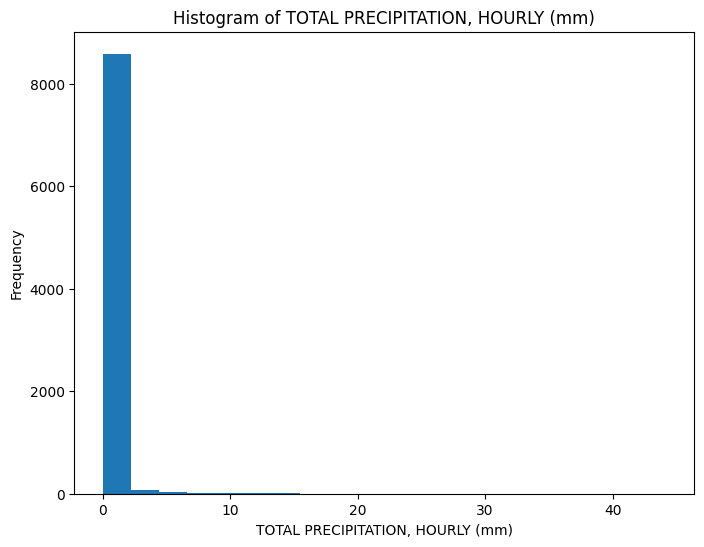

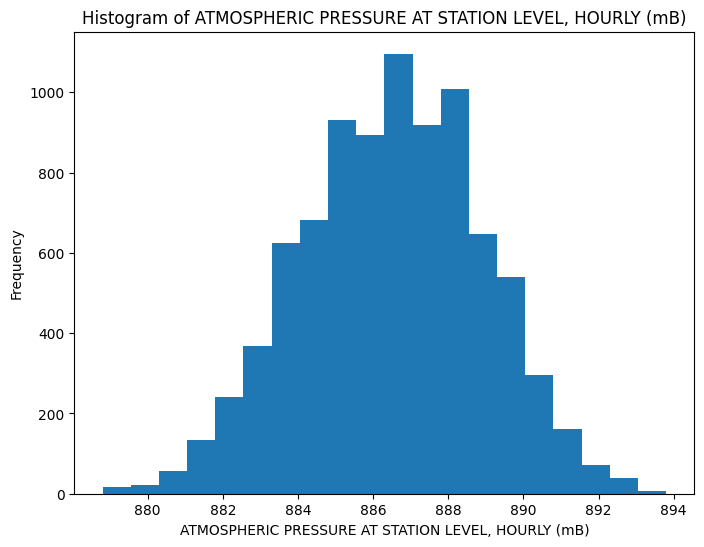

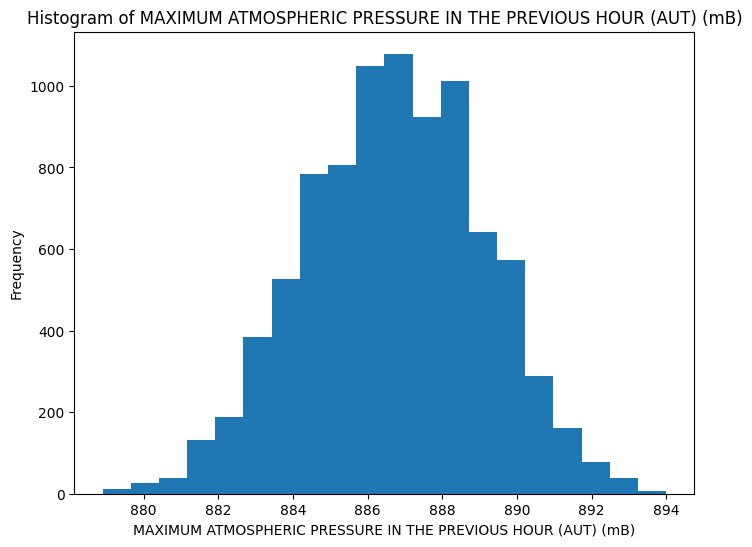

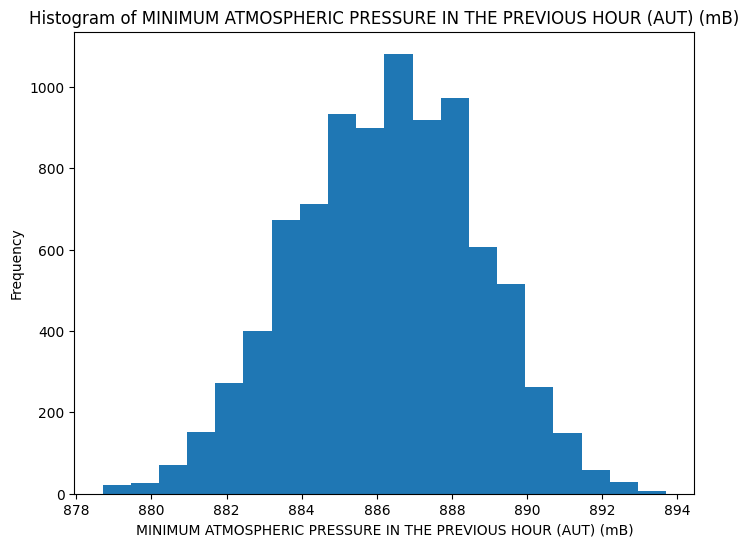

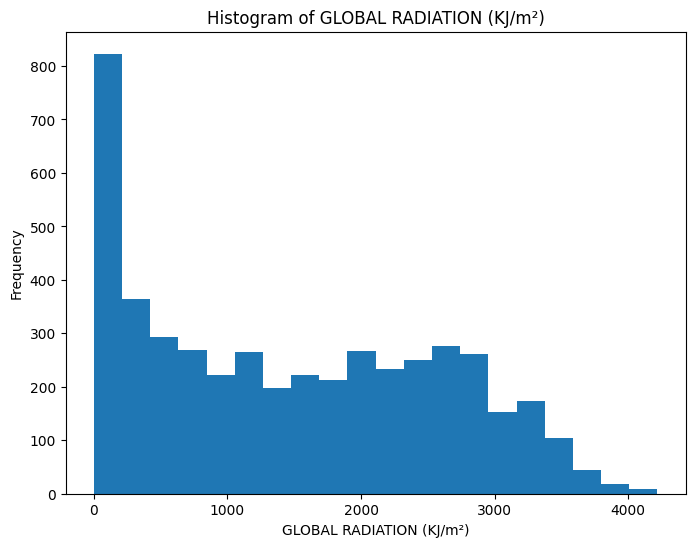

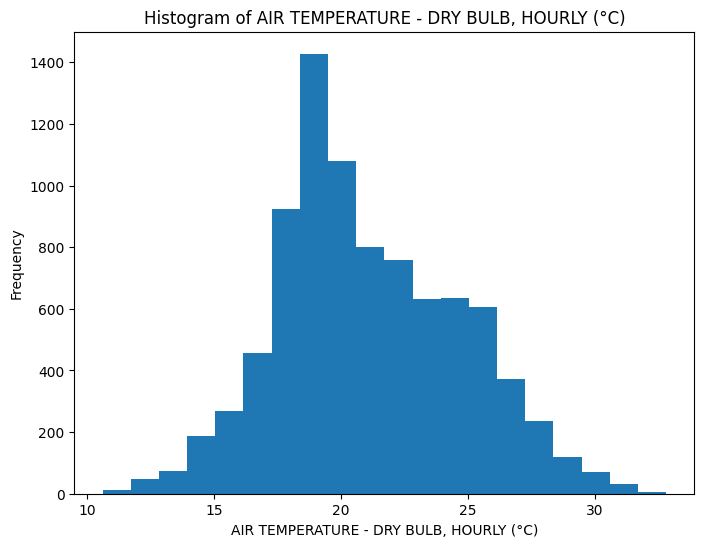

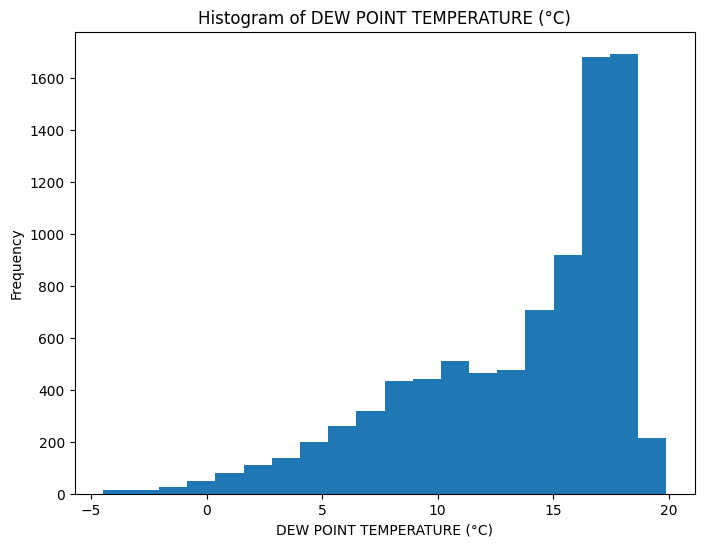

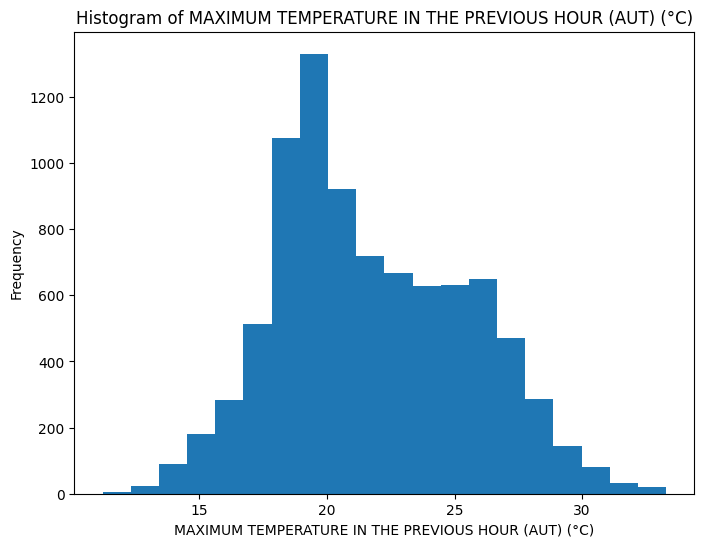

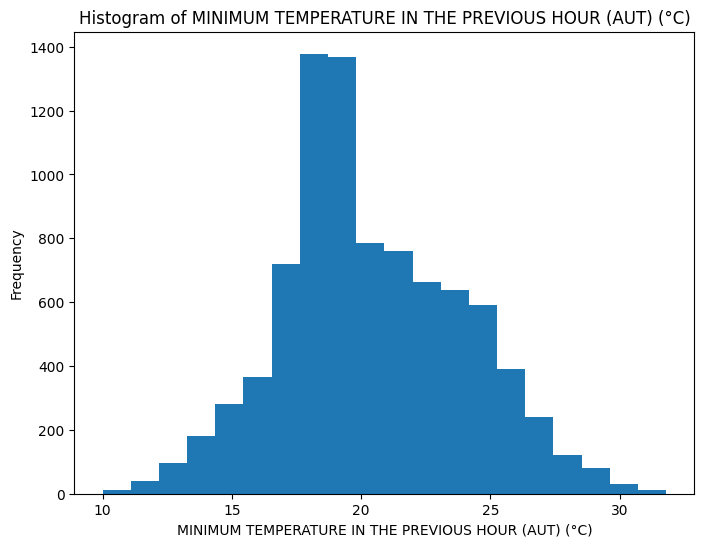

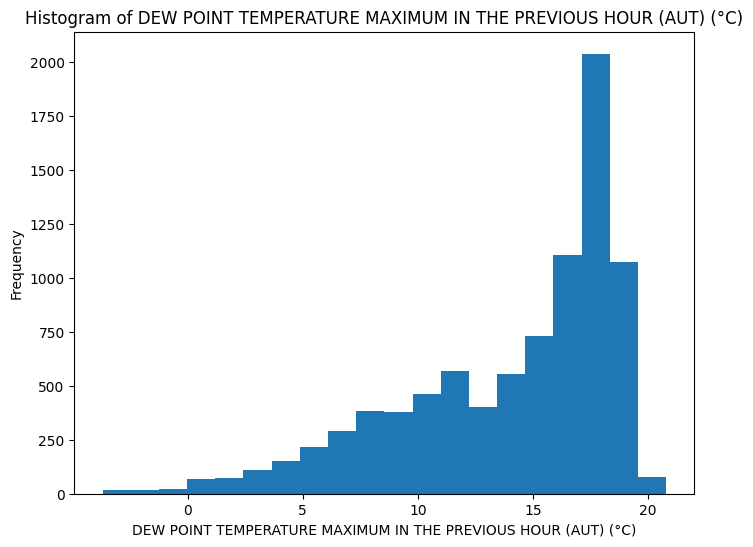

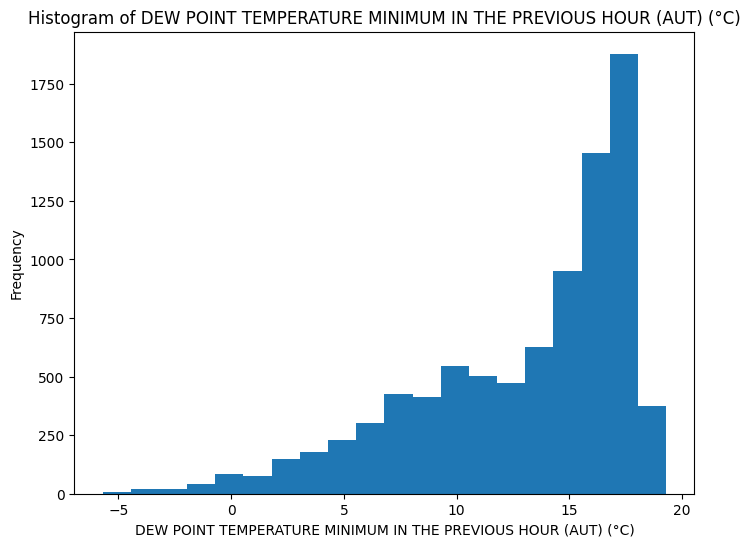

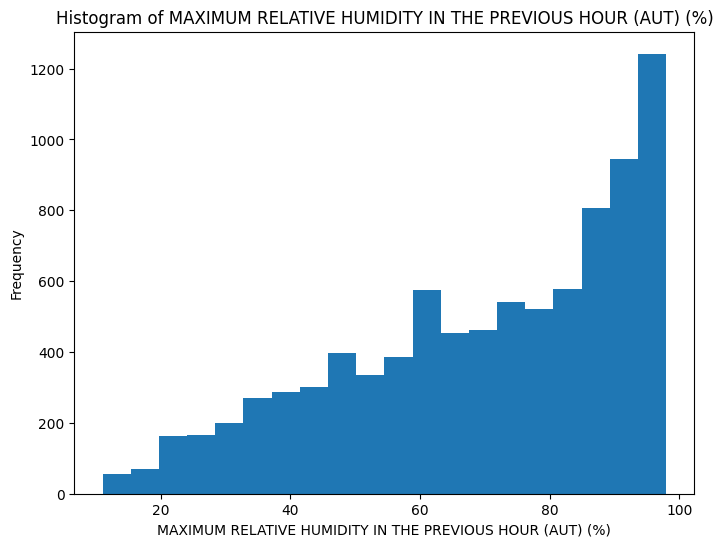

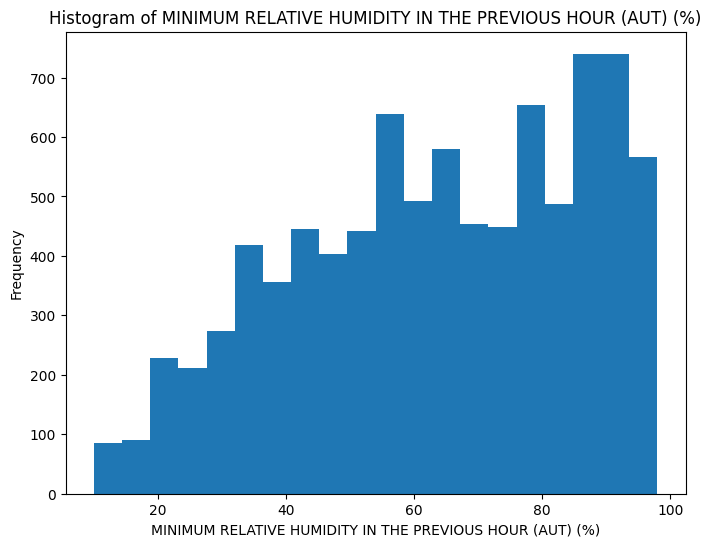

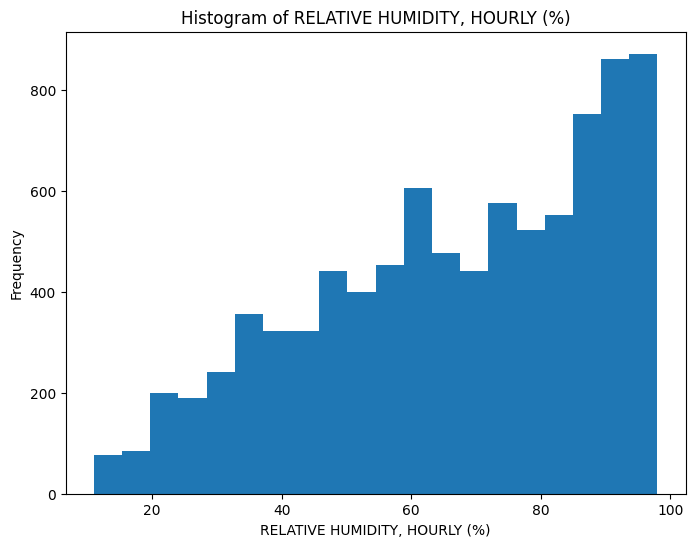

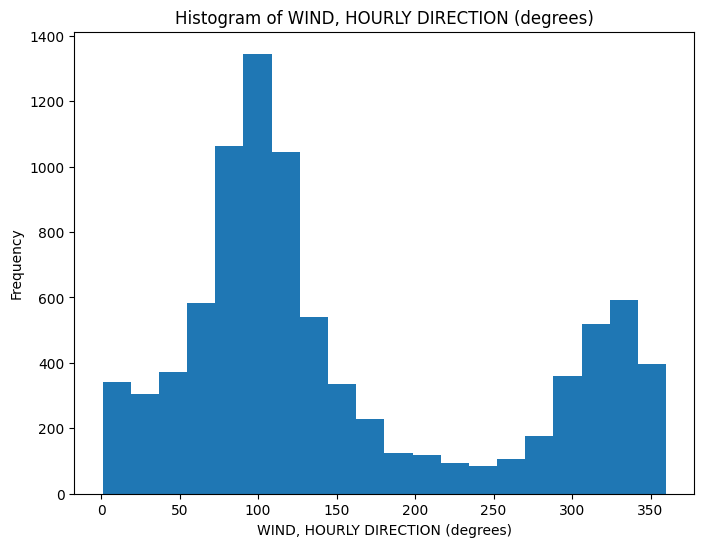

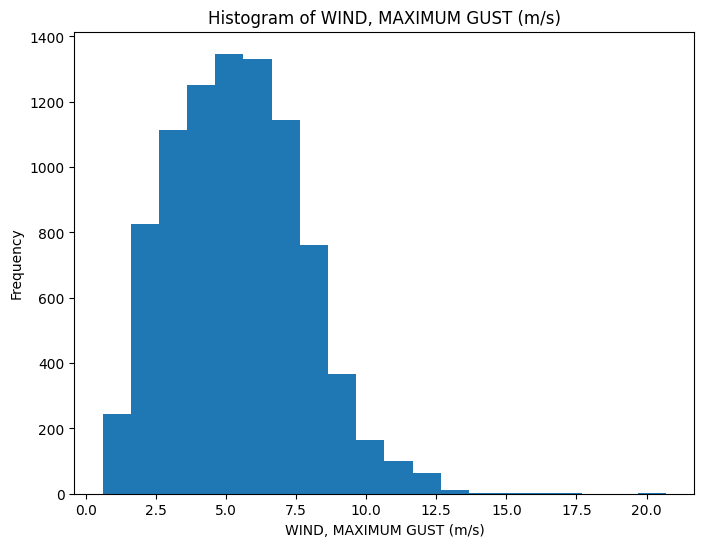

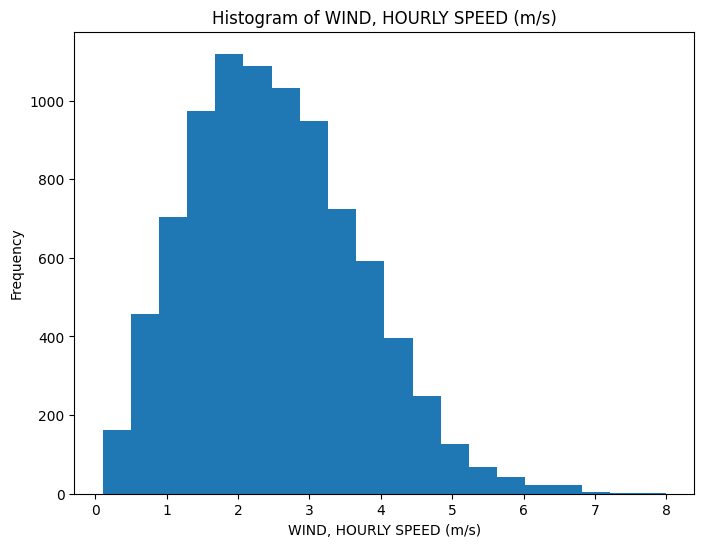

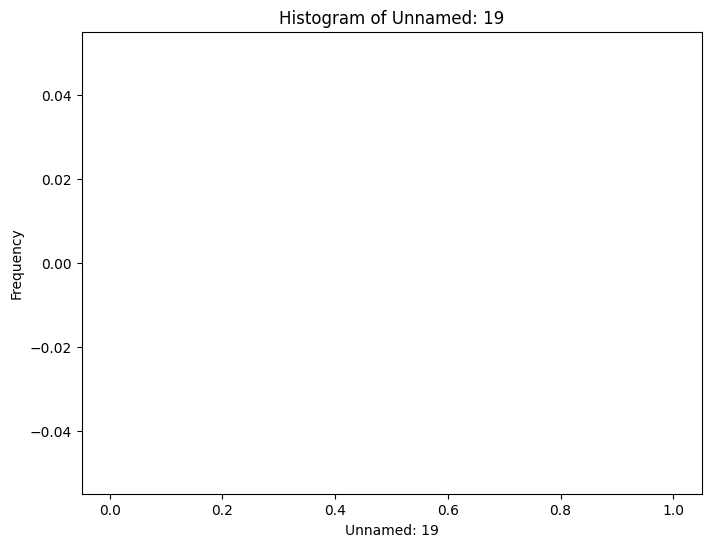

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


for col in df.columns:
    if col not in ['DATE', 'TIME (UTC)']:
        data_to_plot = df[col].replace(-9999, np.nan)
        plt.figure(figsize=(8, 6))
        data_to_plot.plot(kind='hist', bins=20, title=f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

In [ ]:
print(df.isnull().sum())

DATE                                                                0
TIME (UTC)                                                          0
TOTAL PRECIPITATION, HOURLY (mm)                                  582
ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)               7898
MAXIMUM ATMOSPHERIC PRESSURE IN THE PREVIOUS HOUR (AUT) (mB)     7919
MINIMUM ATMOSPHERIC PRESSURE IN THE PREVIOUS HOUR (AUT) (mB)     7889
GLOBAL RADIATION (KJ/m²)                                         4175
AIR TEMPERATURE - DRY BULB, HOURLY (°C)                          7851
DEW POINT TEMPERATURE (°C)                                       7899
MAXIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)              7908
MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)              7835
DEW POINT TEMPERATURE MAXIMUM IN THE PREVIOUS HOUR (AUT) (°C)    7915
DEW POINT TEMPERATURE MINIMUM IN THE PREVIOUS HOUR (AUT) (°C)    7932
MAXIMUM RELATIVE HUMIDITY IN THE PREVIOUS HOUR (AUT) (%)            0
MINIMUM RELATIVE HUM

# Analisis para proyecto


## Contexto de las regiones

### Regiones Cafeteras

Acorde al documento: https://perfectdailygrind.com/wp-content/uploads/2016/04/Mapa_BSCA_Regioes_Produtores-page-001-1024x724.jpg

Las regiones son:

1.   Sul de Minas
2.   Mantiqueira de Minas
3.   Chapada de Minas
4.   Matas de Minas
5.   Cerrados de Minas
6.   Cerrado Mineiro
7. Alta Mogiana
8. Mogiana
9. Média Mogiana
10. Marilia e Garça
11. Ourinhos e Avaré
12. Chapada Diamantina
13. Planalto de Vitória da Conquista
14. Serrana de Itiruçu/Brejões
15. Cerrado Balano
16. Montanhas do Espirito Santo
17. Norte Pioneiro do Parana
18. Paraná
19. Rio de Janeiro



### Regiones con información de temperatura

Dado que la data que encontramos no contiene la información al 100% procedimos a realizar una consulta manual por región, utilizando Google Maps, el documento y adicionalmente ciudades con información lo más cercana posible o central al sitio de interes. resultando en estas 19 Regiones:

1. Varginha
2. Varginha
3. CATALAO
4. MANHUACU
5. Montes claros
6. Patos de minas
7. Franca
8. Casa branca
9. itapira
10. Bauru
11. Avare
12. Lencois
13. Vitoria da conquista
14. Itirucu
15. Barreiras
16. Afonso claudio
17. Maringa
18. Parana
19. Friburgo


### Mapa de Regiones

In [ ]:
!pip install folium

In [ ]:
import folium
from IPython.display import display

# Pueblos/Ciudades
locations = {
    "Varginha": (-21.5556, -45.4364),
    "CATALAO": (-18.1656, -47.9469),
    "MANHUACU": (-20.2572, -42.0356),
    "Montes claros": (-16.7367, -43.8650),
    "Patos de minas": (-18.5789, -46.5184),
    "Franca": (-20.5386, -47.4009),
    "Casa branca": (-22.7900, -45.3067),
    "itapira": (-22.4385, -46.8223),
    "Bauru": (-22.3145, -49.0609),
    "avare": (-23.1064, -48.9256),
    "Lencois": (-12.5619, -41.3922),
    "Vitoria da conquista": (-14.8615, -40.8442),
    "Itirucu": (-13.5242, -40.1467),
    "Barreiras": (-12.1500, -44.9994),
    "Afonso claudio": (-20.0888, -41.1261),
    "Maringa": (-23.4205, -51.9332),
    "Parana": (-25.2521, -52.0215),
    "Nova Friburgo": (-22.2816, -42.5328),
}

# Initializar mapa
m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Añadir marcadores
for location, coords in locations.items():
    folium.Marker(location=coords, popup=location).add_to(m)

display(m)



## DATA EXPLORATION para variables climaticas


### Leer datos y guardar dataframes

In [1]:
import os
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

import gdown
from zipfile import ZipFile
import os
from io import BytesIO
import requests
import zipfile


Mounted at /content/drive


In [2]:
with zipfile.ZipFile('Data.zip', 'r') as zip_ref:
    zip_ref.extractall()


In [3]:
#Directorio CSV
csv_directory = 'Data'

# Lista de CSVs
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.CSV')]

# Lista vacía
dfs = []

# Nombres especificos de columnas
specific_column_names = [
    'DATA (YYYY-MM-DD)', 'HORA (UTC)', 'PRECIPITAÇÃO TOTAL HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
    'RADIACAO GLOBAL (KJ/m²)', 'TEMPERATURA DO AR - BULBO SECO HORARIA (°C)',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
    'UMIDADE RELATIVA DO AR HORARIA (%)',
    'VENTO DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO RAJADA MAXIMA (m/s)',
    'VENTO VELOCIDADE HORARIA (m/s)', 'Unnamed: 19'
]

# Iterar cada CSV
for csv_file in csv_files:
    # extraer nombre de archivo
    name_start = 17
    name_end = csv_file.find('_01-01-')
    #Debug para archivos sin el nombre correcto
    if name_end == -1:
        print(f"Error: no se encontró '_01-01-' en el nombre: {csv_file}")
        continue

    name = csv_file[name_start:name_end].replace('_', ' ')

    year_start = name_end + len('_01-01-')
    year_end = year_start + 4
    year = csv_file[year_start:year_end]

    # Crear formato de nombre
    formatted_name = f"{name}"

    # Leer CSV como DF y saltarse las primeras 8 filas que son info y no tabla, ademas de encoding latin1
    try:
        df = pd.read_csv(os.path.join(csv_directory, csv_file), sep=';', skiprows=8, error_bad_lines=False, quoting=3, encoding='latin1',decimal=',',na_values=-9999.0)
    except Exception as e:
        print(f"Error reading file {csv_file}: {e}")
        continue

    # renombrar columnas con nombres especificos (Evita nombres distintos)
    df.columns = specific_column_names

    # añadir columnas con los nombres
    df['Formatted Name'] = formatted_name
    df['Year'] = year

    df['DATA (YYYY-MM-DD)'] = pd.to_datetime(df['DATA (YYYY-MM-DD)'], errors='coerce').dt.strftime('%Y-%m-%d')
    import re
    # Algunos csv traen UTC como palabra en la hora, a esos csv hay que ajustar los formatos de cada fila
    def format_utc_time(cell_value):
        if 'UTC' in cell_value:
            match = re.match(r'(\d{2})(\d{2}) UTC', cell_value)
            if match:
                hours, minutes = match.groups()
                return f"{hours}:{minutes}"
        return cell_value
    df['HORA (UTC)'] = df['HORA (UTC)'].apply(format_utc_time)
    df['HORA (UTC)'] = pd.to_datetime(df['HORA (UTC)'], format='%H:%M', errors='coerce').dt.time


    # Append  DataFrame al df
    dfs.append(df)

# unir todos los df en uno solo
super_df = pd.concat(dfs, ignore_index=True)

# indexar
super_df = super_df.reset_index(drop=True)




# mostrar df
super_df


<ipython-input-3-7fb17bc16c1c>:50: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(os.path.join(csv_directory, csv_file), sep=';', skiprows=8, error_bad_lines=False, quoting=3, encoding='latin1',decimal=',',na_values=-9999.0)
<ipython-input-3-7fb17bc16c1c>:50: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(os.path.join(csv_directory, csv_file), sep=';', skiprows=8, error_bad_lines=False, quoting=3, encoding='latin1',decimal=',',na_values=-9999.0)
<ipython-input-3-7fb17bc16c1c>:50: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(os.path.join(csv_directory, csv_file), sep=';', skiprows=8, error_bad_lines=False, quoting=3, encoding='latin1',decimal=',',na_values=-

DATA (YYYY-MM-DD) HORA (UTC)  PRECIPITAÇÃO TOTAL HORÁRIO (mm)  \
0              2013-01-01   00:00:00                              0.0   
1              2013-01-01   01:00:00                              0.0   
2              2013-01-01   02:00:00                              0.0   
3              2013-01-01   03:00:00                              0.0   
4              2013-01-01   04:00:00                              0.0   
...                   ...        ...                              ...   
1971403        2011-12-31   19:00:00                              7.0   
1971404        2011-12-31   20:00:00                              0.0   
1971405        2011-12-31   21:00:00                              0.0   
1971406        2011-12-31   22:00:00                              0.2   
1971407        2011-12-31   23:00:00                              0.8   

         PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB)  \
0                                                    956.2      
1                                                    956.9      
2                                                    957.2      
3                                                    957.2      
4                                                    957.0      
...                                                    ...      
1971403                                              903.2      
1971404                                              902.7      
1971405                                              903.1      
1971406                                              903.6      
1971407                                              904.0      

         PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)  \
0                                                  956.2   
1                                                  956.9   
2                                                  957.2   
3                                                  957.3   
4                                                  957.2   
...                                                  ...   
1971403                                            903.8   
1971404                                            903.2   
1971405                                            903.1   
1971406                                            903.6   
1971407                                            904.0   

         PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)  \
0                                                   955.7   
1                                                   956.2   
2                                                   956.9   
3                                                   957.2   
4                                                   956.8   
...                                                   ...   
1971403                                             903.2   
1971404                                             902.7   
1971405                                             902.6   
1971406                                             903.1   
1971407                                             903.6   

         RADIACAO GLOBAL (KJ/m²)  TEMPERATURA DO AR - BULBO SECO HORARIA (°C)  \
0                            NaN                                         25.5   
1                            NaN                                         25.1   
2                            NaN                                         22.7   
3                            NaN                                         22.4   
4                            NaN                                         20.9   
...                          ...                                          ...   
1971403                    389.0                                         20.7   
1971404                    853.0                                         21.1   
1971405                    408.0                                         21.0   
1971406                     36.0                                         20.3   
19714

In [ ]:
summary = super_df.describe()
summary

PRECIPITAÇÃO TOTAL HORÁRIO (mm)  \
count                     1.733000e+06   
mean                      1.377698e-01   
std                       1.164036e+00   
min                       0.000000e+00   
25%                       0.000000e+00   
50%                       0.000000e+00   
75%                       0.000000e+00   
max                       8.660000e+01   

       PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB)  \
count                                       1.808443e+06      
mean                                        9.343586e+02      
std                                         2.247747e+01      
min                                         8.863000e+02      
25%                                         9.152000e+02      
50%                                         9.330000e+02      
75%                                         9.521000e+02      
max                                         9.900000e+02      

       PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)  \
count                                     1.806667e+06   
mean                                      9.346157e+02   
std                                       2.249564e+01   
min                                       8.865000e+02   
25%                                       9.154000e+02   
50%                                       9.332000e+02   
75%                                       9.523000e+02   
max                                       9.900000e+02   

       PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)  \
count                                      1.806667e+06   
mean                                       9.341090e+02   
std                                        2.246798e+01   
min                                        8.862000e+02   
25%                                        9.149000e+02   
50%                                        9.327000e+02   
75%                                        9.518000e+02   
max                                        9.897000e+02   

       RADIACAO GLOBAL (KJ/m²)  TEMPERATURA DO AR - BULBO SECO HORARIA (°C)  \
count            993926.000000                                 1.819931e+06   
mean               1398.492207                                 2.208117e+01   
std                1123.487890                                 5.048979e+00   
min                   0.000000                                -9.000000e-01   
25%                 326.500000                                 1.880000e+01   
50%                1255.300000                                 2.170000e+01   
75%                2304.800000                                 2.540000e+01   
max                7364.900000                                 4.430000e+01   

       TEMPERATURA DO PONTO DE ORVALHO (°C)  \
count                          1.804168e+06   
mean                           1.532290e+01   
std                            4.145199e+00   
min                           -1.000000e+01   
25%                            1.280000e+01   
50%                            1.610000e+01   
75%                            1.840000e+01   
max                            3.500000e+01   

       TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)  \
count                                1.818098e+06   
mean                                 2.277795e+01   
std                                  5.193799e+00   
min                                 -3.000000e-01   
25%                                  1.930000e+01   
50%                                  2.240000e+01   
75%                                  2.630000e+01   
max                                  4.500000e+01   

       TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)  \
count                                1.818016e+06   
mean                                 2.141893e+01   
std                                  4.897277e+00   
min                                 -1.100000e+00   
25%                                  1.830000e+01   
50%                                  2.120000e+01   
75%                 

### traducir columnas

In [4]:
translation_dict = {
    'DATA (YYYY-MM-DD)': 'DATE',
    'HORA (UTC)': 'TIME (UTC)',
    'PRECIPITAÇÃO TOTAL HORÁRIO (mm)': 'TOTAL PRECIPITATION, HOURLY (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB)': 'ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)':'MAXIMUM ATMOSPHERIC PRESSURE IN THE PREVIOUS HOUR (AUT) (mB)',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'MINIMUM ATMOSPHERIC PRESSURE IN THE PREVIOUS HOUR (AUT) (mB)',
    'RADIACAO GLOBAL (KJ/m²)': 'GLOBAL RADIATION (KJ/m²)',
    'TEMPERATURA DO AR - BULBO SECO HORARIA (°C)': 'AIR TEMPERATURE - DRY BULB, HOURLY (°C)',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)': 'DEW POINT TEMPERATURE (°C)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)': 'MAXIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)': 'MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)',
    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)': 'DEW POINT TEMPERATURE MAXIMUM IN THE PREVIOUS HOUR (AUT) (°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)': 'DEW POINT TEMPERATURE MINIMUM IN THE PREVIOUS HOUR (AUT) (°C)',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'MAXIMUM RELATIVE HUMIDITY IN THE PREVIOUS HOUR (AUT) (%)',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'MINIMUM RELATIVE HUMIDITY IN THE PREVIOUS HOUR (AUT) (%)',
    'UMIDADE RELATIVA DO AR HORARIA (%)': 'RELATIVE HUMIDITY, HOURLY (%)',
    'VENTO DIREÇÃO HORARIA (gr) (° (gr))': 'WIND, HOURLY DIRECTION (degrees)',
    'VENTO RAJADA MAXIMA (m/s)': 'WIND, MAXIMUM GUST (m/s)',
    'VENTO VELOCIDADE HORARIA (m/s)': 'WIND, HOURLY SPEED (m/s)',

    'Unnamed: 19': 'Unnamed: 19'
}

# Renombrar con diccionario
super_df = super_df.rename(columns=translation_dict)

In [ ]:
super_df

DATE TIME (UTC)  TOTAL PRECIPITATION, HOURLY (mm)  \
0        2016-01-01   00:00:00                               0.0   
1        2016-01-01   01:00:00                               0.0   
2        2016-01-01   02:00:00                               0.0   
3        2016-01-01   03:00:00                               0.0   
4        2016-01-01   04:00:00                               0.0   
...             ...        ...                               ...   
1971403  2012-12-31   19:00:00                               0.0   
1971404  2012-12-31   20:00:00                               0.0   
1971405  2012-12-31   21:00:00                               0.0   
1971406  2012-12-31   22:00:00                               0.0   
1971407  2012-12-31   23:00:00                               0.0   

         ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)  \
0                                                    939.0    
1                                                    939.5    
2                                                    939.6    
3                                                    939.2    
4                                                    938.7    
...                                                    ...    
1971403                                              960.1    
1971404                                              960.1    
1971405                                              960.4    
1971406                                              961.0    
1971407                                              962.2    

         MAXIMUM ATMOSPHERIC PRESSURE IN THE PREVIOUS HOUR (AUT) (mB)  \
0                                                    939.0              
1                                                    939.5              
2                                                    939.6              
3                                                    939.6              
4                                                    939.2              
...                                                    ...              
1971403                                              960.8              
1971404                                              960.2              
1971405                                              960.4              
1971406                                              961.0              
1971407                                              962.2              

         MINIMUM ATMOSPHERIC PRESSURE IN THE PREVIOUS HOUR (AUT) (mB)  \
0                                                    938.2              
1                                                    939.1              
2                                                    939.5              
3                                                    939.2              
4                                                    938.6              
...                                                    ...              
1971403                                              960.1              
1971404                                              959.9              
1971405                                              960.1              
1971406                                              960.4              
1971407                                              961.0              

         GLOBAL RADIATION (KJ/m²)  AIR TEMPERATURE - DRY BULB, HOURLY (°C)  \
0                             NaN                                     27.9   
1                             NaN                                     27.4   
2                             NaN                                     27.6   
3                             NaN                                     26.9   
4                             NaN                                     25.1   
...                           ...                                      ...   
1971403                    2265.3                                     35.1   
1971404                    1459.8                              

In [ ]:
summary = super_df.describe()
summary

TOTAL PRECIPITATION, HOURLY (mm)  \
count                      1.655921e+06   
mean                       1.323742e-01   
std                        1.133561e+00   
min                        0.000000e+00   
25%                        0.000000e+00   
50%                        0.000000e+00   
75%                        0.000000e+00   
max                        8.140000e+01   

       ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)  \
count                                       1.655921e+06    
mean                                        9.346110e+02    
std                                         2.221336e+01    
min                                         8.863000e+02    
25%                                         9.156000e+02    
50%                                         9.335000e+02    
75%                                         9.523000e+02    
max                                         9.900000e+02    

       MAXIMUM ATMOSPHERIC PRESSURE IN THE PREVIOUS HOUR (AUT) (mB)  \
count                                       1.655921e+06              
mean                                        9.348666e+02              
std                                         2.222697e+01              
min                                         8.865000e+02              
25%                                         9.158000e+02              
50%                                         9.337000e+02              
75%                                         9.526000e+02              
max                                         9.900000e+02              

       MINIMUM ATMOSPHERIC PRESSURE IN THE PREVIOUS HOUR (AUT) (mB)  \
count                                       1.655921e+06              
mean                                        9.343597e+02              
std                                         2.220089e+01              
min                                         8.862000e+02              
25%                                         9.154000e+02              
50%                                         9.333000e+02              
75%                                         9.520000e+02              
max                                         9.897000e+02              

       AIR TEMPERATURE - DRY BULB, HOURLY (°C)  DEW POINT TEMPERATURE (°C)  \
count                             1.655921e+06                1.655921e+06   
mean                              2.212600e+01                1.530359e+01   
std                               5.027293e+00                4.143637e+00   
min                               6.000000e-01               -1.000000e+01   
25%                               1.880000e+01                1.280000e+01   
50%                               2.180000e+01                1.610000e+01   
75%                               2.540000e+01                1.840000e+01   
max                               4.350000e+01                3.500000e+01   

       MAXIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)  \
count                                       1.655921e+06     
mean                                        2.282343e+01     
std                                         5.170851e+00     
min                                         1.000000e+00     
25%                                         1.930000e+01     
50%                                         2.240000e+01     
75%                                         2.630000e+01     
max                                         4.500000e+01     

       MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)  \
count                                       1.655921e+06     
mean                                        2.146486e+01     
std                                         4.872831e+00     
min                                         4.000000e-01     
25%                                         1.830000e+01     
50%                                         2.120000e+01     
75%                                         2.460000e+01     
max                            

In [5]:
missing_values = super_df.isnull().sum()

missing_percentage = (missing_values / len(super_df)) * 100

print(missing_percentage)

DATE                                                               0.000000
TIME (UTC)                                                         0.000000
TOTAL PRECIPITATION, HOURLY (mm)                                  12.093286
ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)                 8.266427
MAXIMUM ATMOSPHERIC PRESSURE IN THE PREVIOUS HOUR (AUT) (mB)       8.356515
MINIMUM ATMOSPHERIC PRESSURE IN THE PREVIOUS HOUR (AUT) (mB)       8.356515
GLOBAL RADIATION (KJ/m²)                                          49.582938
AIR TEMPERATURE - DRY BULB, HOURLY (°C)                            7.683696
DEW POINT TEMPERATURE (°C)                                         8.483277
MAXIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)                7.776675
MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)                7.780835
DEW POINT TEMPERATURE MAXIMUM IN THE PREVIOUS HOUR (AUT) (°C)      8.616988
DEW POINT TEMPERATURE MINIMUM IN THE PREVIOUS HOUR (AUT) (°C)      8.632257
MAXIMUM RELA

##### Eliminar columna radiación global dado que casi el 50% de las mediciones son missing values , eliminar tambien columna vacia

In [6]:
columns_to_drop = ['GLOBAL RADIATION (KJ/m²)', 'Unnamed: 19']
super_df.drop(columns=columns_to_drop, inplace=True)


Reemplazar valores perdidos con promedio de valores (2 horas antes y 2 horas despues cuando sea posible)

In [ ]:
super_df.sort_values(['Formatted Name', 'DATE', 'TIME (UTC)'], inplace=True)

# Columns to replace missing values with the average of surrounding hours
columns_to_replace = [
    'TOTAL PRECIPITATION, HOURLY (mm)',
    'MAXIMUM ATMOSPHERIC PRESSURE IN THE PREVIOUS HOUR (AUT) (mB)',
    'MAXIMUM ATMOSPHERIC PRESSURE IN THE PREVIOUS HOUR (AUT) (mB)',
    'MINIMUM ATMOSPHERIC PRESSURE IN THE PREVIOUS HOUR (AUT) (mB)',
    'AIR TEMPERATURE - DRY BULB, HOURLY (°C)',
    'DEW POINT TEMPERATURE (°C)',
    'MAXIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)',
    'MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)',
    'DEW POINT TEMPERATURE MAXIMUM IN THE PREVIOUS HOUR (AUT) (°C)',
    'DEW POINT TEMPERATURE MINIMUM IN THE PREVIOUS HOUR (AUT) (°C)',
    'MAXIMUM RELATIVE HUMIDITY IN THE PREVIOUS HOUR (AUT) (%)',
    'MINIMUM RELATIVE HUMIDITY IN THE PREVIOUS HOUR (AUT) (%)',
    'RELATIVE HUMIDITY, HOURLY (%)',
    'WIND, HOURLY DIRECTION (degrees)',
    'WIND, MAXIMUM GUST (m/s)',
    'WIND, HOURLY SPEED (m/s)'
]

# Fill missing con ventana de 3
def fill_missing_with_average(df, column, window_size=3):
    df[column] = df[column].fillna(df[column].rolling(window=window_size, min_periods=0).mean())

for column in columns_to_replace:
    fill_missing_with_average(super_df, column, window_size=5)


# contar nuevamwente
missing_values = super_df.isnull().sum()
missing_percentage = (missing_values / len(super_df)) * 100
print(missing_percentage)

KeyboardInterrupt: ignored

##### Debido a que aun persisten los N.A. es mejor eliminar esta información, el codigo se genero de nuevo pero se dropearon las filas con missings.

In [ ]:
super_df.sort_values(['Formatted Name', 'DATE', 'TIME (UTC)'], inplace=True)
super_df.dropna(inplace=True)
missing_values = super_df.isnull().sum()
missing_percentage = (missing_values / len(super_df)) * 100
print(missing_percentage)

DATE                                                             0.0
TIME (UTC)                                                       0.0
TOTAL PRECIPITATION, HOURLY (mm)                                 0.0
ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)               0.0
MAXIMUM ATMOSPHERIC PRESSURE IN THE PREVIOUS HOUR (AUT) (mB)     0.0
MINIMUM ATMOSPHERIC PRESSURE IN THE PREVIOUS HOUR (AUT) (mB)     0.0
AIR TEMPERATURE - DRY BULB, HOURLY (°C)                          0.0
DEW POINT TEMPERATURE (°C)                                       0.0
MAXIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)              0.0
MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)              0.0
DEW POINT TEMPERATURE MAXIMUM IN THE PREVIOUS HOUR (AUT) (°C)    0.0
DEW POINT TEMPERATURE MINIMUM IN THE PREVIOUS HOUR (AUT) (°C)    0.0
MAXIMUM RELATIVE HUMIDITY IN THE PREVIOUS HOUR (AUT) (%)         0.0
MINIMUM RELATIVE HUMIDITY IN THE PREVIOUS HOUR (AUT) (%)         0.0
RELATIVE HUMIDITY, HOURLY (%)     

### Analisis univariado y bivariado

#### Univariado (Distribuciones)

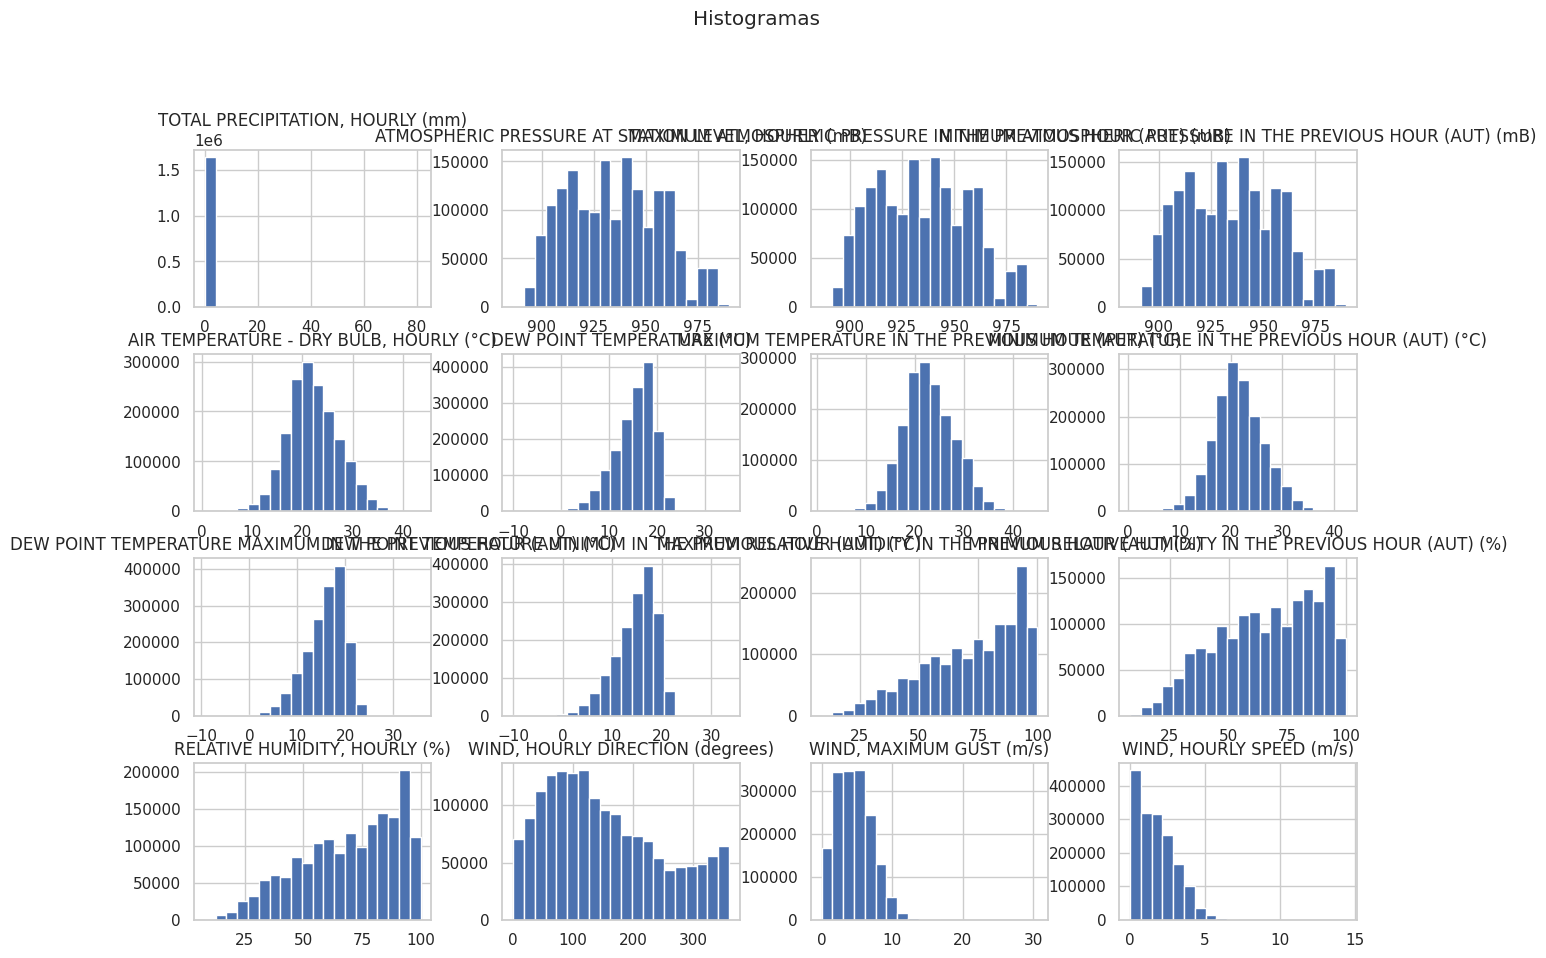

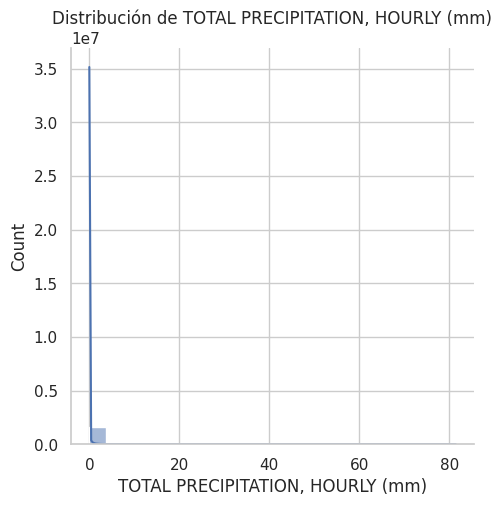

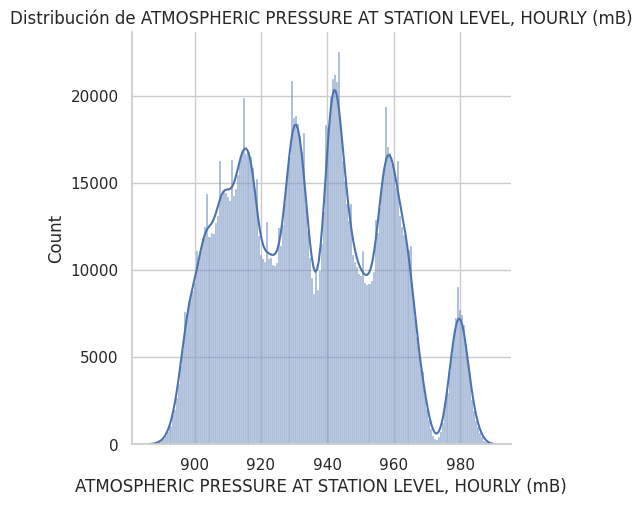

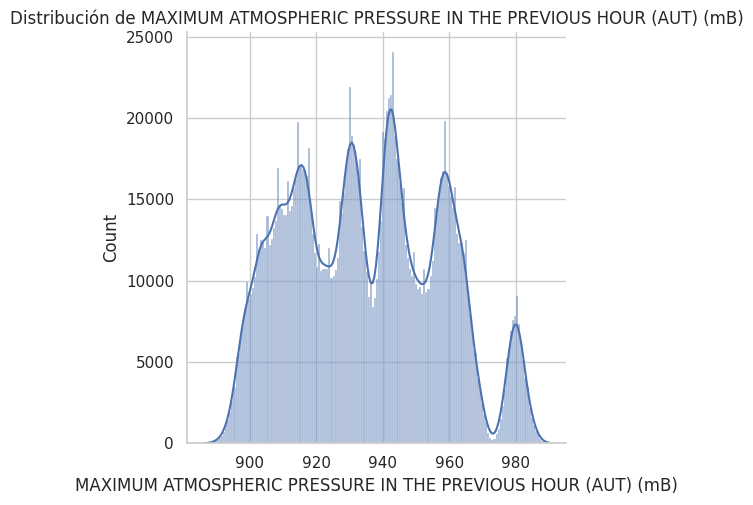

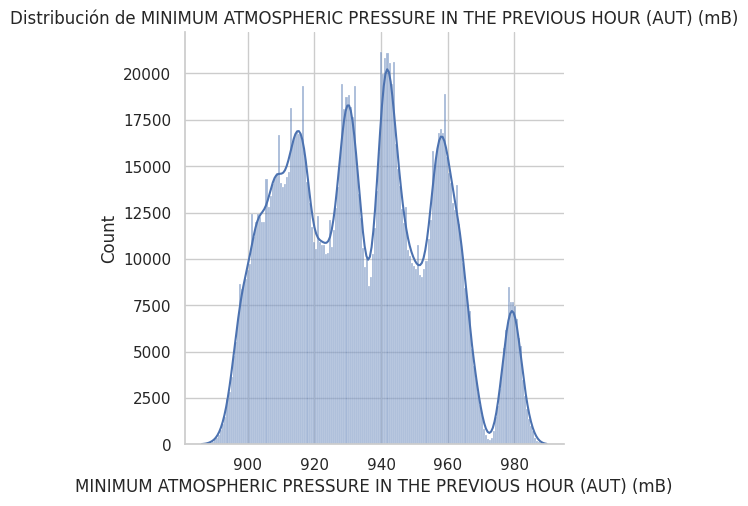

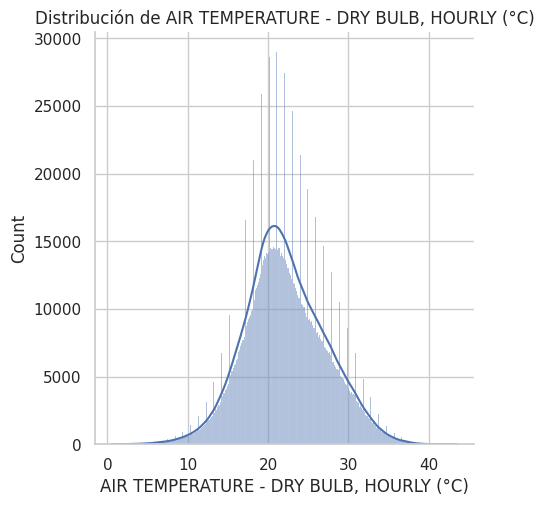

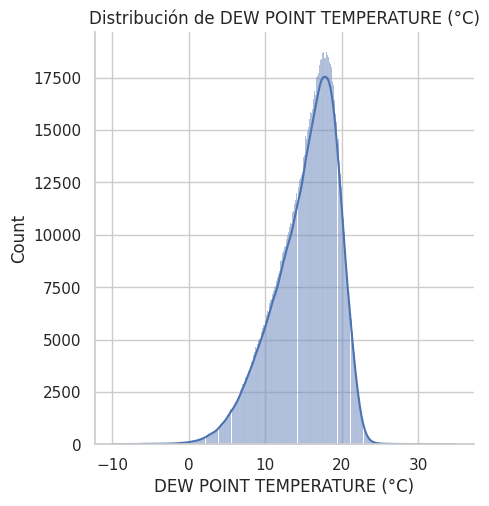

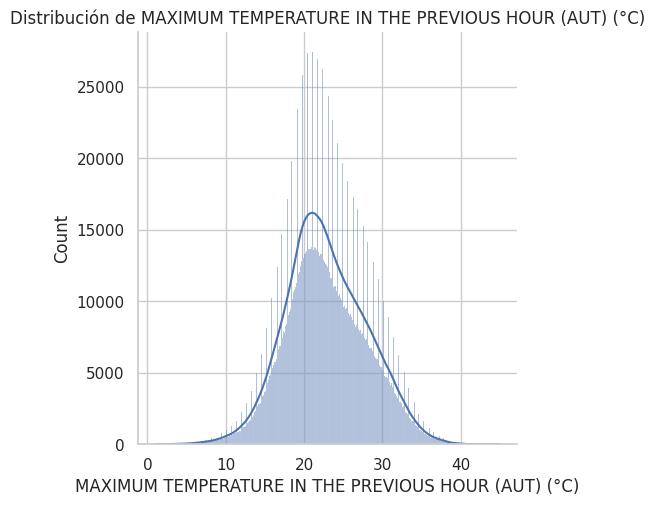

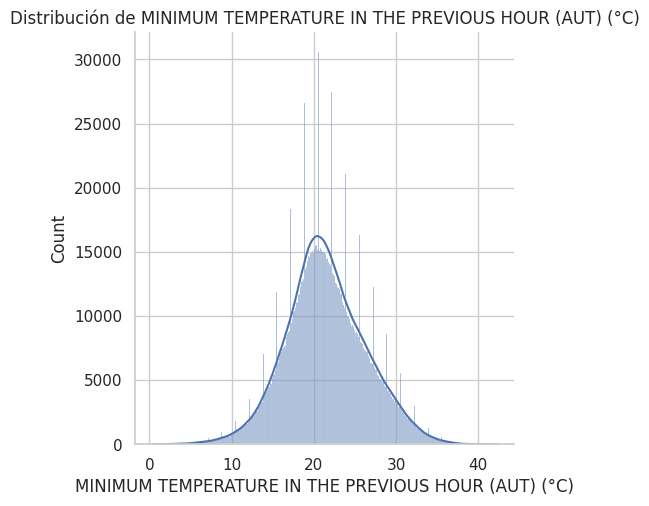

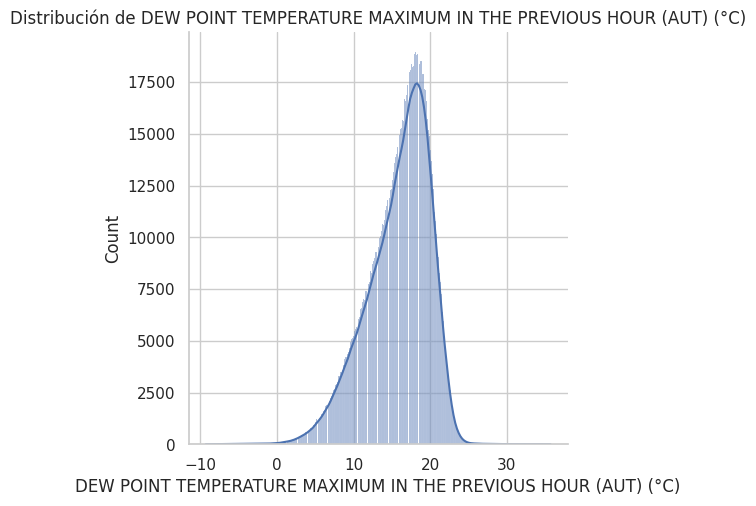

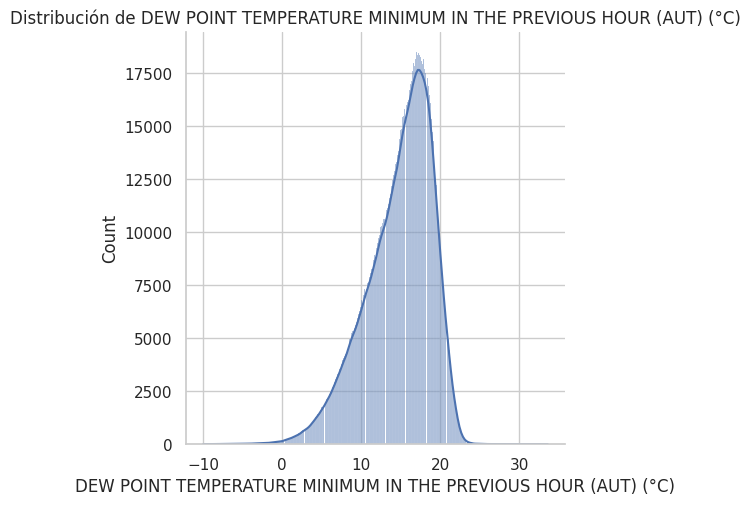

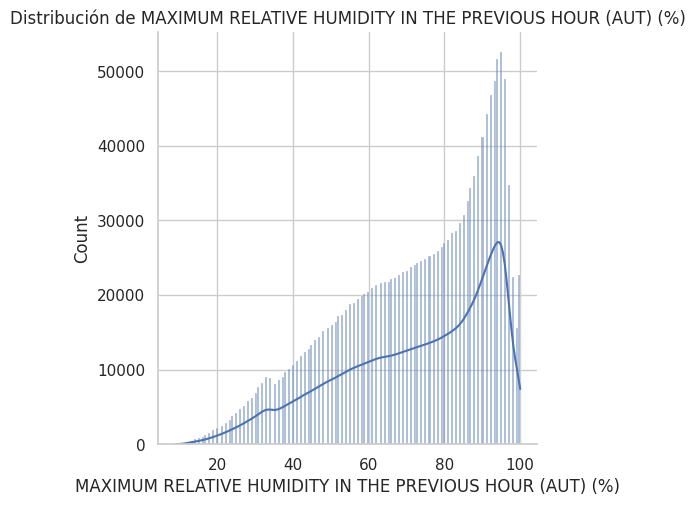

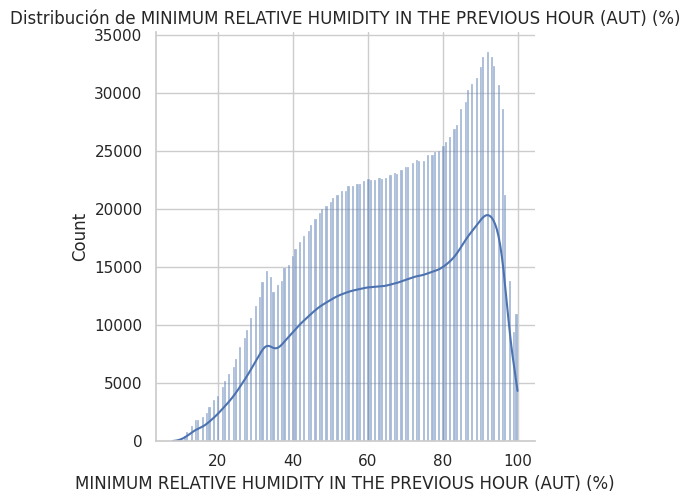

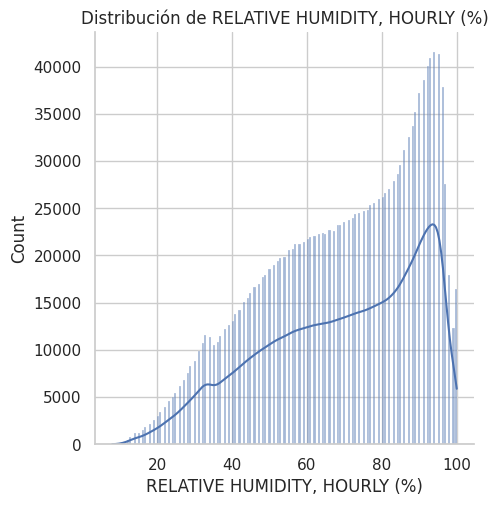

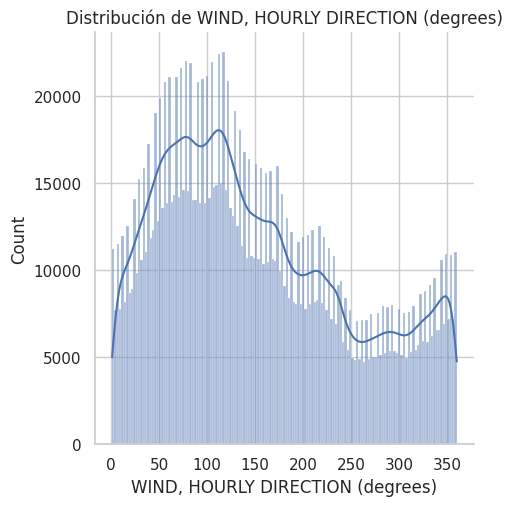

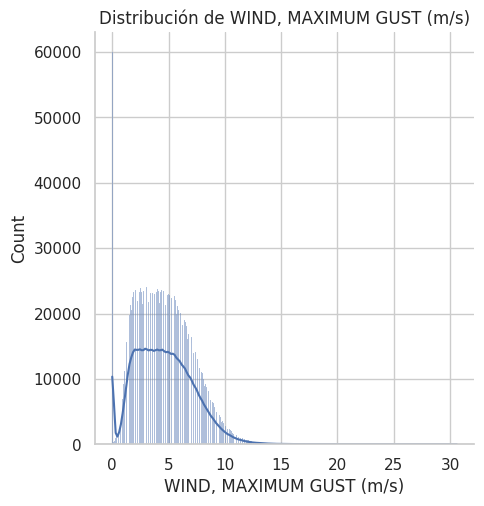

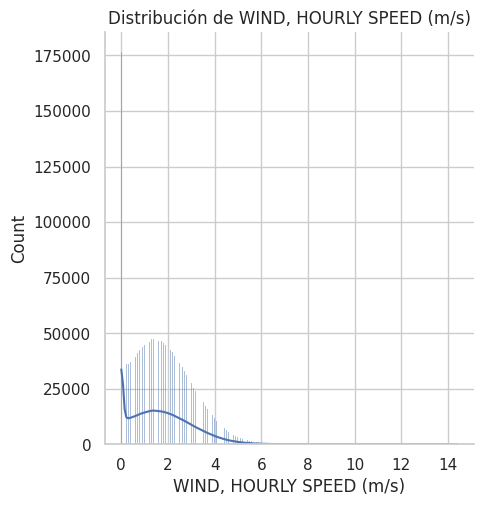

<ipython-input-46-52908f98884d>:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = super_df.corr()


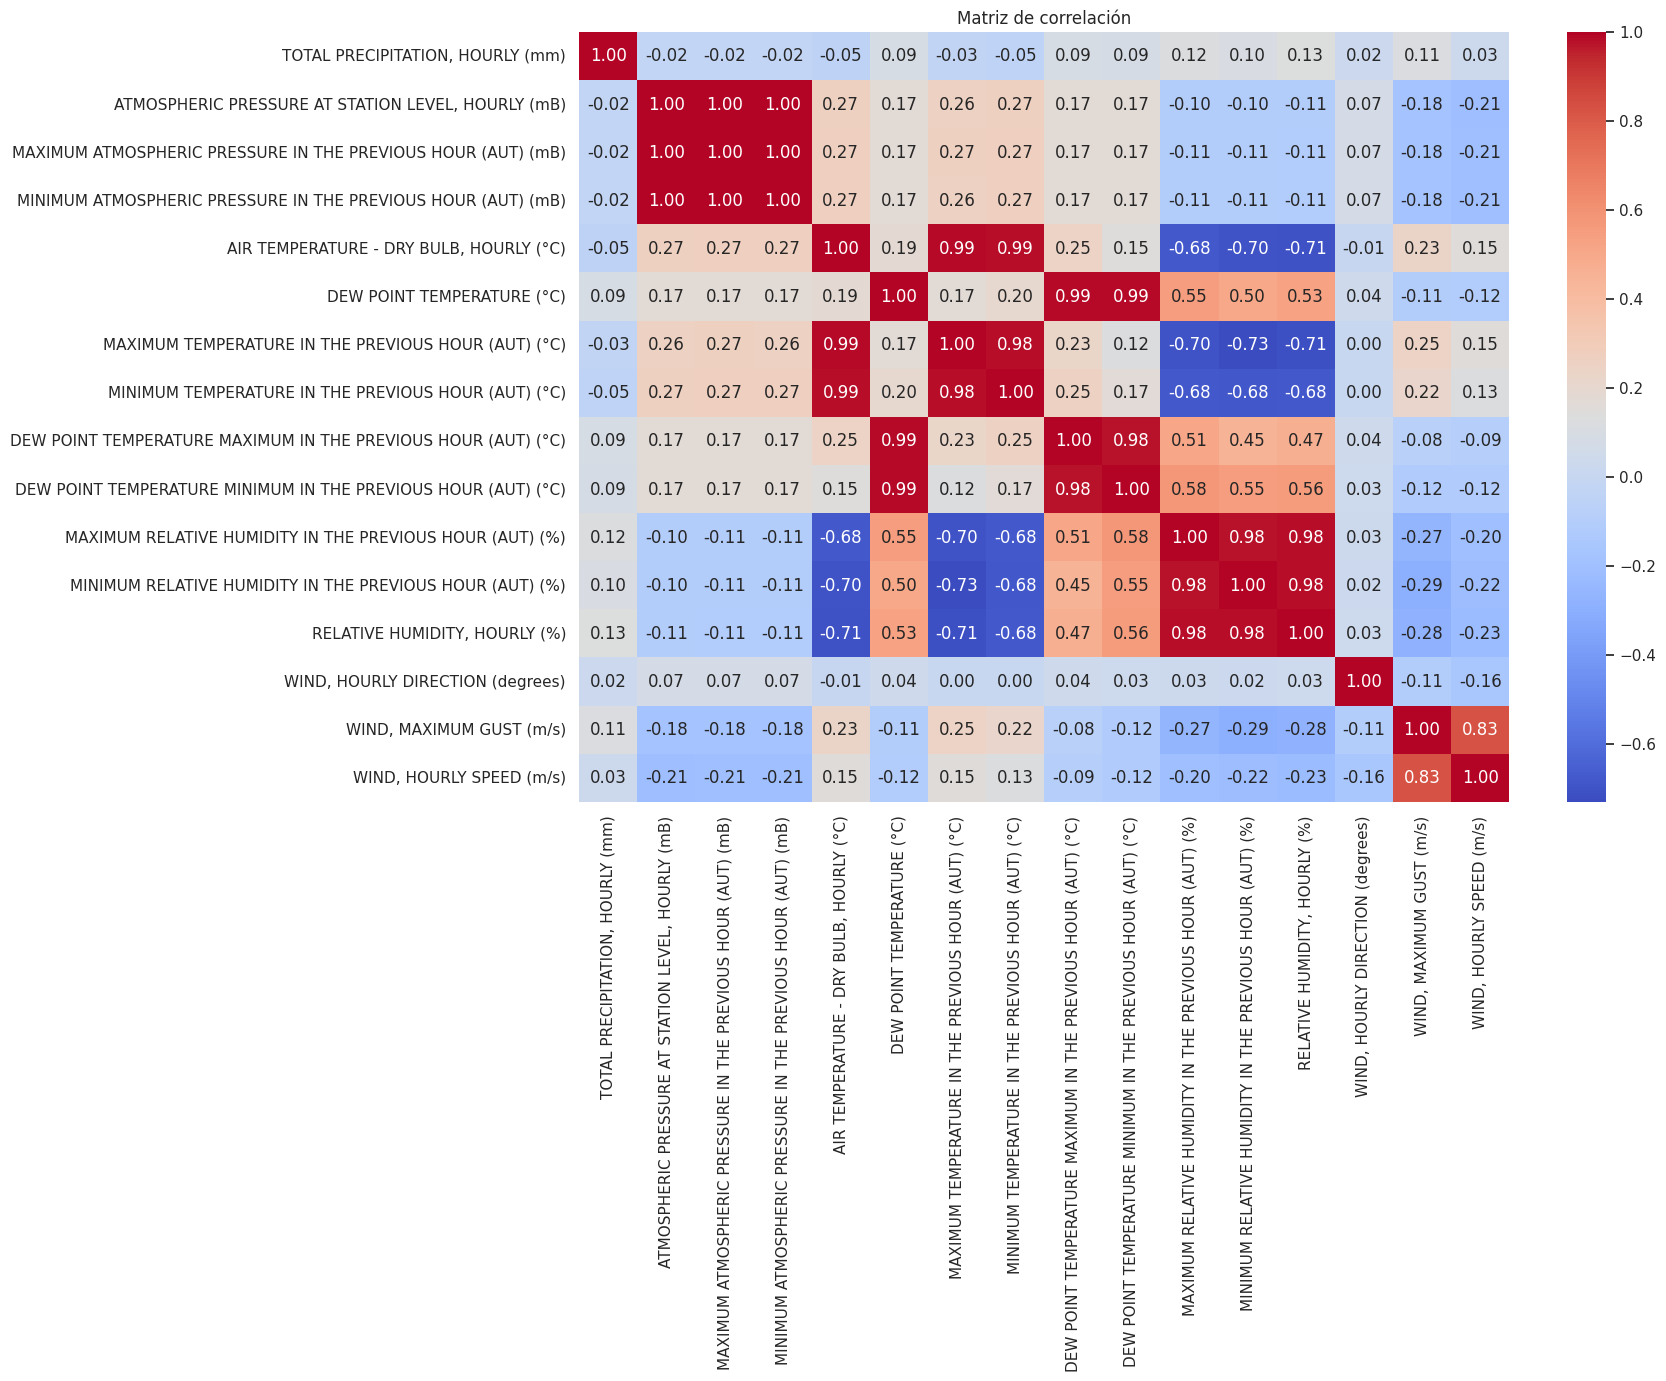

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
sns.set(style="whitegrid")
numeric_columns = super_df.select_dtypes(include=['float64', 'int64']).columns
super_df[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogramas', y=1.02)
plt.show()


for column in numeric_columns:
    sns.displot(super_df[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()

# Plot heatmap correlaciones
correlation_matrix = super_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


#### Bi-variado (Series de tiempo)

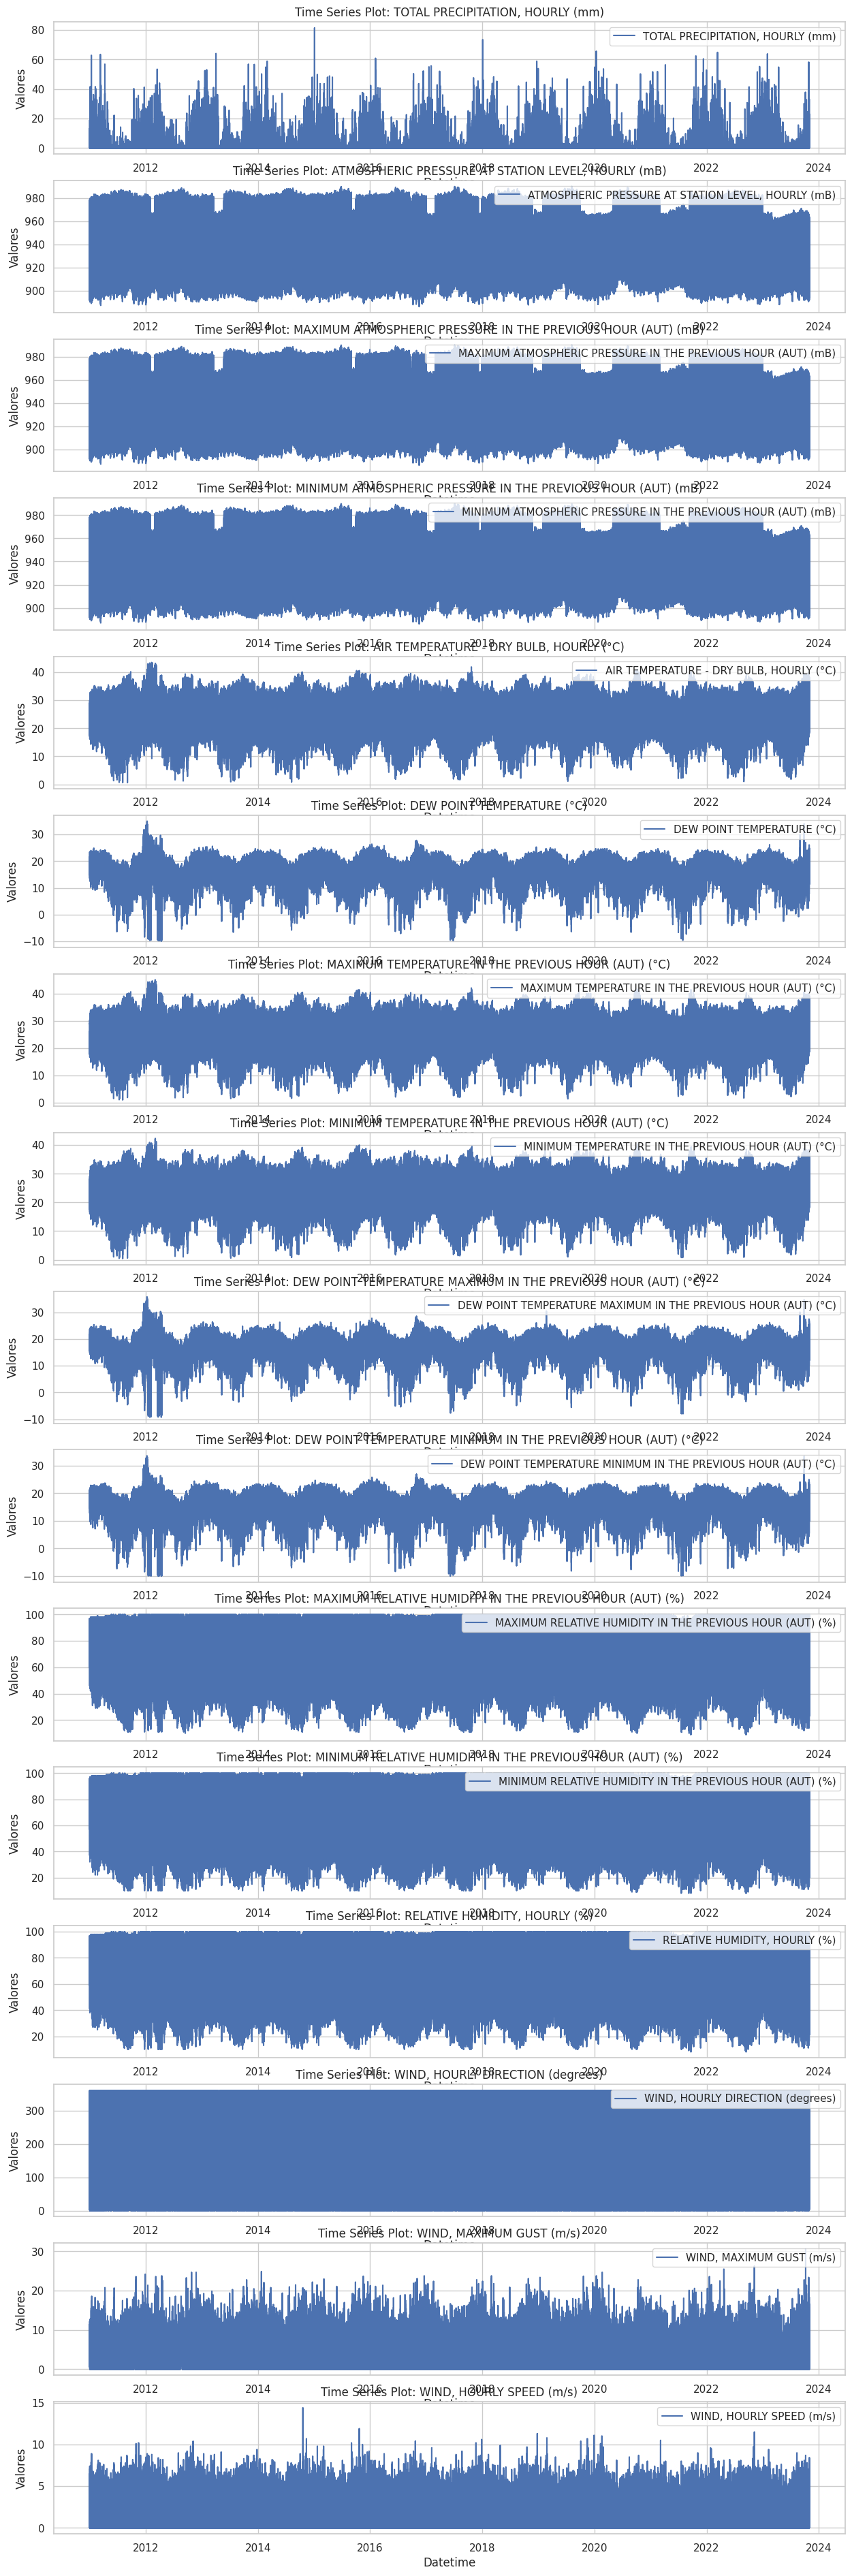

In [ ]:
super_df2=super_df
super_df2['TIME (UTC)'] = super_df2['TIME (UTC)'].astype(str).str.zfill(6)

# Combinar data y tiempo para ordenar
super_df2['Datetime'] = pd.to_datetime(super_df2['DATE'] + ' ' + super_df2['TIME (UTC)'], errors='coerce')

# utilizar nueva columna como index
super_df2.set_index('Datetime', inplace=True)

# ordenar por index
super_df2.sort_index(inplace=True)

# Plot cada variable numerica
plt.figure(figsize=(15, 60))

for i, column in enumerate(super_df2.select_dtypes(include=['float64', 'int64']).columns, start=1):
    plt.subplot(len(super_df2.columns), 1, i)
    plt.plot(super_df2.index, super_df[column], label=column)
    plt.title(f'Time Series Plot: {column}')
    plt.xlabel('Datetime')
    plt.ylabel('Valores')
    plt.legend(loc='upper right')


plt.show()

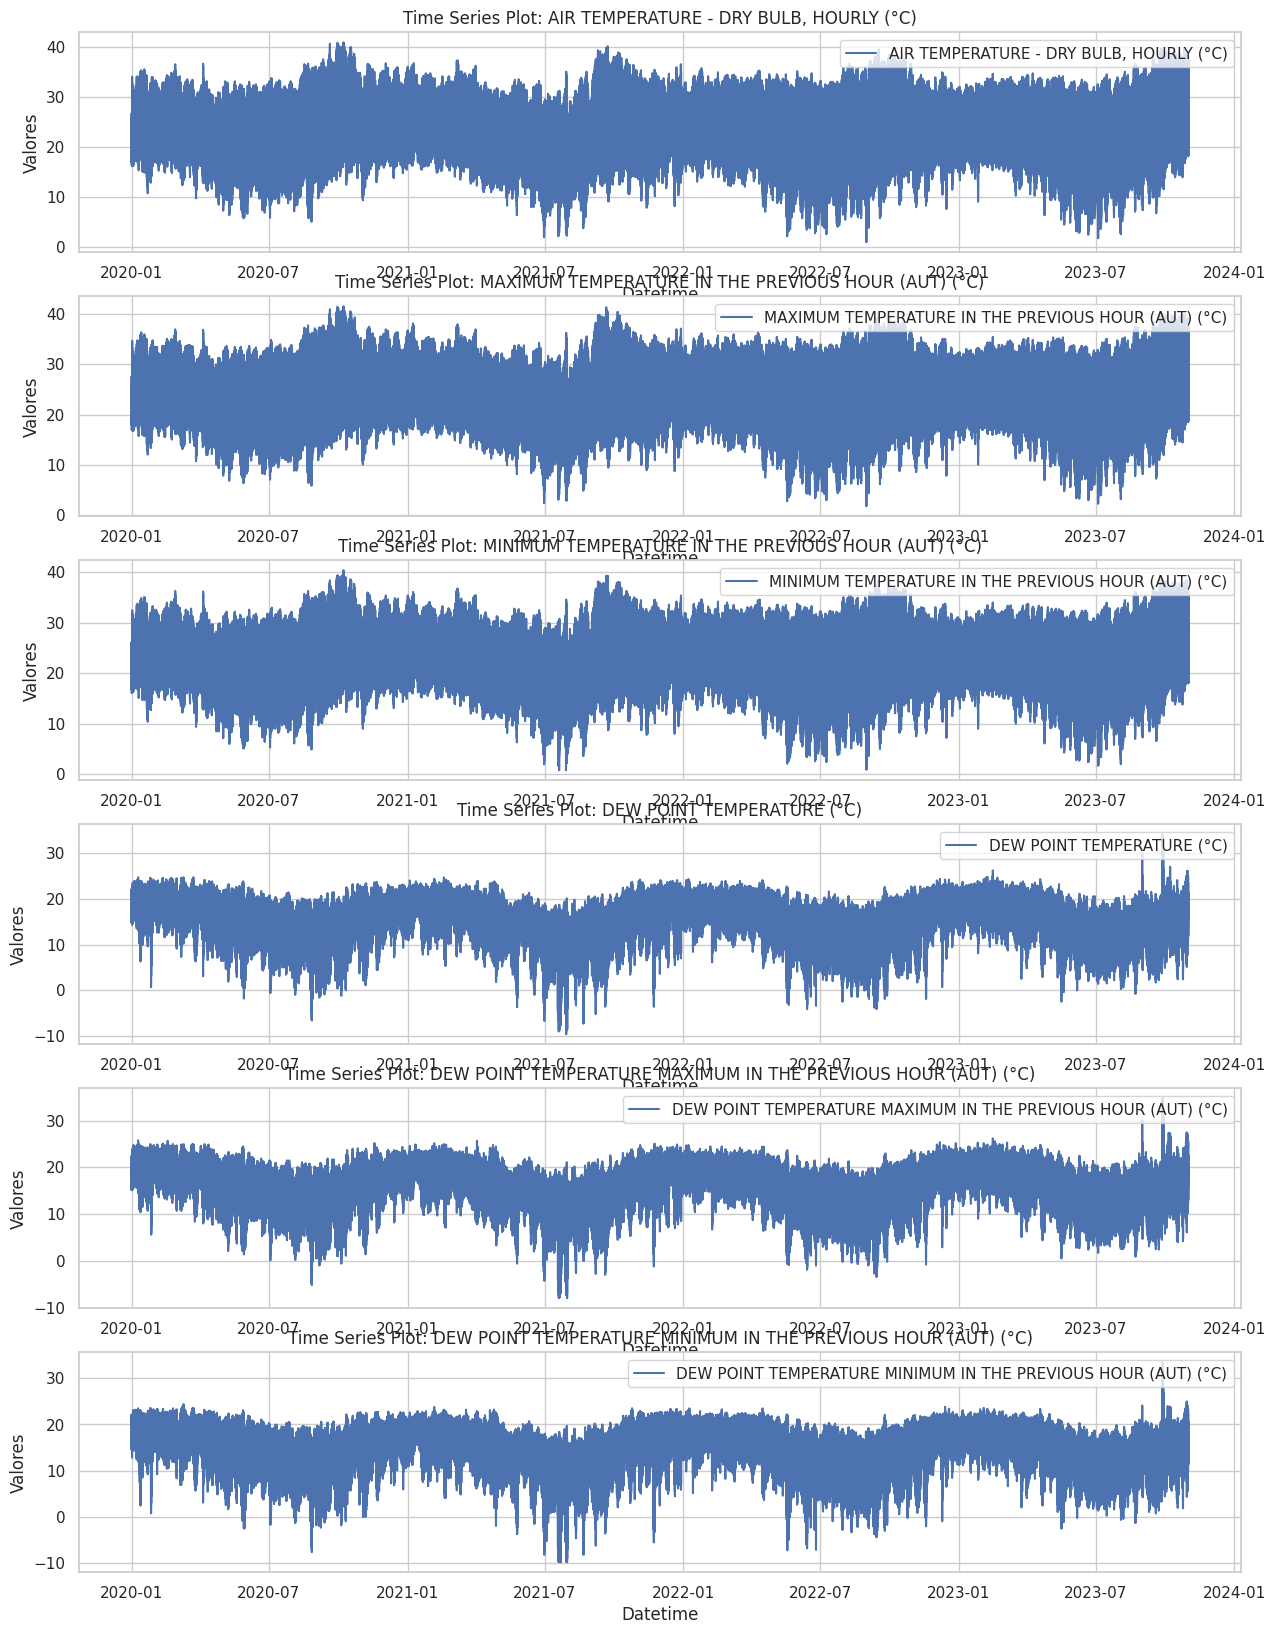

In [ ]:
temp_columns = [
    'AIR TEMPERATURE - DRY BULB, HOURLY (°C)',
    'MAXIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)',
    'MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)',
    'DEW POINT TEMPERATURE (°C)',
    'DEW POINT TEMPERATURE MAXIMUM IN THE PREVIOUS HOUR (AUT) (°C)',
    'DEW POINT TEMPERATURE MINIMUM IN THE PREVIOUS HOUR (AUT) (°C)'
]

super_df_temp = super_df2.loc['2020-01-01':'2023-12-31', temp_columns]


plt.figure(figsize=(15, 20))

for i, column in enumerate(super_df_temp.columns, start=1):
    plt.subplot(len(super_df_temp.columns), 1, i)
    plt.plot(super_df_temp.index, super_df_temp[column], label=column)
    plt.title(f'Time Series Plot: {column}')
    plt.xlabel('Datetime')
    plt.ylabel('Valores')
    plt.legend(loc='upper right')

plt.show()

##### Se observa que en 2012, finales de 2017 y en 2021 han existido unas muy bajas temperaturas que han afectado los precios del café, particularmente las heladas de 2019 han repercutido en Colombia pues el precio del café durante este periodo fue muy bueno para los caficultores y apenas hace 2 meses empezó a bajar

## DATA EXPLORATION Precios café

### Leer datos

In [ ]:
dfprecios = pd.read_csv('KC=F.csv',  encoding='utf-8',decimal='.')
summary=dfprecios.describe()
print(summary)
dfprecios.dtypes

              Open         High          Low        Close    Adj Close  \
count  3240.000000  3240.000000  3240.000000  3240.000000  3240.000000   
mean    154.665617   156.450185   152.815941   154.531065   154.531065   
std      46.740333    47.426696    46.050094    46.728015    46.728015   
min      87.050003    87.599998    86.349998    86.650002    86.650002   
25%     119.187498   120.400002   117.937498   119.137501   119.137501   
50%     140.075005   141.800003   138.899994   140.199997   140.199997   
75%     181.787498   184.250000   179.762501   182.162495   182.162495   
max     305.299988   306.250000   304.000000   304.899994   304.899994   

             Volume  
count   3240.000000  
mean   12037.490741  
std    11698.422155  
min        0.000000  
25%       31.000000  
50%    11872.500000  
75%    20025.250000  
max    62750.000000  


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

### Análisis univariado

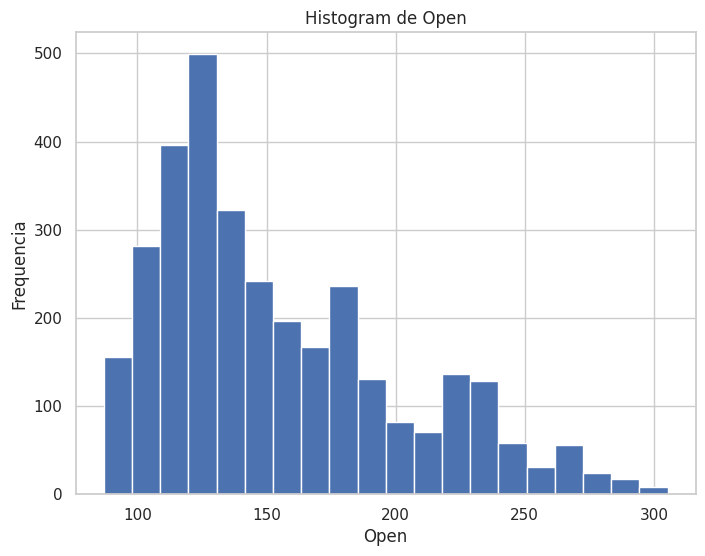

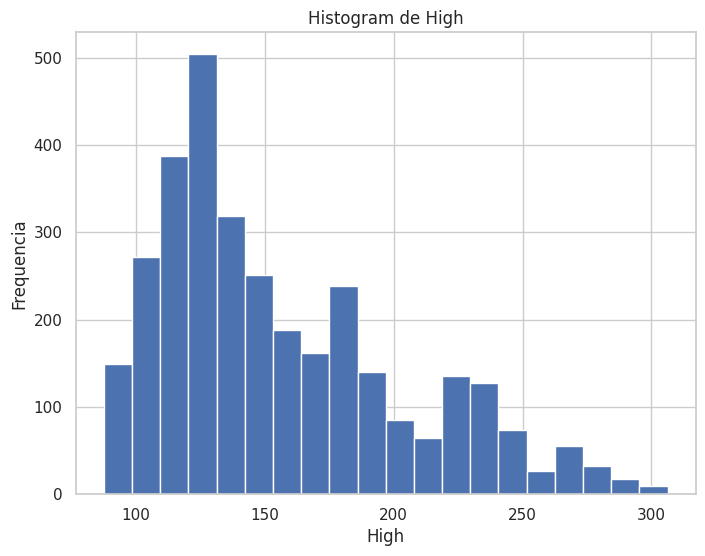

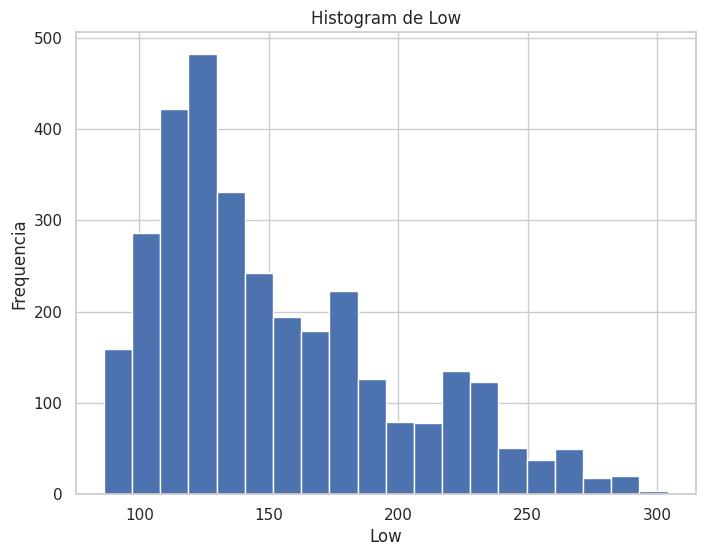

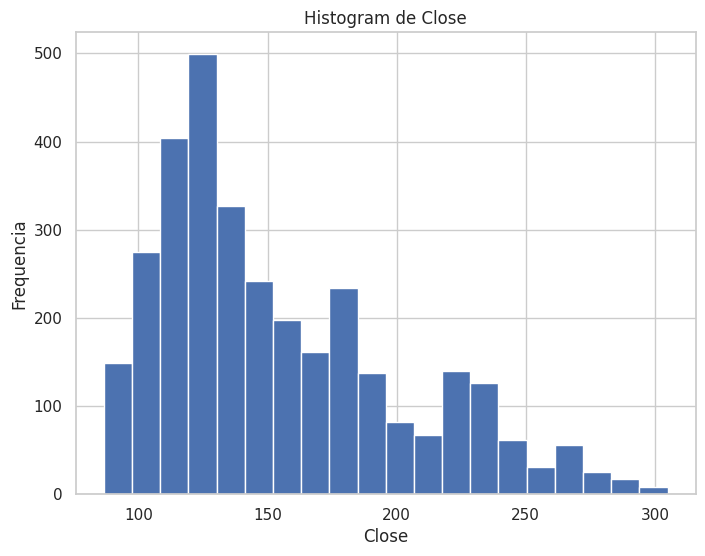

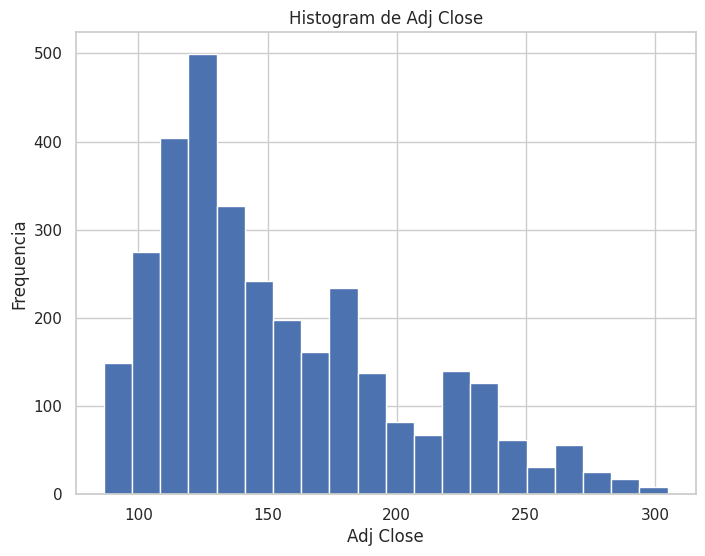

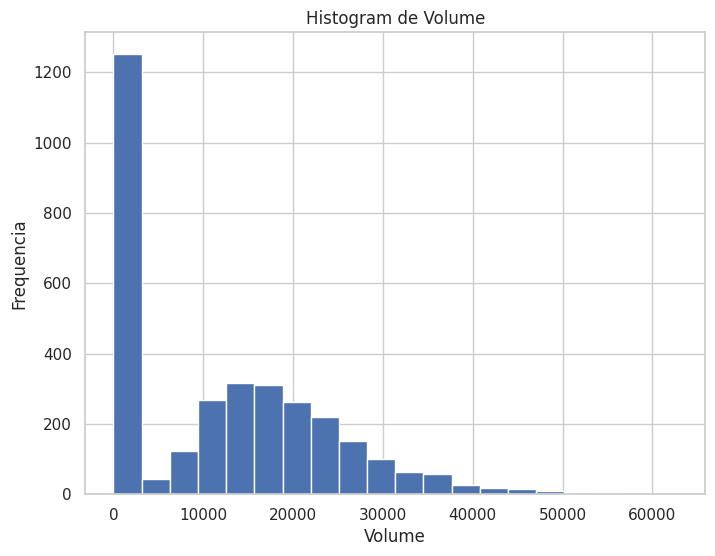

In [ ]:
for col in dfprecios.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(8, 6))
    dfprecios[col].plot(kind='hist', bins=20, title=f'Histogram de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequencia')
    plt.show()

### Analisis Bivariado

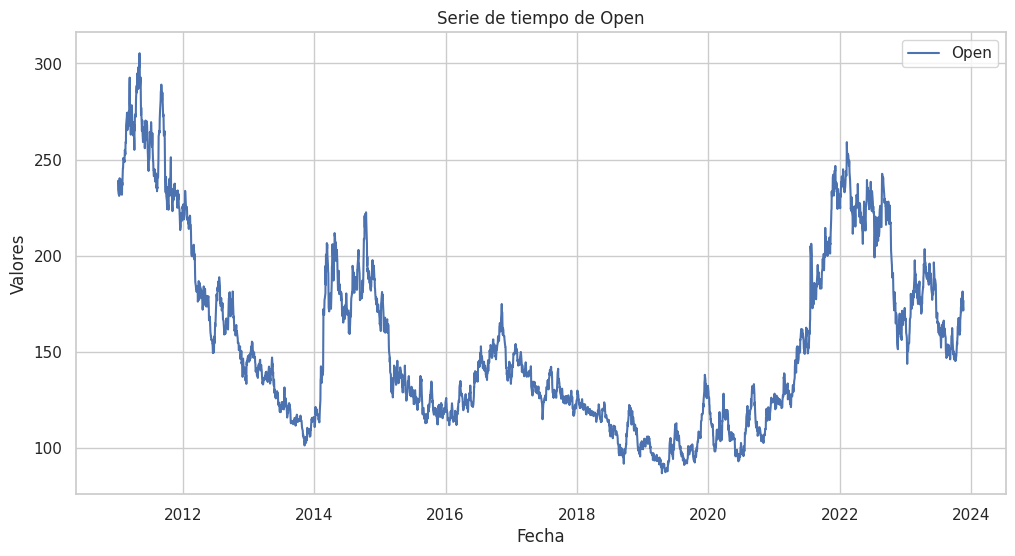

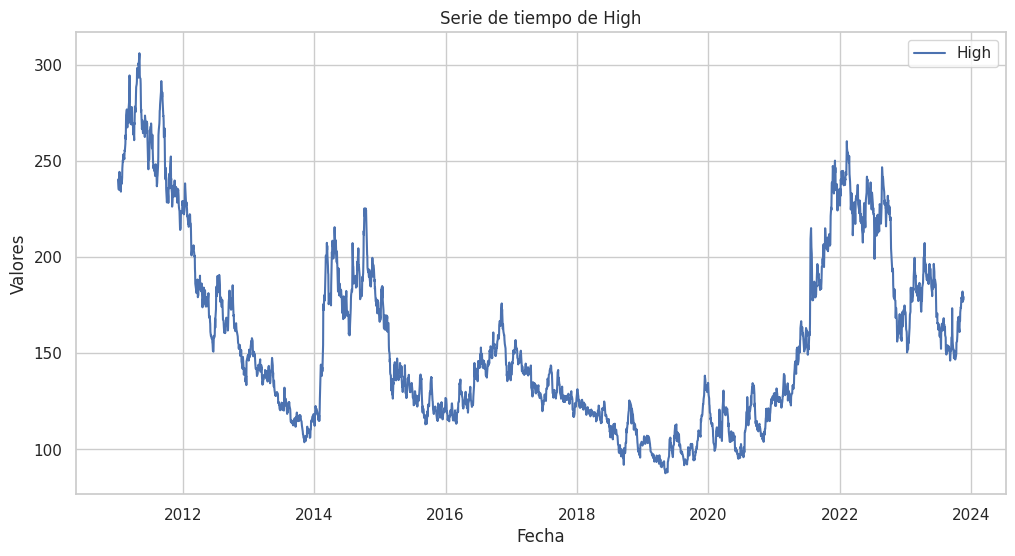

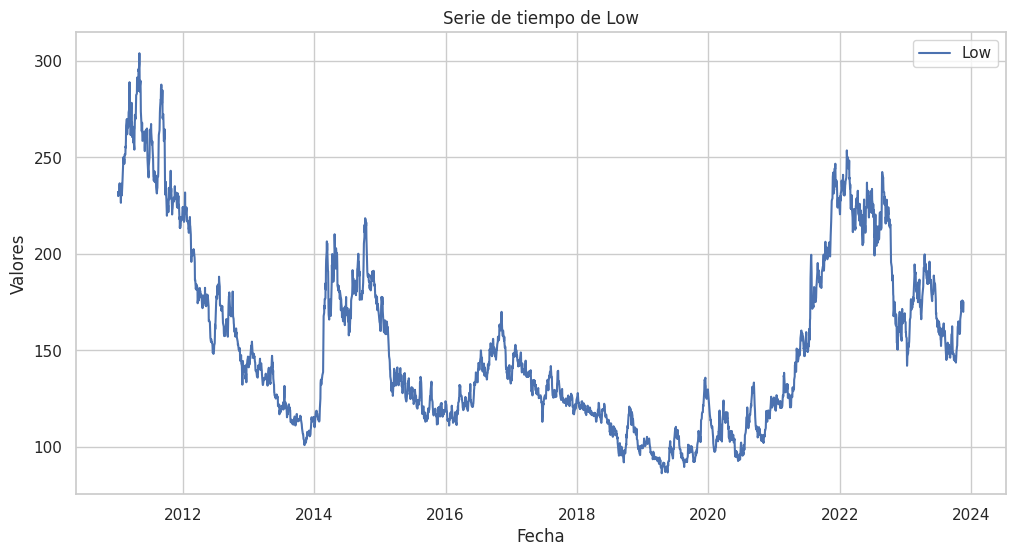

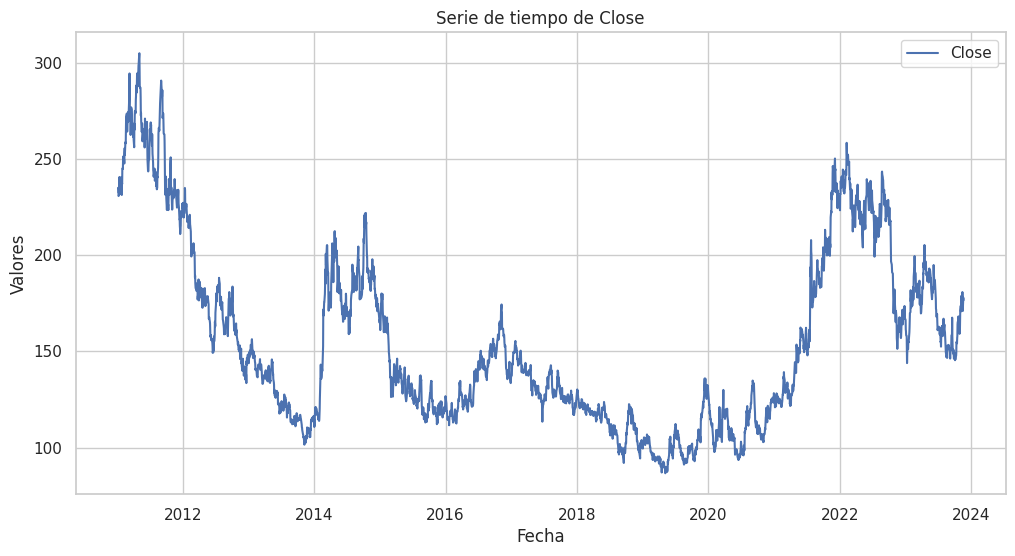

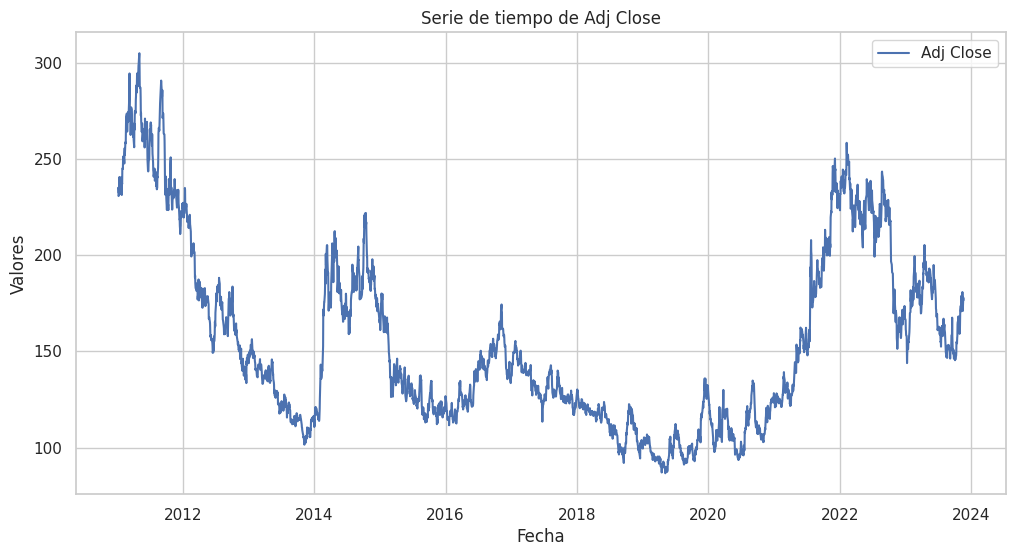

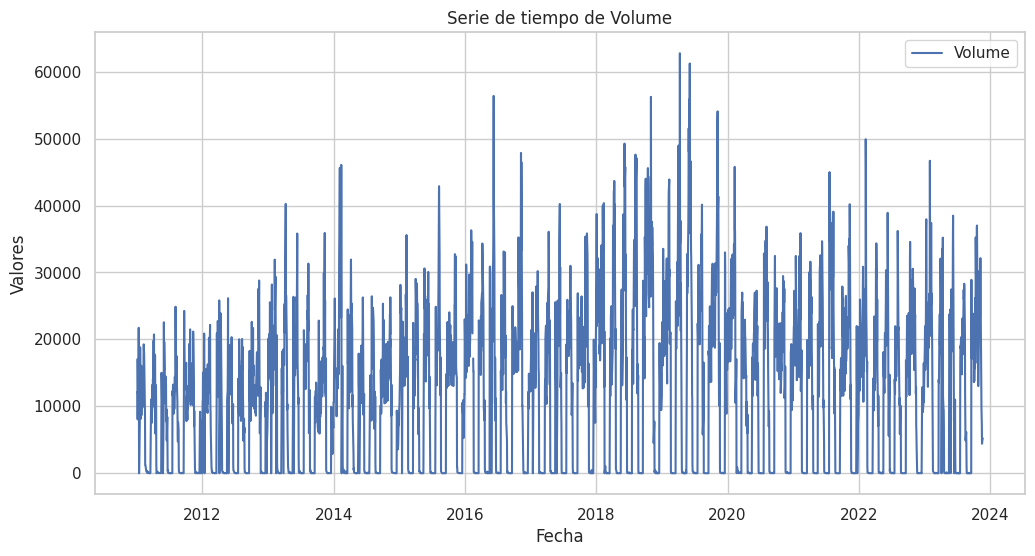

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.998986  0.999001  0.997828   0.997828 -0.147173
High       0.998986  1.000000  0.998527  0.998923   0.998923 -0.133321
Low        0.999001  0.998527  1.000000  0.998940   0.998940 -0.157320
Close      0.997828  0.998923  0.998940  1.000000   1.000000 -0.144985
Adj Close  0.997828  0.998923  0.998940  1.000000   1.000000 -0.144985
Volume    -0.147173 -0.133321 -0.157320 -0.144985  -0.144985  1.000000


In [ ]:
dfprecios2=dfprecios
dfprecios2['Date'] = pd.to_datetime(dfprecios2['Date'])
dfprecios2.set_index('Date', inplace=True)

for col in dfprecios2.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(12, 6))
    plt.plot(dfprecios2.index, dfprecios2[col], label=col)
    plt.title(f'Serie de tiempo de {col}')
    plt.xlabel('Fecha')
    plt.ylabel('Valores')
    plt.legend()
    plt.show()

correlation_matrix = dfprecios.corr()
print(correlation_matrix)

##### Debido a que hay valores en 0 en la columna volume y con un análisis empírico se determinó que esos días la bolsa estaba cerrada, por lo que se tendrán en cuenta pero solo para mantener la información de temperatura y como afecta en las aperturas. de resto no hay valores adicionales a limpiar

##### Debido a las altas correlaciones, solo se tomará la columna de close para los modelos

# GENERACION DE MODELOS

##### Dado que las bases ya se recopilaron, visualizaron y limpiaron, solo hace falta unir ambas, Solo se utilizaran las variables de lluvia, presion atmosferica temperatura de aire bulbo seco y minima temperatura, adicionalmente se hara un modelo arima para determinar el mejor lag de los valores sobre el precio del café


## Creación de 3 DF Finales, 1 sin Lag, el segundo con LAG de 6 meses, y el tercero con Lag de 12 mesees

In [7]:
import pandas as pd
dfprecios = pd.read_csv('KC=F.csv',  encoding='utf-8',decimal='.')


In [8]:
# volver columna Date en precios una fecha
dfprecios['Date'] = pd.to_datetime(dfprecios['Date'])
dfprecios.set_index('Date', inplace=True)

#Volver hora en super_df un tipo hora
super_df['TIME (UTC)'] = super_df['TIME (UTC)'].astype(str).str.zfill(6)

selected_columns = ['Formatted Name',
    'AIR TEMPERATURE - DRY BULB, HOURLY (°C)',
    'MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)',
    'TOTAL PRECIPITATION, HOURLY (mm)',
    'ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)'
]

# crear index datetime
super_df2 = super_df.copy()
super_df2['Datetime'] = pd.to_datetime(super_df2['DATE'] + ' ' + super_df2['TIME (UTC)'], errors='coerce')
super_df2.set_index('Datetime', inplace=True)

# CCrear super_df2 para evitar cargar tantas veces las mismas columnas
super_df2 = super_df2[selected_columns]

# Filtrar superdf entre las horas de la manana
super_df2 = super_df2.between_time('0:00', '7:00')

# Calcular promedio diario en las horas
city_averages = super_df2.groupby(['Formatted Name', super_df2.index.date]).mean().unstack(level=0)

# alinear las variables multiindex
city_averages.columns = [f'{col[0]}_{col[1]}' for col in city_averages.columns]

# calcular el promedio por hora de todas las ciudades
all_cities_daily_average = super_df2.groupby(super_df2.index.date).mean()

# Calcular el promedio de promedios
hourly_averages = super_df2.groupby([super_df2.index.hour, 'Formatted Name']).mean().unstack(level=1)

# alinear las variables multiindex de horas
hourly_averages.columns = [f'{col[0]}_{col[1]}' for col in hourly_averages.columns]
all_cities_hourly_average = hourly_averages.mean(axis=1, level=0)

# Convertor a un nuevo index
dfprecios.index = pd.to_datetime(dfprecios.index)

# Merge tla data
merged_df = pd.merge(dfprecios, all_cities_daily_average, left_index=True, right_index=True, how='left')



# visualizar
print(merged_df)




                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-01-04  239.000000  240.500000  232.000000  234.949997  234.949997   
2011-01-05  234.100006  237.899994  230.000000  233.000000  233.000000   
2011-01-06  233.600006  236.850006  232.100006  233.000000  233.000000   
2011-01-07  232.550003  235.500000  230.300003  230.699997  230.699997   
2011-01-10  231.199997  235.149994  230.550003  231.250000  231.250000   
...                ...         ...         ...         ...         ...   
2023-11-15  177.000000  181.899994  175.000000  180.800003  180.800003   
2023-11-16  181.500000  182.199997  175.699997  176.100006  176.100006   
2023-11-17  175.850006  176.850006  170.449997  170.949997  170.949997   
2023-11-20  171.649994  179.600006  170.000000  177.899994  177.899994   
2023-11-21  176.649994  177.899994  175.050003  176.550003  176.550003   

             Volume  AIR TEMPERATURE 

<ipython-input-8-639e14224c63>:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_cities_daily_average = super_df2.groupby(super_df2.index.date).mean()
<ipython-input-8-639e14224c63>:40: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  all_cities_hourly_average = hourly_averages.mean(axis=1, level=0)


### Utilizar información hasta octubre 2023

In [9]:
merged_df = merged_df[merged_df.index < '2023-11-01']
merged_df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-01-04  239.000000  240.500000  232.000000  234.949997  234.949997   
2011-01-05  234.100006  237.899994  230.000000  233.000000  233.000000   
2011-01-06  233.600006  236.850006  232.100006  233.000000  233.000000   
2011-01-07  232.550003  235.500000  230.300003  230.699997  230.699997   
2011-01-10  231.199997  235.149994  230.550003  231.250000  231.250000   
...                ...         ...         ...         ...         ...   
2023-10-25  167.750000  169.050003  160.949997  162.300003  162.300003   
2023-10-26  161.550003  163.600006  160.300003  161.199997  161.199997   
2023-10-27  161.199997  163.250000  160.199997  160.949997  160.949997   
2023-10-30  160.050003  161.149994  158.600006  159.100006  159.100006   
2023-10-31  159.050003  167.550003  158.800003  167.300003  167.300003   

             Volume  AIR TEMPERATURE - DRY BULB, HOURLY (°C)  \
Date                                                           
2011-01-04  17011.0                                20.826772   
2011-01-05  11361.0                                21.150000   
2011-01-06   8058.0                                20.969600   
2011-01-07  12255.0                                20.658268   
2011-01-10  10931.0                                20.459055   
...             ...                                      ...   
2023-10-25  30189.0                                22.531061   
2023-10-26  17692.0                                22.469925   
2023-10-27  13025.0                                21.617037   
2023-10-30  19461.0                                22.317164   
2023-10-31  29746.0                                22.953383   

            MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)  \
Date                                                              
2011-01-04                                          20.722835     
2011-01-05                                          21.025410     
2011-01-06                                          20.835200     
2011-01-07                                          20.546457     
2011-01-10                                          20.294488     
...                                                       ...     
2023-10-25                                          22.312879     
2023-10-26                                          22.280451     
2023-10-27                                          21.471111     
2023-10-30                                          22.123881     
2023-10-31                                          22.766917     

            TOTAL PRECIPITATION, HOURLY (mm)  \
Date                                           
2011-01-04                          0.584252   
2011-01-05                          0.629508   
2011-01-06                          0.257600   
2011-01-07                          0.776378   
2011-01-10                          0.015748   
...                                      ...   
2023-10-25                          0.143636   
2023-10-26                          0.065455   
2023-10-27                          0.971171   
2023-10-30                          0.344144   
2023-10-31                          0.941284   

            ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)  
Date                                                            
2011-01-04                                         927.851969   
2011-01-05                                         930.615574   
2011-01-06                                         932.816800   
2011-01-07                                         931.929921   
2011-01-10                                         929.606299   
...                                                       ...   
2023-10-25                                         928.417424   
2023-10-26                                         927.430075   
2023-10-27                                         929.574815   
2023-10-30

##### Eliminaremos las variables open, high y low debido a su alta correlacion

In [10]:
columns_to_drop = ['Open', 'High', 'Low']
merged_df = merged_df.drop(columns=columns_to_drop)
merged_df.dtypes

Close                                                  float64
Adj Close                                              float64
Volume                                                 float64
AIR TEMPERATURE - DRY BULB, HOURLY (°C)                float64
MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)    float64
TOTAL PRECIPITATION, HOURLY (mm)                       float64
ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)     float64
dtype: object

### Normalizar variables

In [11]:
from scipy.stats import zscore

# Guardar valores de media y desviacion estandar para la funcionalidad
means = merged_df.mean()
stds = merged_df.std()

# Normalizar Merged_df excepto la columna 'Close' con zscore
columns_to_normalize = merged_df.columns.difference(['Close'])
merged_df[columns_to_normalize] = (merged_df[columns_to_normalize] - means[columns_to_normalize]) / stds[columns_to_normalize]

# visualizar merged_df normalizado
print(merged_df)

# guardar valores para despues
means_and_stds = pd.DataFrame({'Mean': means, 'Std Dev': stds})

# imprimir tabla de means y std
print(means_and_stds)

                 Close  Adj Close    Volume  \
Date                                          
2011-01-04  234.949997   1.719640  0.427304   
2011-01-05  233.000000   1.677989 -0.055599   
2011-01-06  233.000000   1.677989 -0.337905   
2011-01-07  230.699997   1.628861  0.020811   
2011-01-10  231.250000   1.640609 -0.092351   
...                ...        ...       ...   
2023-10-25  162.300003   0.167848  1.553622   
2023-10-26  161.199997   0.144352  0.485509   
2023-10-27  160.949997   0.139012  0.086623   
2023-10-30  159.100006   0.099497  0.636704   
2023-10-31  167.300003   0.274647  1.515759   

            AIR TEMPERATURE - DRY BULB, HOURLY (°C)  \
Date                                                  
2011-01-04                                 0.675092   
2011-01-05                                 0.827015   
2011-01-06                                 0.742224   
2011-01-07                                 0.595892   
2011-01-10                                 0.502259   
...

#### Crear LAGS

In [12]:
#Lag 1 mes:
import pandas as pd


merged_df= merged_df.dropna()
merged_dftemp = merged_df.copy()

# lag 35 dias
merged_dftemp['lag'] = merged_dftemp.index + pd.DateOffset(days=35)
merged_dftemp.set_index('lag', inplace=True)
merged_dflag1 = merged_df['2011-02-05':]

columns_to_drop = ['AIR TEMPERATURE - DRY BULB, HOURLY (°C)',
                   'MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)',
                   'TOTAL PRECIPITATION, HOURLY (mm)',
                   'ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)']
print(merged_dftemp)
# drop columnas
merged_dflag1 = merged_dflag1.drop(columns=columns_to_drop)

selected_columns = ['AIR TEMPERATURE - DRY BULB, HOURLY (°C)',
                     'MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)',
                     'TOTAL PRECIPITATION, HOURLY (mm)',
                     'ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)']

# leftjoin
merged_dflag1 = pd.merge(merged_dflag1, merged_dftemp[selected_columns],
                        left_index=True, right_index=True, how='left', suffixes=('', '_lag'))

merged_dflag1= merged_dflag1.dropna()
merged_dflag1


                 Close  Adj Close    Volume  \
lag                                           
2011-02-08  234.949997   1.719640  0.427304   
2011-02-09  233.000000   1.677989 -0.055599   
2011-02-10  233.000000   1.677989 -0.337905   
2011-02-11  230.699997   1.628861  0.020811   
2011-02-14  231.250000   1.640609 -0.092351   
...                ...        ...       ...   
2023-11-29  162.300003   0.167848  1.553622   
2023-11-30  161.199997   0.144352  0.485509   
2023-12-01  160.949997   0.139012  0.086623   
2023-12-04  159.100006   0.099497  0.636704   
2023-12-05  167.300003   0.274647  1.515759   

            AIR TEMPERATURE - DRY BULB, HOURLY (°C)  \
lag                                                   
2011-02-08                                 0.675092   
2011-02-09                                 0.827015   
2011-02-10                                 0.742224   
2011-02-11                                 0.595892   
2011-02-14                                 0.502259   
...

Close  Adj Close    Volume  \
Date                                          
2011-02-08  247.600006   1.989842  0.495423   
2011-02-09  253.600006   2.118002  0.619354   
2011-02-10  255.600006   2.160721  0.536876   
2011-02-11  251.949997   2.082758  0.523372   
2011-02-14  258.649994   2.225868  0.019700   
...                ...        ...       ...   
2023-10-25  162.300003   0.167848  1.553622   
2023-10-26  161.199997   0.144352  0.485509   
2023-10-27  160.949997   0.139012  0.086623   
2023-10-30  159.100006   0.099497  0.636704   
2023-10-31  167.300003   0.274647  1.515759   

            AIR TEMPERATURE - DRY BULB, HOURLY (°C)  \
Date                                                  
2011-02-08                                 0.675092   
2011-02-09                                 0.827015   
2011-02-10                                 0.742224   
2011-02-11                                 0.595892   
2011-02-14                                 0.502259   
...                                             ...   
2023-10-25                                 0.868142   
2023-10-26                                 0.750805   
2023-10-27                                 1.099235   
2023-10-30                                 2.112947   
2023-10-31                                 2.303210   

            MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)  \
Date                                                              
2011-02-08                                           0.719598     
2011-02-09                                           0.860591     
2011-02-10                                           0.771958     
2011-02-11                                           0.637410     
2011-02-14                                           0.519998     
...                                                       ...     
2023-10-25                                           0.840337     
2023-10-26                                           0.747234     
2023-10-27                                           1.071384     
2023-10-30                                           2.058324     
2023-10-31                                           2.258333     

            TOTAL PRECIPITATION, HOURLY (mm)  \
Date                                           
2011-02-08                          2.035998   
2011-02-09                          2.243301   
2011-02-10                          0.539718   
2011-02-11                          2.916060   
2011-02-14                         -0.568122   
...                                      ...   
2023-10-25                         -0.113483   
2023-10-26                         -0.632559   
2023-10-27                         -0.640258   
2023-10-30                         -0.640258   
2023-10-31                         -0.640258   

            ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)  
Date                                                            
2011-02-08                                          -1.891359   
2011-02-09                                          -1.081695   
2011-02-10                                          -0.436793   
2011-02-11                                          -0.696625   
2011-02-14                                          -1.377386   
...                                                       ...   
2023-10-25                                           0.107611   
2023-10-26                                          -0.266558   
2023-10-27                                          -0.138975   
2023-10-30                                          -1.044787   
2023-10-31                                          -1.465868   

[3092 rows x 7 columns]

In [13]:
#Lag 6 meses:
import pandas as pd


merged_df= merged_df.dropna()
merged_dftemp = merged_df.copy()

# lag 6 meses
merged_dftemp['lag'] = merged_dftemp.index + pd.DateOffset(days=185)
merged_dftemp.set_index('lag', inplace=True)
merged_dflag6 = merged_df['2011-06-05':]

columns_to_drop = ['AIR TEMPERATURE - DRY BULB, HOURLY (°C)',
                   'MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)',
                   'TOTAL PRECIPITATION, HOURLY (mm)',
                   'ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)']
print(merged_dftemp)
# eliminar columnas
merged_dflag6 = merged_dflag6.drop(columns=columns_to_drop)

selected_columns = ['AIR TEMPERATURE - DRY BULB, HOURLY (°C)',
                     'MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)',
                     'TOTAL PRECIPITATION, HOURLY (mm)',
                     'ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)']

# left join
merged_dflag6 = pd.merge(merged_dflag6, merged_dftemp[selected_columns],
                        left_index=True, right_index=True, how='left', suffixes=('', '_lag'))

merged_dflag6= merged_dflag6.dropna()
merged_dflag6


                 Close  Adj Close    Volume  \
lag                                           
2011-07-08  234.949997   1.719640  0.427304   
2011-07-09  233.000000   1.677989 -0.055599   
2011-07-10  233.000000   1.677989 -0.337905   
2011-07-11  230.699997   1.628861  0.020811   
2011-07-14  231.250000   1.640609 -0.092351   
...                ...        ...       ...   
2024-04-27  162.300003   0.167848  1.553622   
2024-04-28  161.199997   0.144352  0.485509   
2024-04-29  160.949997   0.139012  0.086623   
2024-05-02  159.100006   0.099497  0.636704   
2024-05-03  167.300003   0.274647  1.515759   

            AIR TEMPERATURE - DRY BULB, HOURLY (°C)  \
lag                                                   
2011-07-08                                 0.675092   
2011-07-09                                 0.827015   
2011-07-10                                 0.742224   
2011-07-11                                 0.595892   
2011-07-14                                 0.502259   
...

Close  Adj Close    Volume  \
Date                                          
2011-07-08  263.149994   2.321988 -1.026618   
2011-07-11  257.899994   2.209849 -1.026618   
2011-07-14  257.350006   2.198101 -1.025507   
2011-07-15  252.550003   2.095574 -1.024994   
2011-07-18  248.199997   2.002658 -1.026105   
...                ...        ...       ...   
2023-10-20  165.250000   0.230859  2.136951   
2023-10-23  165.850006   0.243676  1.036787   
2023-10-26  161.199997   0.144352  0.485509   
2023-10-27  160.949997   0.139012  0.086623   
2023-10-30  159.100006   0.099497  0.636704   

            AIR TEMPERATURE - DRY BULB, HOURLY (°C)  \
Date                                                  
2011-07-08                                 0.675092   
2011-07-11                                 0.595892   
2011-07-14                                 0.502259   
2011-07-15                                 0.732087   
2011-07-18                                 0.797593   
...                                             ...   
2023-10-20                                 0.721952   
2023-10-23                                -1.005020   
2023-10-26                                -0.507353   
2023-10-27                                -0.356325   
2023-10-30                                 0.063235   

            MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)  \
Date                                                              
2011-07-08                                           0.719598     
2011-07-11                                           0.637410     
2011-07-14                                           0.519998     
2011-07-15                                           0.740145     
2011-07-18                                           0.842146     
...                                                       ...     
2023-10-20                                           0.713069     
2023-10-23                                          -1.007964     
2023-10-26                                          -0.467979     
2023-10-27                                          -0.340177     
2023-10-30                                           0.066182     

            TOTAL PRECIPITATION, HOURLY (mm)  \
Date                                           
2011-07-08                          2.035998   
2011-07-11                          2.916060   
2011-07-14                         -0.568122   
2011-07-15                          4.373213   
2011-07-18                          0.679836   
...                                      ...   
2023-10-20                          0.128637   
2023-10-23                         -0.558461   
2023-10-26                         -0.607539   
2023-10-27                         -0.518107   
2023-10-30                          0.642325   

            ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)  
Date                                                            
2011-07-08                                          -1.891359   
2011-07-11                                          -0.696625   
2011-07-14                                          -1.377386   
2011-07-15                                          -2.047535   
2011-07-18                                          -1.329633   
...                                                       ...   
2023-10-20                                          -1.916278   
2023-10-23                                           0.118167   
2023-10-26                                           0.653139   
2023-10-27                                           0.712516   
2023-10-30                                          -0.277994   

[1740 rows x 7 columns]

In [14]:
#lag 12 meses

merged_df= merged_df.dropna()
merged_dftemp = merged_df.copy()

# lag 12  meses
merged_dftemp['lag'] = merged_dftemp.index + pd.DateOffset(days=370)
merged_dftemp.set_index('lag', inplace=True)
merged_dflag12 = merged_df['2011-01-05':]

columns_to_drop = ['AIR TEMPERATURE - DRY BULB, HOURLY (°C)',
                   'MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)',
                   'TOTAL PRECIPITATION, HOURLY (mm)',
                   'ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)']
print(merged_dftemp)
# eliminar columnas
merged_dflag12 = merged_dflag12.drop(columns=columns_to_drop)

selected_columns = ['AIR TEMPERATURE - DRY BULB, HOURLY (°C)',
                     'MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)',
                     'TOTAL PRECIPITATION, HOURLY (mm)',
                     'ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)']

# left join
merged_dflag12 = pd.merge(merged_dflag12, merged_dftemp[selected_columns],
                        left_index=True, right_index=True, how='left', suffixes=('', '_lag'))

merged_dflag12= merged_dflag12.dropna()
merged_dflag12

                 Close  Adj Close    Volume  \
lag                                           
2012-01-09  234.949997   1.719640  0.427304   
2012-01-10  233.000000   1.677989 -0.055599   
2012-01-11  233.000000   1.677989 -0.337905   
2012-01-12  230.699997   1.628861  0.020811   
2012-01-15  231.250000   1.640609 -0.092351   
...                ...        ...       ...   
2024-10-29  162.300003   0.167848  1.553622   
2024-10-30  161.199997   0.144352  0.485509   
2024-10-31  160.949997   0.139012  0.086623   
2024-11-03  159.100006   0.099497  0.636704   
2024-11-04  167.300003   0.274647  1.515759   

            AIR TEMPERATURE - DRY BULB, HOURLY (°C)  \
lag                                                   
2012-01-09                                 0.675092   
2012-01-10                                 0.827015   
2012-01-11                                 0.742224   
2012-01-12                                 0.595892   
2012-01-15                                 0.502259   
...

Close  Adj Close    Volume  \
Date                                          
2012-01-09  221.850006   1.439827 -0.191752   
2012-01-10  225.949997   1.527402 -0.198076   
2012-01-11  234.899994   1.718572  0.756704   
2012-01-12  233.899994   1.697212  0.143374   
2012-01-17  225.149994   1.510314  0.182348   
...                ...        ...       ...   
2023-10-24  168.149994   0.292803  0.841319   
2023-10-25  162.300003   0.167848  1.553622   
2023-10-26  161.199997   0.144352  0.485509   
2023-10-30  159.100006   0.099497  0.636704   
2023-10-31  167.300003   0.274647  1.515759   

            AIR TEMPERATURE - DRY BULB, HOURLY (°C)  \
Date                                                  
2012-01-09                                 0.675092   
2012-01-10                                 0.827015   
2012-01-11                                 0.742224   
2012-01-12                                 0.595892   
2012-01-17                                 0.760185   
...                                             ...   
2023-10-24                                 0.613328   
2023-10-25                                 0.300190   
2023-10-26                                 0.642005   
2023-10-30                                 0.173753   
2023-10-31                                 0.118177   

            MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)  \
Date                                                              
2012-01-09                                           0.719598     
2012-01-10                                           0.860591     
2012-01-11                                           0.771958     
2012-01-12                                           0.637410     
2012-01-17                                           0.788319     
...                                                       ...     
2023-10-24                                           0.592309     
2023-10-25                                           0.319511     
2023-10-26                                           0.608256     
2023-10-30                                           0.202679     
2023-10-31                                           0.139079     

            TOTAL PRECIPITATION, HOURLY (mm)  \
Date                                           
2012-01-09                          2.035998   
2012-01-10                          2.243301   
2012-01-11                          0.539718   
2012-01-12                          2.916060   
2012-01-17                          8.993429   
...                                      ...   
2023-10-24                         -0.585654   
2023-10-25                         -0.415776   
2023-10-26                          1.222746   
2023-10-30                         -0.504076   
2023-10-31                         -0.627878   

            ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)  
Date                                                            
2012-01-09                                          -1.891359   
2012-01-10                                          -1.081695   
2012-01-11                                          -0.436793   
2012-01-12                                          -0.696625   
2012-01-17                                          -1.596902   
...                                                       ...   
2023-10-24                                          -0.059297   
2023-10-25                                          -0.698019   
2023-10-26                                          -1.514511   
2023-10-30                                          -0.988863   
2023-10-31                                          -1.212949   

[2325 rows x 7 columns]

## MODELOS

##### Dado que nuestro modelo de RN del taller 2 se ajustó muy bien a los datos, utilizaremos un codigo similar:

### Separar Train Test como serie de tiempo

In [15]:
merged_df= merged_df.dropna()

train_set = merged_df['2011':'2019']
test_set = merged_df['2020':'2023']

# shape

y_train = train_set['Close']
X_train = train_set.drop(columns=['Close','Adj Close'])
y_test = test_set['Close']
X_test = test_set.drop(columns=['Close','Adj Close'])



## RNN

### RNN Sin Lag

Epoch 1/50
71/71 [==============================] - 3s 24ms/step - loss: 24051.2363 - val_loss: 27677.3281
Epoch 2/50
71/71 [==============================] - 1s 21ms/step - loss: 17312.5879 - val_loss: 10815.0234
Epoch 3/50
71/71 [==============================] - 1s 21ms/step - loss: 5539.8472 - val_loss: 5447.5771
Epoch 4/50
71/71 [==============================] - 1s 20ms/step - loss: 4304.5732 - val_loss: 4592.5801
Epoch 5/50
71/71 [==============================] - 3s 48ms/step - loss: 3836.0027 - val_loss: 4270.6826
Epoch 6/50
71/71 [==============================] - 3s 48ms/step - loss: 3546.1218 - val_loss: 4126.1733
Epoch 7/50
71/71 [==============================] - 2s 23ms/step - loss: 3350.8931 - val_loss: 4063.6978
Epoch 8/50
71/71 [==============================] - 1s 20ms/step - loss: 3201.6096 - val_loss: 4048.1001
Epoch 9/50
71/71 [==============================] - 0s 7ms/step - loss: 3099.0486 - val_loss: 4101.9912
Epoch 10/50
71/71 [==============================] -

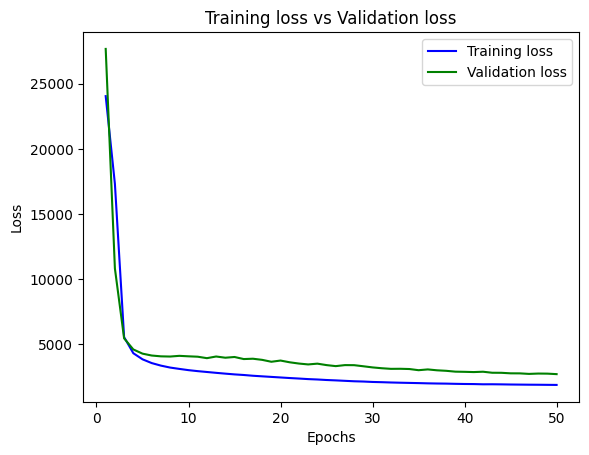

Mean Squared Error: 2696.74072265625


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint (se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint = ModelCheckpoint(filepath='/tmp/checkpoints', monitor='val_loss', mode='min', save_best_only=True)

# RNN model
model = Sequential()
model.add(Dense(16, activation=LeakyReLU(alpha=0.1), input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(64, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(128, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(256, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(512, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(1, activation='linear'))  # Activacion lineal
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')  #usar error para lineal

# entrenar
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[callback_early, callback_checkpoint])

# imprimir loss train y test
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(f"Mean Squared Error: {history.history['val_loss'][-1]}")



31/31 [==============================] - 0s 2ms/step


<ipython-input-64-79099a23367d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Predictions'] = predictions_test


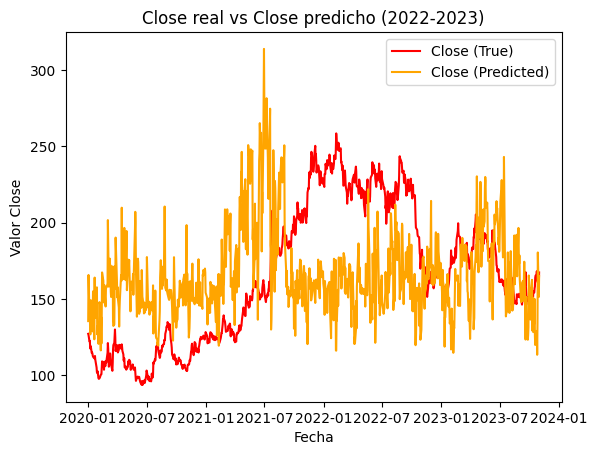

In [ ]:
# Predicciones de 2020 a 2023
predictions_test = model.predict(X_test)
test_set['Predictions'] = predictions_test

# imprimir test set solo el y_test
plt.plot(test_set.index, y_test, 'r', label='Close (True)')

# imprimir los valores predichos
plt.plot(test_set.index, predictions_test, 'orange', label='Close (Predicted)')

plt.title('Close real vs Close predicho (2022-2023)')
plt.xlabel('Fecha')
plt.ylabel('Valor Close')
plt.legend()
plt.show()

#### Corrida 2

Epoch 1/50
71/71 [==============================] - 6s 59ms/step - loss: 24251.0664 - val_loss: 28085.3828
Epoch 2/50
71/71 [==============================] - 3s 36ms/step - loss: 18970.5605 - val_loss: 11887.4297
Epoch 3/50
71/71 [==============================] - 2s 31ms/step - loss: 4866.9458 - val_loss: 5440.4565
Epoch 4/50
71/71 [==============================] - 2s 32ms/step - loss: 3650.5273 - val_loss: 5154.5527
Epoch 5/50
71/71 [==============================] - 2s 31ms/step - loss: 3472.3611 - val_loss: 4957.0850
Epoch 6/50
71/71 [==============================] - 2s 26ms/step - loss: 3330.7351 - val_loss: 4776.8345
Epoch 7/50
71/71 [==============================] - 3s 43ms/step - loss: 3212.5178 - val_loss: 4707.7305
Epoch 8/50
71/71 [==============================] - 1s 21ms/step - loss: 3090.1025 - val_loss: 4532.3052
Epoch 9/50
71/71 [==============================] - 3s 44ms/step - loss: 2988.7878 - val_loss: 4446.4204
Epoch 10/50
71/71 [==============================] 

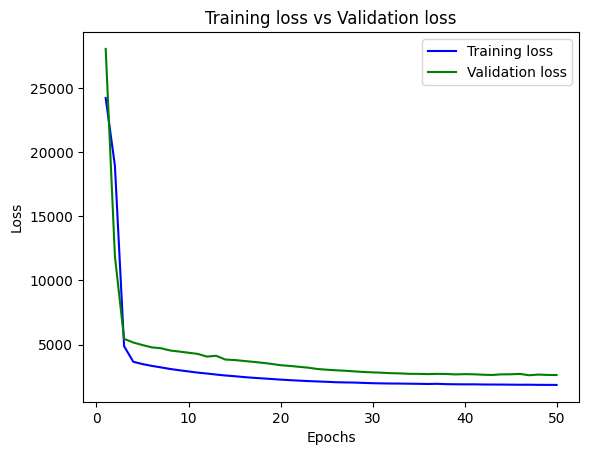

Mean Squared Error: 2613.771728515625


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint (se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint = ModelCheckpoint(filepath='/tmp/checkpoints', monitor='val_loss', mode='min', save_best_only=True)

# RNN model
model = Sequential()
model.add(Dense(16, activation=LeakyReLU(alpha=0.1), input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(64, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(128, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(256, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(512, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(1, activation='linear'))  # Activacion lineal
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')  #usar error para lineal

# entrenar
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[callback_early, callback_checkpoint])

# imprimir loss train y test
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(f"Mean Squared Error: {history.history['val_loss'][-1]}")



31/31 [==============================] - 0s 3ms/step


<ipython-input-78-47303dc3e122>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Predictions'] = predictions_test


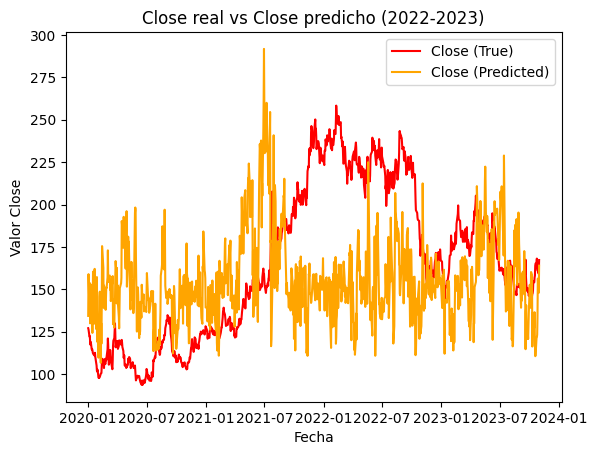

In [ ]:
# Predicciones de 2020 a 2023
predictions_test = model.predict(X_test)
test_set['Predictions'] = predictions_test

# imprimir test set solo el y_test
plt.plot(test_set.index, y_test, 'r', label='Close (True)')

# imprimir los valores predichos
plt.plot(test_set.index, predictions_test, 'orange', label='Close (Predicted)')

plt.title('Close real vs Close predicho (2022-2023)')
plt.xlabel('Fecha')
plt.ylabel('Valor Close')
plt.legend()
plt.show()

### RNN Con Lag 1 mes

Epoch 1/50
64/64 [==============================] - 8s 58ms/step - loss: 23428.9551 - val_loss: 24641.5039
Epoch 2/50
64/64 [==============================] - 2s 32ms/step - loss: 9522.1680 - val_loss: 5128.0918
Epoch 3/50
64/64 [==============================] - 2s 33ms/step - loss: 3941.7065 - val_loss: 4119.2446
Epoch 4/50
64/64 [==============================] - 2s 32ms/step - loss: 3340.5625 - val_loss: 3741.1184
Epoch 5/50
64/64 [==============================] - 2s 39ms/step - loss: 3030.9937 - val_loss: 3566.6130
Epoch 6/50
64/64 [==============================] - 4s 60ms/step - loss: 2815.3611 - val_loss: 3514.4082
Epoch 7/50
64/64 [==============================] - 2s 25ms/step - loss: 2668.1501 - val_loss: 3518.8296
Epoch 8/50
64/64 [==============================] - 2s 36ms/step - loss: 2553.6040 - val_loss: 3473.6831
Epoch 9/50
64/64 [==============================] - 1s 16ms/step - loss: 2441.7473 - val_loss: 3523.3752
Epoch 10/50
64/64 [==============================] - 

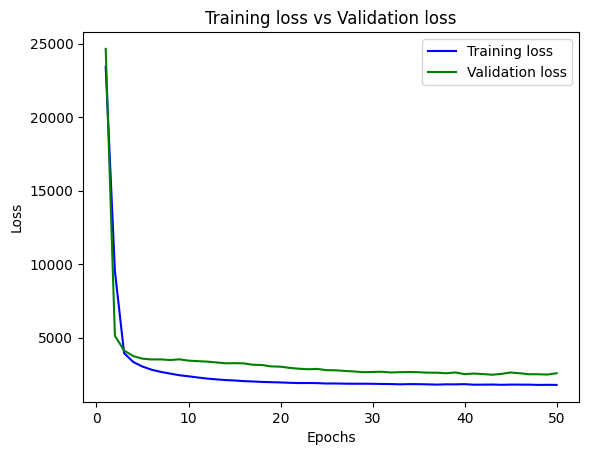

Mean Squared Error: 2577.744140625


In [ ]:
merged_dflag1= merged_dflag1.dropna()

train_set = merged_dflag1['2011':'2019']
test_set = merged_dflag1['2020':'2023']

# shape

y_train = train_set['Close']
X_train = train_set.drop(columns=['Close','Adj Close'])
y_test = test_set['Close']
X_test = test_set.drop(columns=['Close','Adj Close'])




from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint (se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint = ModelCheckpoint(filepath='/tmp/checkpoints', monitor='val_loss', mode='min', save_best_only=True)

# RNN model
model = Sequential()
model.add(Dense(16, activation=LeakyReLU(alpha=0.1), input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(64, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(128, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(256, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(512, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(1024, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(1, activation='linear'))  # Activacion lineal
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')  #usar error para lineal

# entrenar
history = model.fit(X_train, y_train, epochs=50, batch_size=34, validation_data=(X_test, y_test),
                    callbacks=[callback_early, callback_checkpoint])

# imprimir loss train y test
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(f"Mean Squared Error: {history.history['val_loss'][-1]}")


30/30 [==============================] - 0s 5ms/step


<ipython-input-75-79099a23367d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Predictions'] = predictions_test


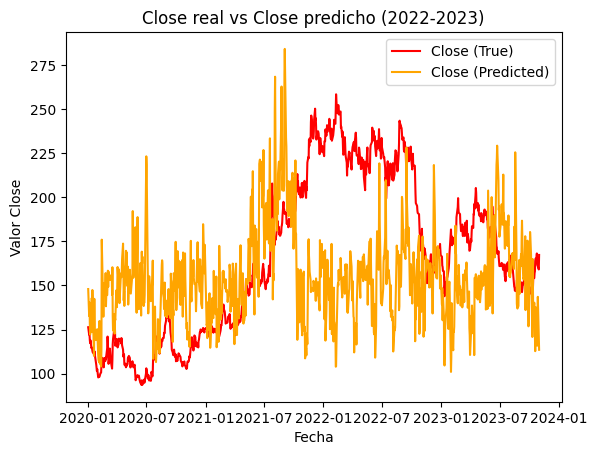

In [ ]:
# Predicciones de 2022 a 2023
predictions_test = model.predict(X_test)
test_set['Predictions'] = predictions_test

# imprimir test set solo el y_test
plt.plot(test_set.index, y_test, 'r', label='Close (True)')

# imprimir los valores predichos
plt.plot(test_set.index, predictions_test, 'orange', label='Close (Predicted)')

plt.title('Close real vs Close predicho (2022-2023)')
plt.xlabel('Fecha')
plt.ylabel('Valor Close')
plt.legend()
plt.show()

#### Corrida 2

Epoch 1/50
64/64 [==============================] - 7s 58ms/step - loss: 23199.8848 - val_loss: 23549.8125
Epoch 2/50
64/64 [==============================] - 3s 42ms/step - loss: 8773.2119 - val_loss: 4880.1016
Epoch 3/50
64/64 [==============================] - 2s 37ms/step - loss: 3852.0940 - val_loss: 4180.7158
Epoch 4/50
64/64 [==============================] - 3s 53ms/step - loss: 3483.6082 - val_loss: 3840.6929
Epoch 5/50
64/64 [==============================] - 14s 223ms/step - loss: 3257.4341 - val_loss: 3601.6621
Epoch 6/50
64/64 [==============================] - 4s 70ms/step - loss: 3080.5840 - val_loss: 3448.4866
Epoch 7/50
64/64 [==============================] - 5s 74ms/step - loss: 2931.7744 - val_loss: 3308.9937
Epoch 8/50
64/64 [==============================] - 3s 54ms/step - loss: 2808.1814 - val_loss: 3203.3469
Epoch 9/50
64/64 [==============================] - 2s 38ms/step - loss: 2691.7715 - val_loss: 3110.6338
Epoch 10/50
64/64 [==============================] 

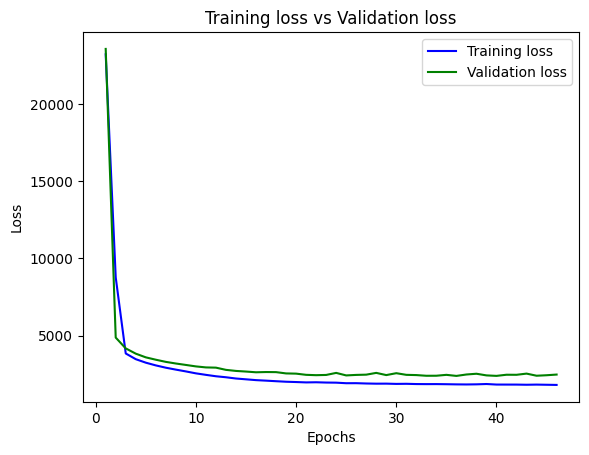

Mean Squared Error: 2488.018798828125


In [ ]:
merged_dflag1= merged_dflag1.dropna()

train_set = merged_dflag1['2011':'2019']
test_set = merged_dflag1['2020':'2023']

# shape

y_train = train_set['Close']
X_train = train_set.drop(columns=['Close','Adj Close'])
y_test = test_set['Close']
X_test = test_set.drop(columns=['Close','Adj Close'])




from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint (se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint = ModelCheckpoint(filepath='/tmp/checkpoints', monitor='val_loss', mode='min', save_best_only=True)

# RNN model
model = Sequential()
model.add(Dense(16, activation=LeakyReLU(alpha=0.1), input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(64, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(128, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(256, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(512, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(1024, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(1, activation='linear'))  # Activacion lineal
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')  #usar error para lineal

# entrenar
history = model.fit(X_train, y_train, epochs=50, batch_size=34, validation_data=(X_test, y_test),
                    callbacks=[callback_early, callback_checkpoint])

# imprimir loss train y test
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(f"Mean Squared Error: {history.history['val_loss'][-1]}")


30/30 [==============================] - 0s 5ms/step


<ipython-input-80-79099a23367d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Predictions'] = predictions_test


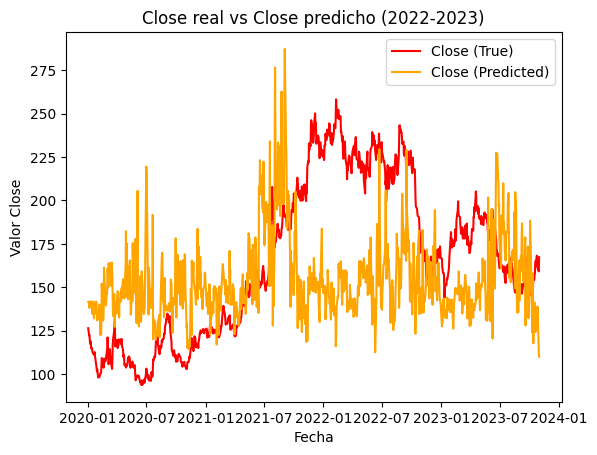

In [ ]:
# Predicciones de 2022 a 2023
predictions_test = model.predict(X_test)
test_set['Predictions'] = predictions_test

# imprimir test set solo el y_test
plt.plot(test_set.index, y_test, 'r', label='Close (True)')

# imprimir los valores predichos
plt.plot(test_set.index, predictions_test, 'orange', label='Close (Predicted)')

plt.title('Close real vs Close predicho (2022-2023)')
plt.xlabel('Fecha')
plt.ylabel('Valor Close')
plt.legend()
plt.show()

### RNN Lag 6 meses

Epoch 1/50
36/36 [==============================] - 5s 76ms/step - loss: 21558.0176 - val_loss: 28604.4199
Epoch 2/50
36/36 [==============================] - 2s 58ms/step - loss: 18951.7402 - val_loss: 21108.7754
Epoch 3/50
36/36 [==============================] - 2s 58ms/step - loss: 8425.9336 - val_loss: 6790.9106
Epoch 4/50
36/36 [==============================] - 2s 47ms/step - loss: 4687.1304 - val_loss: 5234.5444
Epoch 5/50
36/36 [==============================] - 2s 46ms/step - loss: 3394.2483 - val_loss: 3792.7478
Epoch 6/50
36/36 [==============================] - 2s 46ms/step - loss: 2700.6187 - val_loss: 2929.6870
Epoch 7/50
36/36 [==============================] - 2s 45ms/step - loss: 2349.8965 - val_loss: 2593.3962
Epoch 8/50
36/36 [==============================] - 2s 62ms/step - loss: 2172.3779 - val_loss: 2341.8992
Epoch 9/50
36/36 [==============================] - 1s 23ms/step - loss: 2063.2793 - val_loss: 2352.6790
Epoch 10/50
36/36 [==============================] 

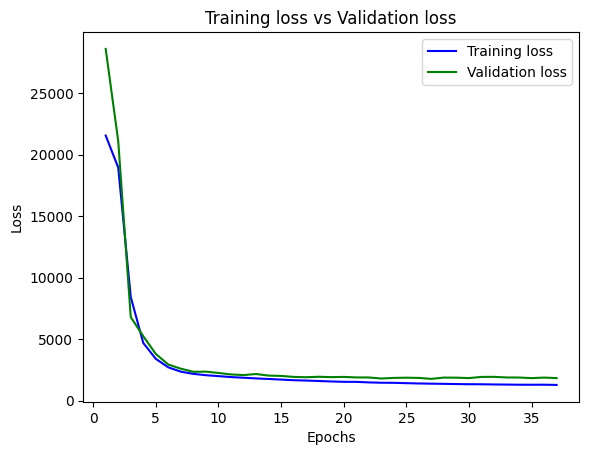

Mean Squared Error: 1827.111083984375


In [39]:
merged_dflag6= merged_dflag6.dropna()

train_set = merged_dflag6['2011':'2019']
test_set = merged_dflag6['2020':'2023']

# shape

y_train = train_set['Close']
X_train = train_set.drop(columns=['Close','Adj Close'])
y_test = test_set['Close']
X_test = test_set.drop(columns=['Close','Adj Close'])




from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint (se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint = ModelCheckpoint(filepath='/tmp/checkpoints', monitor='val_loss', mode='min', save_best_only=True)

# RNN model
model = Sequential()
model.add(Dense(16, activation=LeakyReLU(alpha=0.1), input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(64, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(128, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(256, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(512, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(1024, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(1, activation='linear'))  # Activacion lineal
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')  #usar error para lineal

# entrenar
history = model.fit(X_train, y_train, epochs=50, batch_size=34, validation_data=(X_test, y_test),
                    callbacks=[callback_early, callback_checkpoint])

# imprimir loss train y test
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(f"Mean Squared Error: {history.history['val_loss'][-1]}")

17/17 [==============================] - 0s 4ms/step


<ipython-input-40-843517547d84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Predictions'] = predictions_test


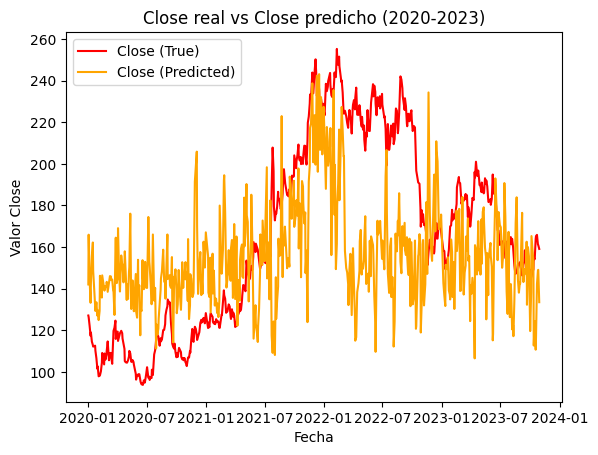

In [40]:
# Predicciones de 2021 a 2023
predictions_test = model.predict(X_test)
test_set['Predictions'] = predictions_test

# imprimir test set solo el y_test
plt.plot(test_set.index, y_test, 'r', label='Close (True)')

# imprimir los valores predichos
plt.plot(test_set.index, predictions_test, 'orange', label='Close (Predicted)')

plt.title('Close real vs Close predicho (2020-2023)')
plt.xlabel('Fecha')
plt.ylabel('Valor Close')
plt.legend()
plt.show()

#### Corrida 2

Epoch 1/50
36/36 [==============================] - 3s 51ms/step - loss: 21456.8848 - val_loss: 28121.3340
Epoch 2/50
36/36 [==============================] - 2s 62ms/step - loss: 18011.0957 - val_loss: 17542.5352
Epoch 3/50
36/36 [==============================] - 3s 87ms/step - loss: 6154.3857 - val_loss: 4440.2715
Epoch 4/50
36/36 [==============================] - 1s 23ms/step - loss: 3883.3508 - val_loss: 4528.9082
Epoch 5/50
36/36 [==============================] - 1s 19ms/step - loss: 3511.9370 - val_loss: 4557.0347
Epoch 6/50
36/36 [==============================] - 2s 56ms/step - loss: 3317.9097 - val_loss: 4284.4004
Epoch 7/50
36/36 [==============================] - 2s 47ms/step - loss: 3148.3025 - val_loss: 4048.9451
Epoch 8/50
36/36 [==============================] - 2s 45ms/step - loss: 2991.5923 - val_loss: 3939.7227
Epoch 9/50
36/36 [==============================] - 2s 47ms/step - loss: 2849.2512 - val_loss: 3675.8511
Epoch 10/50
36/36 [==============================] 

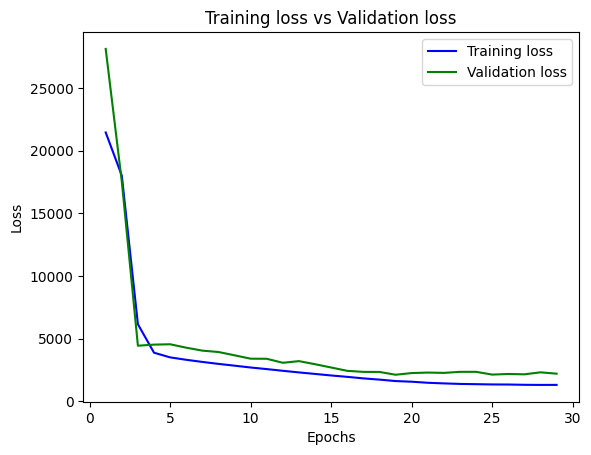

Mean Squared Error: 2210.1533203125


In [42]:
merged_dflag6= merged_dflag6.dropna()

train_set = merged_dflag6['2011':'2019']
test_set = merged_dflag6['2020':'2023']

# shape

y_train = train_set['Close']
X_train = train_set.drop(columns=['Close','Adj Close'])
y_test = test_set['Close']
X_test = test_set.drop(columns=['Close','Adj Close'])




from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint (se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint = ModelCheckpoint(filepath='/tmp/checkpoints', monitor='val_loss', mode='min', save_best_only=True)

# RNN model
model = Sequential()
model.add(Dense(16, activation=LeakyReLU(alpha=0.1), input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(64, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(128, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(256, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(512, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(1024, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(1, activation='linear'))  # Activacion lineal
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')  #usar error para lineal

# entrenar
history = model.fit(X_train, y_train, epochs=50, batch_size=34, validation_data=(X_test, y_test),
                    callbacks=[callback_early, callback_checkpoint])

# imprimir loss train y test
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(f"Mean Squared Error: {history.history['val_loss'][-1]}")

17/17 [==============================] - 0s 5ms/step


<ipython-input-43-0853497eaffb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Predictions'] = predictions_test


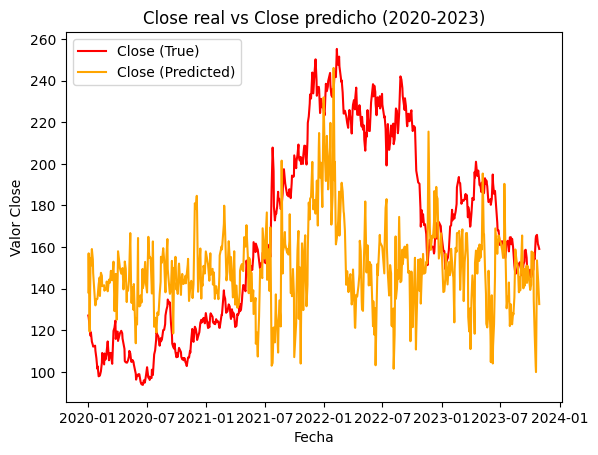

In [43]:
# Predicciones de 2020 a 2023
predictions_test = model.predict(X_test)
test_set['Predictions'] = predictions_test

# imprimir test set solo el y_test
plt.plot(test_set.index, y_test, 'r', label='Close (True)')

# imprimir los valores predichos
plt.plot(test_set.index, predictions_test, 'orange', label='Close (Predicted)')

plt.title('Close real vs Close predicho (2020-2023)')
plt.xlabel('Fecha')
plt.ylabel('Valor Close')
plt.legend()
plt.show()

### RNN Lag 12 meses

Epoch 1/50
47/47 [==============================] - 3s 45ms/step - loss: 19214.6426 - val_loss: 27885.9707
Epoch 2/50
47/47 [==============================] - 2s 39ms/step - loss: 12655.2793 - val_loss: 8393.1309
Epoch 3/50
47/47 [==============================] - 2s 43ms/step - loss: 2822.1890 - val_loss: 5418.1626
Epoch 4/50
47/47 [==============================] - 3s 57ms/step - loss: 2317.0823 - val_loss: 4537.9702
Epoch 5/50
47/47 [==============================] - 3s 57ms/step - loss: 2109.3604 - val_loss: 4384.8198
Epoch 6/50
47/47 [==============================] - 3s 55ms/step - loss: 1942.4985 - val_loss: 3749.0327
Epoch 7/50
47/47 [==============================] - 2s 38ms/step - loss: 1813.4491 - val_loss: 3706.6108
Epoch 8/50
47/47 [==============================] - 2s 39ms/step - loss: 1683.2446 - val_loss: 3363.4673
Epoch 9/50
47/47 [==============================] - 2s 39ms/step - loss: 1575.9355 - val_loss: 3058.8220
Epoch 10/50
47/47 [==============================] -

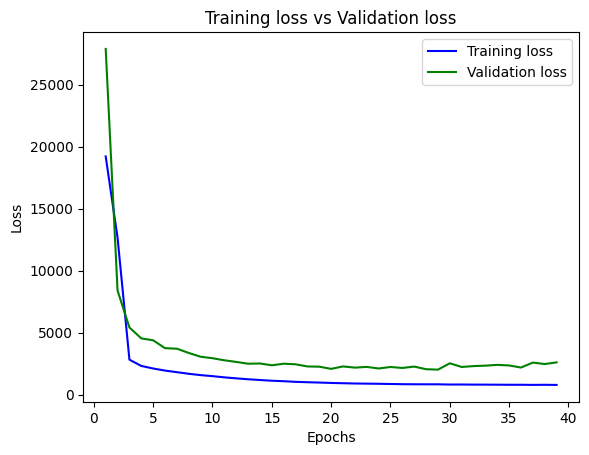

Mean Squared Error: 2604.48046875


In [37]:
merged_dflag12= merged_dflag12.dropna()

train_set = merged_dflag12['2011':'2019']
test_set = merged_dflag12['2020':'2023']

# shape

y_train = train_set['Close']
X_train = train_set.drop(columns=['Close','Adj Close'])
y_test = test_set['Close']
X_test = test_set.drop(columns=['Close','Adj Close'])




from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint (se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint = ModelCheckpoint(filepath='/tmp/checkpoints', monitor='val_loss', mode='min', save_best_only=True)

# RNN model
model = Sequential()
model.add(Dense(16, activation=LeakyReLU(alpha=0.1), input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(64, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(128, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(256, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(512, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(1024, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(1, activation='linear'))  # Activacion lineal
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')  #usar error para lineal

# entrenar
history = model.fit(X_train, y_train, epochs=50, batch_size=34, validation_data=(X_test, y_test),
                    callbacks=[callback_early, callback_checkpoint])

# imprimir loss train y test
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(f"Mean Squared Error: {history.history['val_loss'][-1]}")

24/24 [==============================] - 0s 5ms/step


<ipython-input-38-1811536bcb65>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Predictions'] = predictions_test


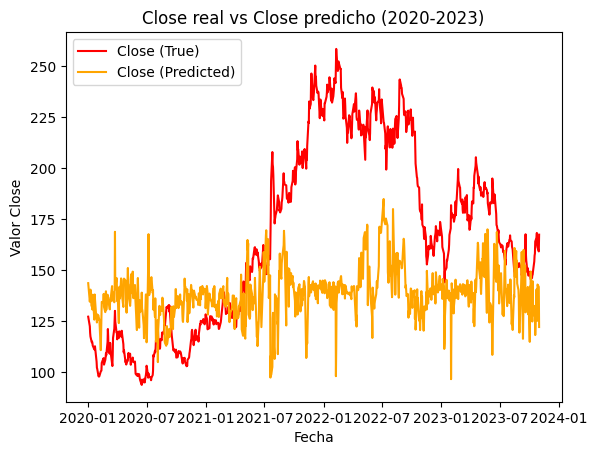

In [38]:
# Predicciones de 2022 a 2023
predictions_test = model.predict(X_test)
test_set['Predictions'] = predictions_test

# imprimir test set solo el y_test
plt.plot(test_set.index, y_test, 'r', label='Close (True)')

# imprimir los valores predichos
plt.plot(test_set.index, predictions_test, 'orange', label='Close (Predicted)')

plt.title('Close real vs Close predicho (2020-2023)')
plt.xlabel('Fecha')
plt.ylabel('Valor Close')
plt.legend()
plt.show()

#### Corrida 2

Epoch 1/50
36/36 [==============================] - 4s 66ms/step - loss: 21552.8652 - val_loss: 28386.2598
Epoch 2/50
36/36 [==============================] - 2s 65ms/step - loss: 19114.1973 - val_loss: 19712.5547
Epoch 3/50
36/36 [==============================] - 2s 49ms/step - loss: 7597.8315 - val_loss: 3790.8398
Epoch 4/50
36/36 [==============================] - 2s 47ms/step - loss: 3332.7839 - val_loss: 3510.2544
Epoch 5/50
36/36 [==============================] - 2s 59ms/step - loss: 2811.1479 - val_loss: 3323.3110
Epoch 6/50
36/36 [==============================] - 1s 27ms/step - loss: 2623.1575 - val_loss: 3406.6990
Epoch 7/50
36/36 [==============================] - 5s 134ms/step - loss: 2484.1394 - val_loss: 3044.6145
Epoch 8/50
36/36 [==============================] - 4s 124ms/step - loss: 2393.4795 - val_loss: 3012.1226
Epoch 9/50
36/36 [==============================] - 2s 46ms/step - loss: 2289.0066 - val_loss: 2883.0071
Epoch 10/50
36/36 [==============================

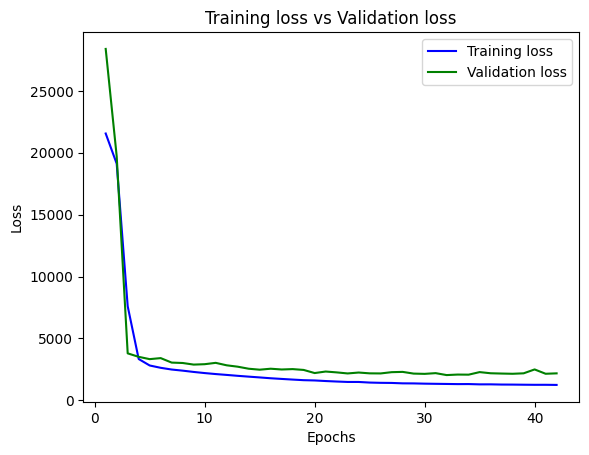

Mean Squared Error: 2175.0068359375


In [ ]:
merged_dflag12= merged_dflag12.dropna()

train_set = merged_dflag12['2011':'2019']
test_set = merged_dflag12['2020':'2023']

# shape

y_train = train_set['Close']
X_train = train_set.drop(columns=['Close','Adj Close'])
y_test = test_set['Close']
X_test = test_set.drop(columns=['Close','Adj Close'])




from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint (se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint = ModelCheckpoint(filepath='/tmp/checkpoints', monitor='val_loss', mode='min', save_best_only=True)

# RNN model
model = Sequential()
model.add(Dense(16, activation=LeakyReLU(alpha=0.1), input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(64, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(128, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(256, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(512, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(1024, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(1, activation='linear'))  # Activacion lineal
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')  #usar error para lineal

# entrenar
history = model.fit(X_train, y_train, epochs=50, batch_size=34, validation_data=(X_test, y_test),
                    callbacks=[callback_early, callback_checkpoint])

# imprimir loss train y test
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(f"Mean Squared Error: {history.history['val_loss'][-1]}")

17/17 [==============================] - 0s 3ms/step


<ipython-input-98-79099a23367d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Predictions'] = predictions_test


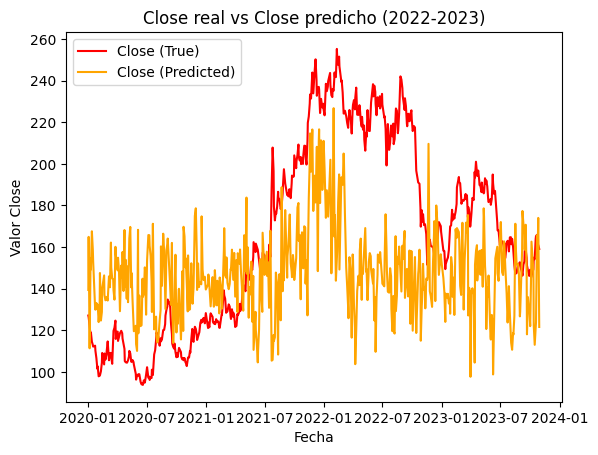

In [ ]:
# Predicciones de 2022 a 2023
predictions_test = model.predict(X_test)
test_set['Predictions'] = predictions_test

# imprimir test set solo el y_test
plt.plot(test_set.index, y_test, 'r', label='Close (True)')

# imprimir los valores predichos
plt.plot(test_set.index, predictions_test, 'orange', label='Close (Predicted)')

plt.title('Close real vs Close predicho (2020-2023)')
plt.xlabel('Fecha')
plt.ylabel('Valor Close')
plt.legend()
plt.show()

##### Debido a que el modelo con LAG de 12 meses fue el que produjo mejores resultados y menor RMSE, se ajustaran algunos hiperparametros para mejorar el modelo

### RN Lag 6meses TanH

Epoch 1/50
36/36 [==============================] - 7s 126ms/step - loss: 21510.4883 - val_loss: 29844.5605
Epoch 2/50
36/36 [==============================] - 1s 31ms/step - loss: 19535.1543 - val_loss: 30338.8398
Epoch 3/50
36/36 [==============================] - 5s 140ms/step - loss: 15094.5576 - val_loss: 26106.1699
Epoch 4/50
36/36 [==============================] - 5s 135ms/step - loss: 10556.3662 - val_loss: 16089.7500
Epoch 5/50
36/36 [==============================] - 5s 130ms/step - loss: 8196.5098 - val_loss: 12734.4023
Epoch 6/50
36/36 [==============================] - 4s 123ms/step - loss: 7250.1968 - val_loss: 11497.4062
Epoch 7/50
36/36 [==============================] - 5s 127ms/step - loss: 6560.1260 - val_loss: 10595.1582
Epoch 8/50
36/36 [==============================] - 4s 125ms/step - loss: 5977.5298 - val_loss: 9846.3467
Epoch 9/50
36/36 [==============================] - 3s 86ms/step - loss: 5473.2041 - val_loss: 9173.9473
Epoch 10/50
36/36 [==================

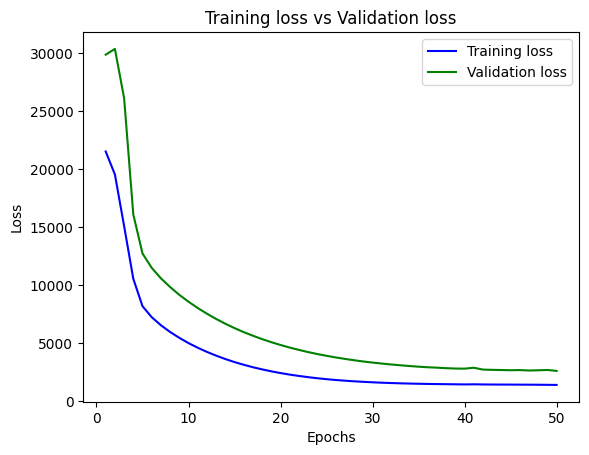

Mean Squarred Error: 2627.712158203125


In [44]:
merged_dflag6 = merged_dflag6.dropna()

train_set = merged_dflag6['2011':'2019']
test_set = merged_dflag6['2020':'2023']

# shape

y_train = train_set['Close']
X_train = train_set.drop(columns=['Close', 'Adj Close'])
y_test = test_set['Close']
X_test = test_set.drop(columns=['Close', 'Adj Close'])

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint (se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint = ModelCheckpoint(filepath='/tmp/checkpoints', monitor='val_loss', mode='min', save_best_only=True)

# RNN model
model = Sequential()
model.add(Dense(16, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(256, activation='tanh'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(1024, activation='tanh'))
model.add(Dense(1, activation='linear'))  # Activacion lineal
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')  # usar error para lineal

# entrenar
history = model.fit(X_train, y_train, epochs=50, batch_size=34, validation_data=(X_test, y_test),
                    callbacks=[callback_early, callback_checkpoint])

# imprimir loss train y test
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(f"Mean Squarred Error: {history.history['val_loss'][-1]}")


17/17 [==============================] - 0s 3ms/step


<ipython-input-45-79099a23367d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Predictions'] = predictions_test


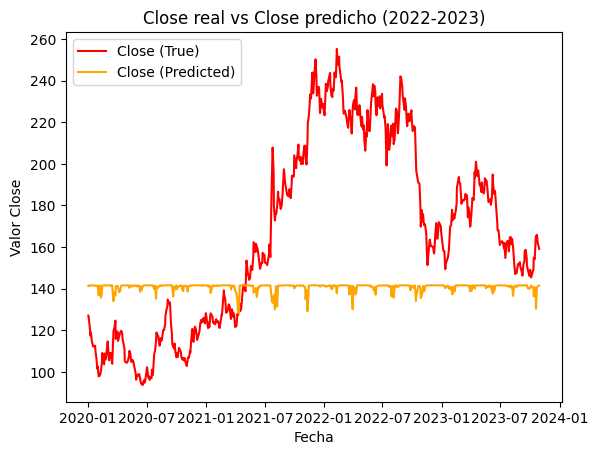

In [45]:
# Predicciones de 2022 a 2023
predictions_test = model.predict(X_test)
test_set['Predictions'] = predictions_test

# imprimir test set solo el y_test
plt.plot(test_set.index, y_test, 'r', label='Close (True)')

# imprimir los valores predichos
plt.plot(test_set.index, predictions_test, 'orange', label='Close (Predicted)')

plt.title('Close real vs Close predicho (2022-2023)')
plt.xlabel('Fecha')
plt.ylabel('Valor Close')
plt.legend()
plt.show()

##### Resultados pobres, se probará ReLu normal

### RN Lag con Relu

Epoch 1/50
36/36 [==============================] - 3s 49ms/step - loss: 21464.5664 - val_loss: 28130.7637
Epoch 2/50
36/36 [==============================] - 3s 86ms/step - loss: 18303.7344 - val_loss: 18000.0781
Epoch 3/50
36/36 [==============================] - 2s 67ms/step - loss: 7624.2529 - val_loss: 5495.3071
Epoch 4/50
36/36 [==============================] - 2s 66ms/step - loss: 4734.6631 - val_loss: 4494.4038
Epoch 5/50
36/36 [==============================] - 2s 53ms/step - loss: 3766.3445 - val_loss: 3759.5574
Epoch 6/50
36/36 [==============================] - 1s 14ms/step - loss: 3182.4236 - val_loss: 3794.3601
Epoch 7/50
36/36 [==============================] - 2s 44ms/step - loss: 2870.2166 - val_loss: 3136.3955
Epoch 8/50
36/36 [==============================] - 1s 14ms/step - loss: 2659.4167 - val_loss: 3315.4211
Epoch 9/50
36/36 [==============================] - 2s 58ms/step - loss: 2504.8345 - val_loss: 2926.6262
Epoch 10/50
36/36 [==============================] 

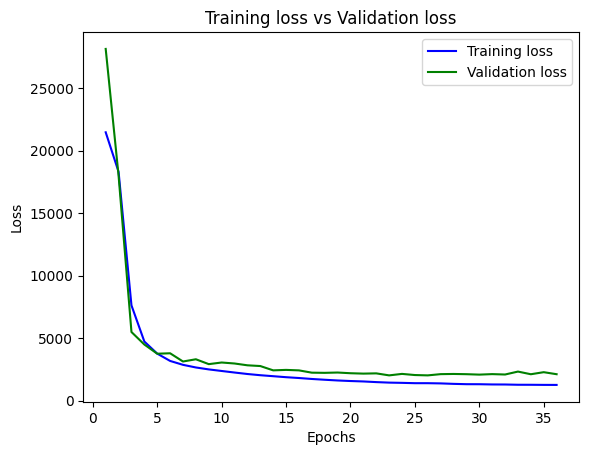

Mean Squarred Error: 2120.16064453125


In [46]:
merged_dflag6 = merged_dflag6.dropna()

train_set = merged_dflag6['2011':'2019']
test_set = merged_dflag6['2020':'2023']

# shape

y_train = train_set['Close']
X_train = train_set.drop(columns=['Close', 'Adj Close'])
y_test = test_set['Close']
X_test = test_set.drop(columns=['Close', 'Adj Close'])

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint (se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint = ModelCheckpoint(filepath='/tmp/checkpoints', monitor='val_loss', mode='min', save_best_only=True)

# RNN model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='linear'))  # Activacion lineal
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')  # usar error para lineal

# entrenar
history = model.fit(X_train, y_train, epochs=50, batch_size=34, validation_data=(X_test, y_test),
                    callbacks=[callback_early, callback_checkpoint])

# imprimir loss train y test
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(f"Mean Squarred Error: {history.history['val_loss'][-1]}")


17/17 [==============================] - 0s 3ms/step


<ipython-input-47-0853497eaffb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Predictions'] = predictions_test


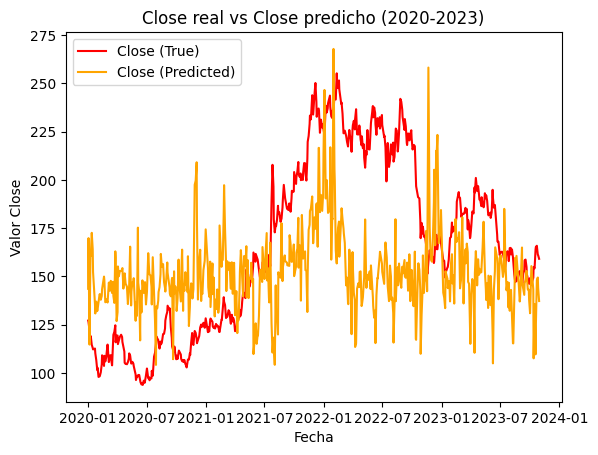

In [47]:
# Predicciones de 2020 a 2023
predictions_test = model.predict(X_test)
test_set['Predictions'] = predictions_test

# imprimir test set solo el y_test
plt.plot(test_set.index, y_test, 'r', label='Close (True)')

# imprimir los valores predichos
plt.plot(test_set.index, predictions_test, 'orange', label='Close (Predicted)')

plt.title('Close real vs Close predicho (2020-2023)')
plt.xlabel('Fecha')
plt.ylabel('Valor Close')
plt.legend()
plt.show()

### RNN con Lag 6 LeakyReLu y alpha 0.01 y learning rate 0.01

Epoch 1/50
36/36 [==============================] - 3s 50ms/step - loss: 13771.7998 - val_loss: 2137.6711
Epoch 2/50
36/36 [==============================] - 1s 15ms/step - loss: 1495.3390 - val_loss: 3735.0361
Epoch 3/50
36/36 [==============================] - 1s 15ms/step - loss: 1403.1552 - val_loss: 3268.1338
Epoch 4/50
36/36 [==============================] - 1s 15ms/step - loss: 1309.7371 - val_loss: 3041.6753
Epoch 5/50
36/36 [==============================] - 1s 15ms/step - loss: 1358.6029 - val_loss: 2333.6599
Epoch 6/50
36/36 [==============================] - 1s 15ms/step - loss: 1357.9149 - val_loss: 2573.6541
Epoch 7/50
36/36 [==============================] - 1s 14ms/step - loss: 1267.1475 - val_loss: 3188.9751
Epoch 8/50
36/36 [==============================] - 1s 15ms/step - loss: 1339.6063 - val_loss: 3584.9780
Epoch 9/50
36/36 [==============================] - 1s 14ms/step - loss: 1362.6364 - val_loss: 3119.0237
Epoch 10/50
36/36 [==============================] - 1

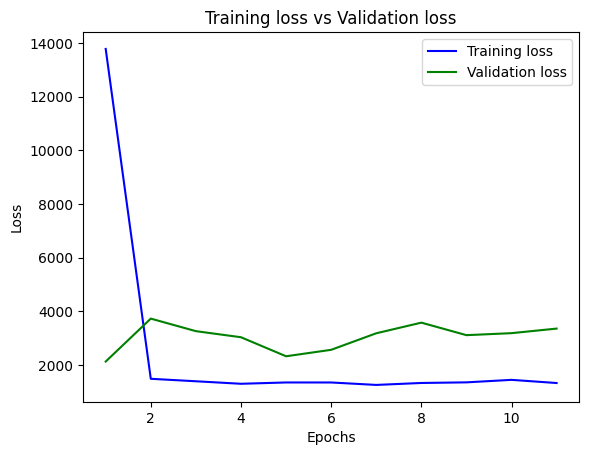

Mean Squared Error: 3363.753173828125


In [48]:
merged_dflag6= merged_dflag6.dropna()

train_set = merged_dflag6['2011':'2019']
test_set = merged_dflag6['2020':'2023']

# shape

y_train = train_set['Close']
X_train = train_set.drop(columns=['Close','Adj Close'])
y_test = test_set['Close']
X_test = test_set.drop(columns=['Close','Adj Close'])




from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint (se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint = ModelCheckpoint(filepath='/tmp/checkpoints', monitor='val_loss', mode='min', save_best_only=True)

# RNN model
model = Sequential()
model.add(Dense(16, activation=LeakyReLU(alpha=0.01), input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation=LeakyReLU(alpha=0.01)))
model.add(Dense(64, activation=LeakyReLU(alpha=0.01)))
model.add(Dense(128, activation=LeakyReLU(alpha=0.01)))
model.add(Dense(256, activation=LeakyReLU(alpha=0.01)))
model.add(Dense(512, activation=LeakyReLU(alpha=0.01)))
model.add(Dense(1024, activation=LeakyReLU(alpha=0.01)))
model.add(Dense(1, activation='linear'))  # Activacion lineal
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')  #usar error para lineal

# entrenar
history = model.fit(X_train, y_train, epochs=50, batch_size=34, validation_data=(X_test, y_test),
                    callbacks=[callback_early, callback_checkpoint])

# imprimir loss train y test
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(f"Mean Squared Error: {history.history['val_loss'][-1]}")


17/17 [==============================] - 0s 5ms/step


<ipython-input-49-0853497eaffb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Predictions'] = predictions_test


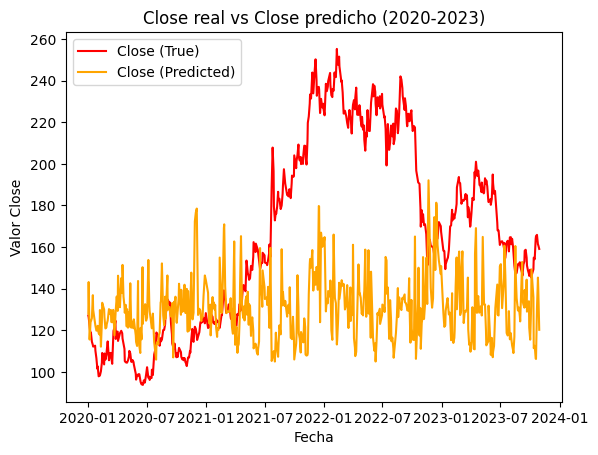

In [49]:
# Predicciones de 2020 a 2023
predictions_test = model.predict(X_test)
test_set['Predictions'] = predictions_test

# imprimir test set solo el y_test
plt.plot(test_set.index, y_test, 'r', label='Close (True)')

# imprimir los valores predichos
plt.plot(test_set.index, predictions_test, 'orange', label='Close (Predicted)')

plt.title('Close real vs Close predicho (2020-2023)')
plt.xlabel('Fecha')
plt.ylabel('Valor Close')
plt.legend()
plt.show()

##### Debido a que no hay mejoras considerables, utilizaaremos otros modelos

## XGboost

### XGBoost 1000 arboles learning rate=0.001

In [50]:
merged_dflag6= merged_dflag6.dropna()
train_set = merged_dflag6['2011':'2019']
test_set = merged_dflag6['2020':'2023']

# shape

y_train = train_set['Close']
X_train = train_set.drop(columns=['Close','Adj Close'])
y_test = test_set['Close']
X_test = test_set.drop(columns=['Close','Adj Close'])



Test Mean Squared Error: 2507.767638822407


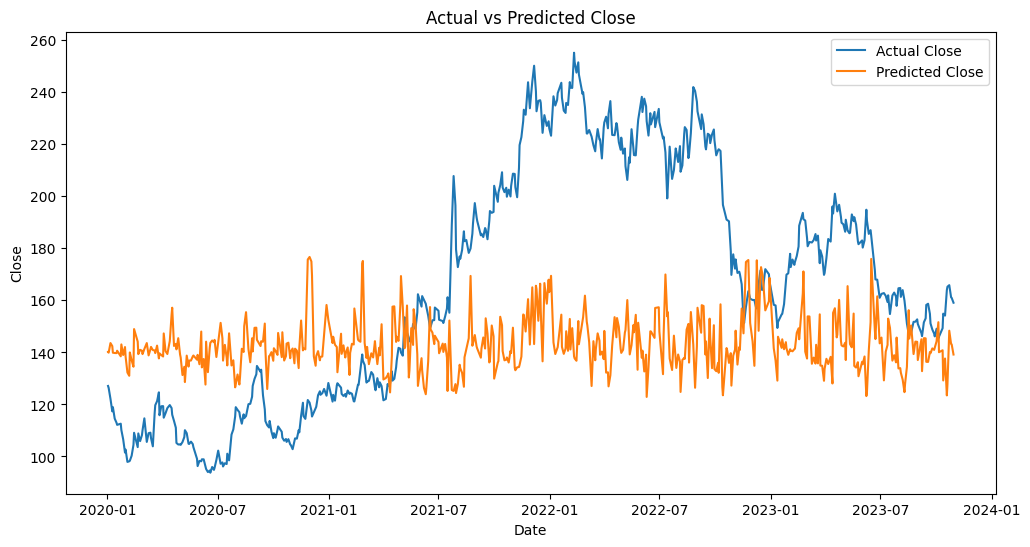

In [51]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

xgb_model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.001,
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1
)

xgb_model.fit(X_train, y_train)

# Predecir
test_predictions = xgb_model.predict(X_test)

# imprimir
test_error = mean_squared_error(y_test, test_predictions)


print(f'Test Mean Squared Error: {test_error}')

# Plotting test vs predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Close')
plt.plot(y_test.index, test_predictions, label='Predicted Close')
plt.title('Actual vs Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

### XGBoost 1000 arboles learning rate 0.001 subsample 0.3

Test Mean Squared Error: 2493.32431046362


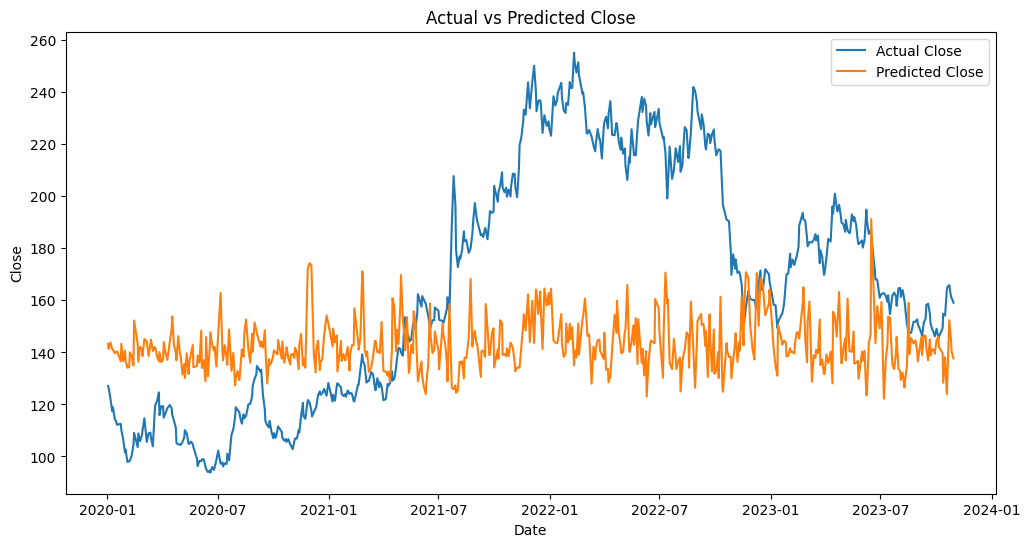

In [52]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

xgb_model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.001,
    max_depth=12,
    min_child_weight=1,
    subsample=0.3,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1
)

xgb_model.fit(X_train, y_train)

# Predecir
test_predictions = xgb_model.predict(X_test)

# imprimir
test_error = mean_squared_error(y_test, test_predictions)


print(f'Test Mean Squared Error: {test_error}')

# Plotting test vs predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Close')
plt.plot(y_test.index, test_predictions, label='Predicted Close')
plt.title('Actual vs Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

### XGBoost 1000, 0.001 learning, gamma 0.2

Test Mean Squared Error: 2493.29906791058


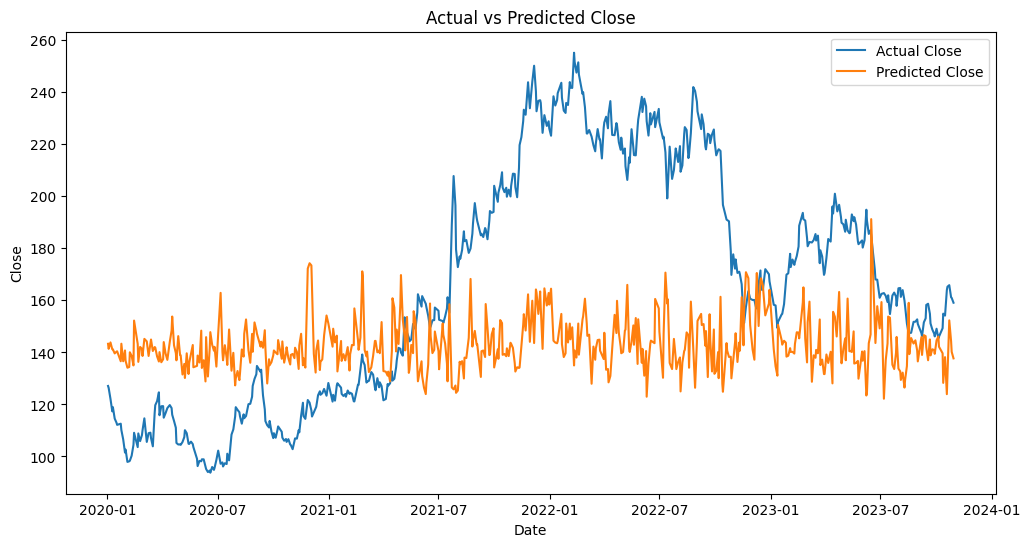

In [53]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

xgb_model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.001,
    max_depth=12,
    min_child_weight=1,
    subsample=0.3,
    colsample_bytree=0.8,
    gamma=0.2,
    reg_alpha=0,
    reg_lambda=1
)

xgb_model.fit(X_train, y_train)

# Predecir
test_predictions = xgb_model.predict(X_test)

# imprimir
test_error = mean_squared_error(y_test, test_predictions)


print(f'Test Mean Squared Error: {test_error}')

# Plotting test vs predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Close')
plt.plot(y_test.index, test_predictions, label='Predicted Close')
plt.title('Actual vs Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

##### Se observa que XGBoost no es capaz de generar un buen modelo de regresióny tampoco puede predecir incrementos o decrecimientos para este dataset

## Regresión Lineal

In [54]:
merged_dflag6= merged_dflag6.dropna()
train_set = merged_dflag6['2011':'2019']
test_set = merged_dflag6['2020':'2023']

# shape

y_train = train_set['Close']
X_train = train_set.drop(columns=['Close','Adj Close'])
y_test = test_set['Close']
X_test = test_set.drop(columns=['Close','Adj Close'])



### Ridge 1.0

MSE: 2224.877802789558


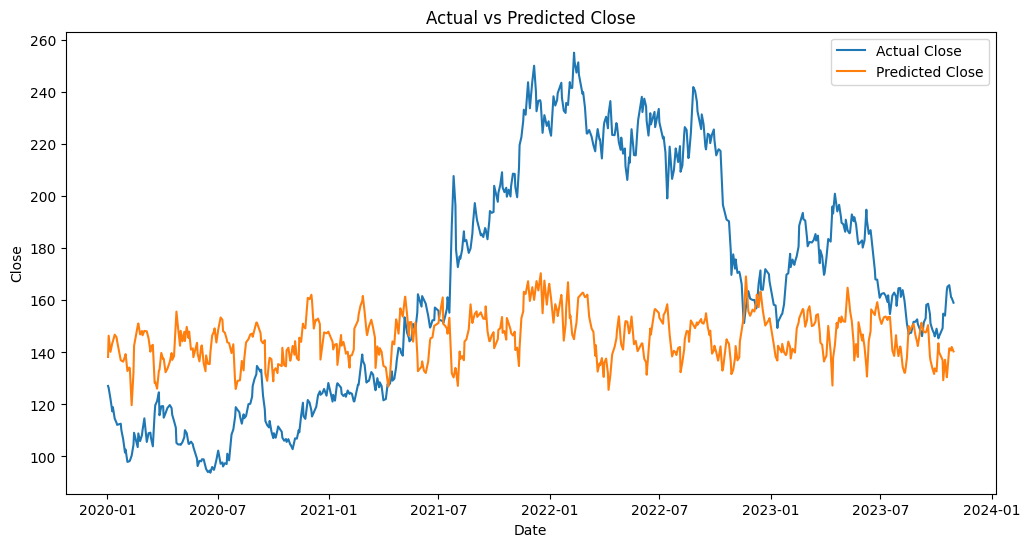

In [55]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

ridge_model = Ridge(alpha=1.0)

# Fit data
ridge_model.fit(X_train, y_train)

# Realizar predicciones

test_predictions = ridge_model.predict(X_test)

# Imprimir MSE

test_error = mean_squared_error(y_test, test_predictions)


print(f'MSE: {test_error}')

# test vs predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Close')
plt.plot(y_test.index, test_predictions, label='Predicted Close')
plt.title('Actual vs Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()


### Ridge 0.5

MSE: 2227.9996751097115


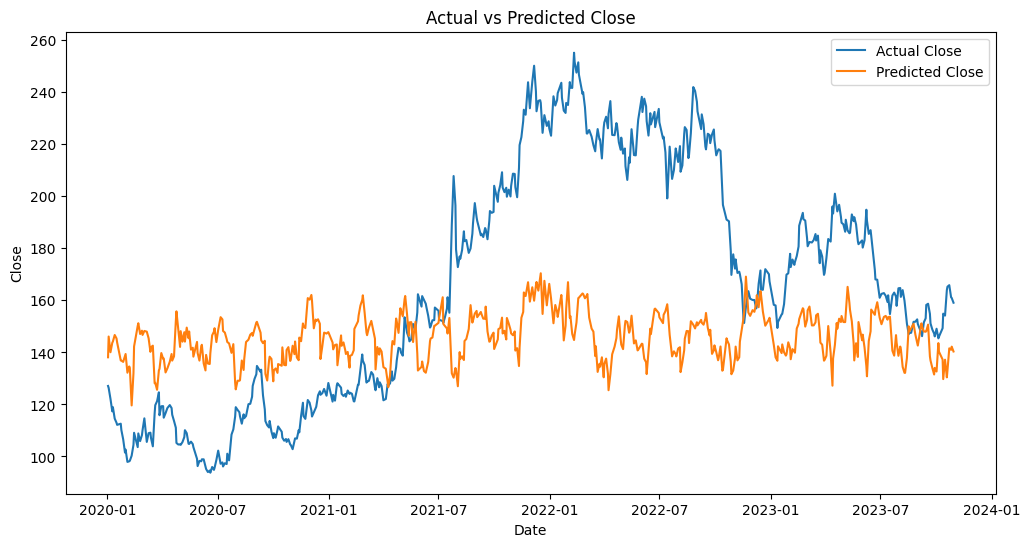

In [56]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

ridge_model = Ridge(alpha=0.5)

# Fit data
ridge_model.fit(X_train, y_train)

# Realizar predicciones

test_predictions = ridge_model.predict(X_test)

# Imprimir MSE

test_error = mean_squared_error(y_test, test_predictions)


print(f'MSE: {test_error}')

# test vs predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Close')
plt.plot(y_test.index, test_predictions, label='Predicted Close')
plt.title('Actual vs Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

### Lasso 1.0

MSE: 2429.2473561772963


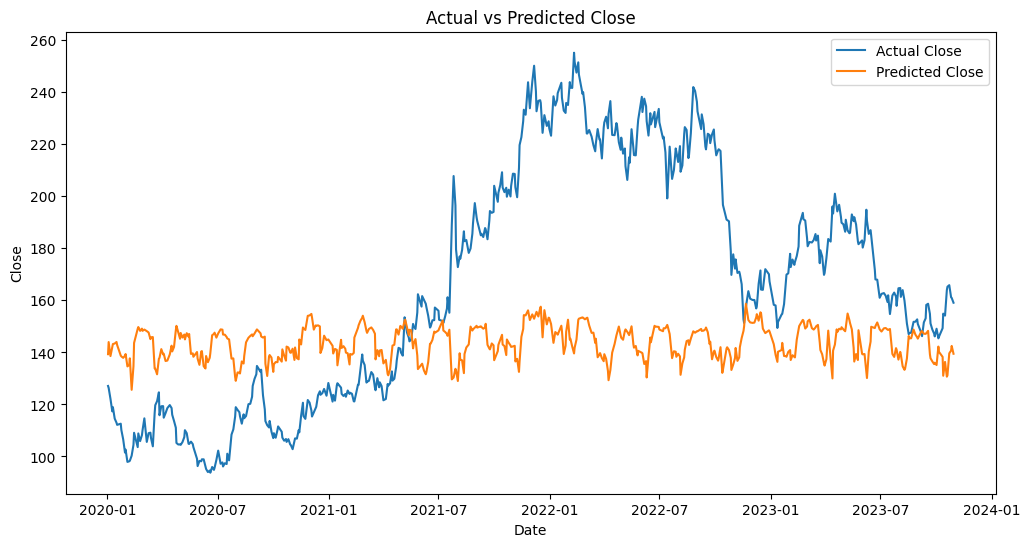

In [57]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

lasso_model = Lasso(alpha=1.0)

# Fit data
lasso_model.fit(X_train, y_train)

# Realizar predicciones
test_predictions = lasso_model.predict(X_test)

# Imprimir MSE
test_error = mean_squared_error(y_test, test_predictions)

print(f'MSE: {test_error}')

# test vs predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Close')
plt.plot(y_test.index, test_predictions, label='Predicted Close')
plt.title('Actual vs Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()


### Lasso 0.5

MSE: 2313.7911311588164


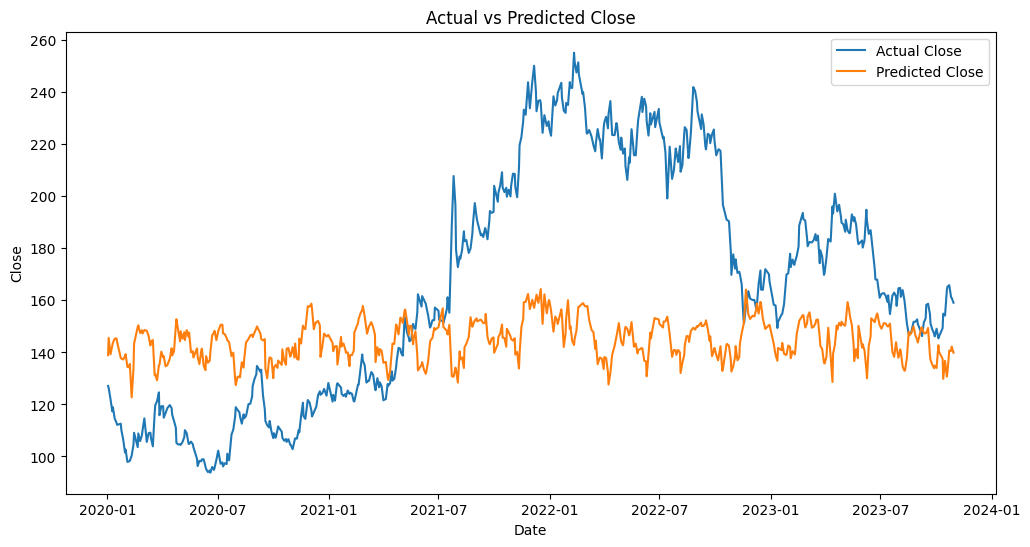

In [58]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

lasso_model = Lasso(alpha=0.5)

# Fit data
lasso_model.fit(X_train, y_train)

# Realizar predicciones
test_predictions = lasso_model.predict(X_test)

# Imprimir MSE
test_error = mean_squared_error(y_test, test_predictions)

print(f'MSE: {test_error}')

# test vs predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Close')
plt.plot(y_test.index, test_predictions, label='Predicted Close')
plt.title('Actual vs Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

### Elastic Net

MSE: 2440.860363664147


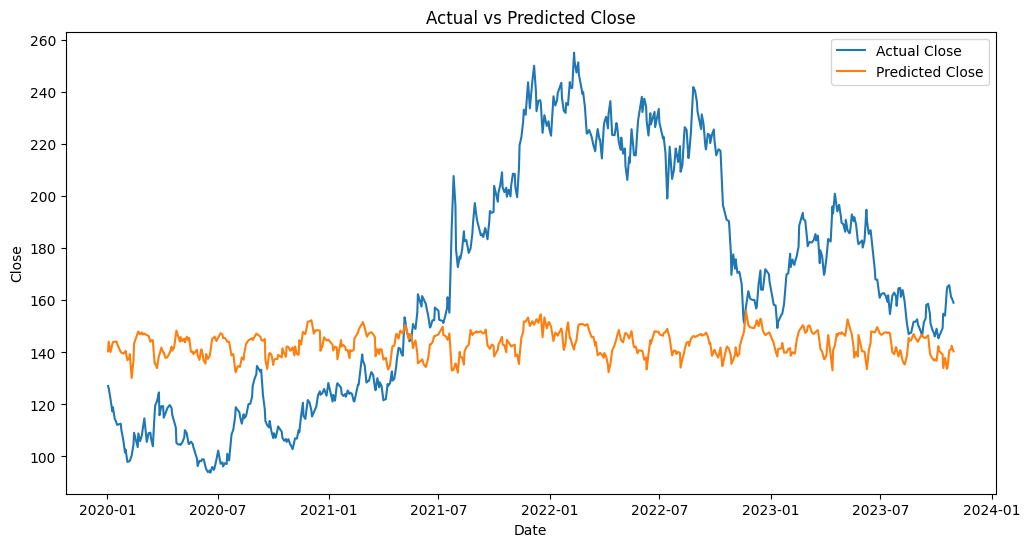

In [59]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed

# Fit data
elastic_net_model.fit(X_train, y_train)

# Realizar predicciones
test_predictions = elastic_net_model.predict(X_test)

# Imprimir MSE
test_error = mean_squared_error(y_test, test_predictions)

print(f'MSE: {test_error}')

# test vs predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Close')
plt.plot(y_test.index, test_predictions, label='Predicted Close')
plt.title('Actual vs Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()


MSE: 2429.2473561772963


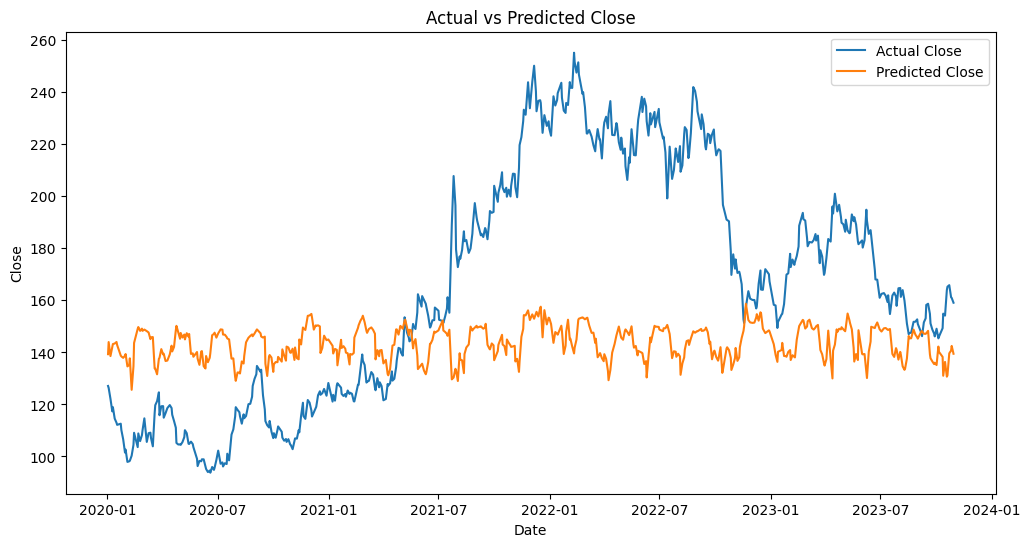

In [60]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=1)  # Adjust alpha and l1_ratio as needed

# Fit data
elastic_net_model.fit(X_train, y_train)

# Realizar predicciones
test_predictions = elastic_net_model.predict(X_test)

# Imprimir MSE
test_error = mean_squared_error(y_test, test_predictions)

print(f'MSE: {test_error}')

# test vs predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Close')
plt.plot(y_test.index, test_predictions, label='Predicted Close')
plt.title('Actual vs Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

##### La Regresión simple puede predecir tendencia pero no es capaz de capturar el aumento del precio por clima, en comparación a RNN

## Prediccion modelo 6 meses solo subida de precios y performance

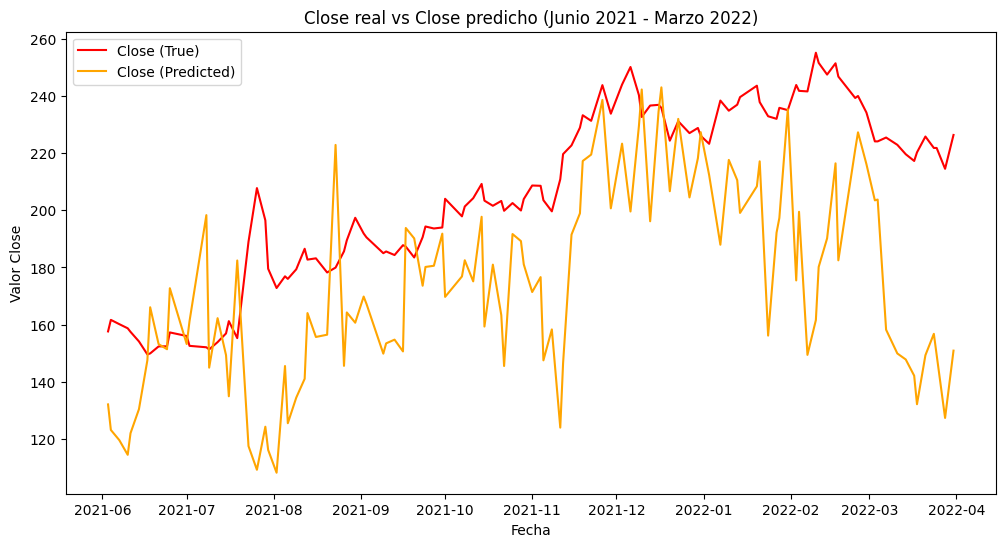

MSE : 1824.6979968072592
Correlación X_test y y_test :
Volume                                                -0.041079
AIR TEMPERATURE - DRY BULB, HOURLY (°C)               -0.677747
MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)   -0.685706
TOTAL PRECIPITATION, HOURLY (mm)                      -0.419855
ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)    -0.029705
dtype: float64
Correlatción  X_test  predictions_test :
Volume                                                -0.442819
AIR TEMPERATURE - DRY BULB, HOURLY (°C)               -0.652943
MINIMUM TEMPERATURE IN THE PREVIOUS HOUR (AUT) (°C)   -0.657887
TOTAL PRECIPITATION, HOURLY (mm)                      -0.143032
ATMOSPHERIC PRESSURE AT STATION LEVEL, HOURLY (mB)    -0.472715
dtype: float64


In [41]:
# filtrar
predictions_subset = test_set['Predictions']['2021-06-01':'2022-03-31']
y_test_subset = y_test['2021-06-01':'2022-03-31']
X_test_subset = X_test.loc['2021-06-01':'2022-03-31']

# Ccorrelación
correlation_X_y_subset = X_test_subset.corrwith(y_test_subset)

# correlación con predicciones
correlation_X_predictions_subset = X_test_subset.corrwith(predictions_subset.squeeze())

# MSE
mse_subset = mean_squared_error(y_test_subset, predictions_subset)

# Imprimir
plt.figure(figsize=(12, 6))
plt.plot(y_test_subset.index, y_test_subset, 'r', label='Close (True)')
plt.plot(predictions_subset.index, predictions_subset, 'orange', label='Close (Predicted)')
plt.title('Close real vs Close predicho (Junio 2021 - Marzo 2022)')
plt.xlabel('Fecha')
plt.ylabel('Valor Close')
plt.legend()
plt.show()

# Print MSE and correlations
print(f'MSE : {mse_subset}')
print(f'Correlación X_test y y_test :\n{correlation_X_y_subset}')
print(f'Correlatción  X_test  predictions_test :\n{correlation_X_predictions_subset}')


## Modelo para PY

Epoch 1/50
36/36 [==============================] - 9s 184ms/step - loss: 21535.1289 - val_loss: 28254.1289
Epoch 2/50
36/36 [==============================] - 3s 71ms/step - loss: 18689.7402 - val_loss: 17859.7891
Epoch 3/50
36/36 [==============================] - 2s 47ms/step - loss: 6541.6274 - val_loss: 3447.5452
Epoch 4/50
36/36 [==============================] - 2s 46ms/step - loss: 3153.7976 - val_loss: 2835.9346
Epoch 5/50
36/36 [==============================] - 2s 47ms/step - loss: 2947.4692 - val_loss: 2741.6904
Epoch 6/50
36/36 [==============================] - 2s 46ms/step - loss: 2795.2195 - val_loss: 2661.9456
Epoch 7/50
36/36 [==============================] - 2s 63ms/step - loss: 2642.6079 - val_loss: 2469.6831
Epoch 8/50
36/36 [==============================] - 2s 69ms/step - loss: 2534.2883 - val_loss: 2450.0486
Epoch 9/50
36/36 [==============================] - 2s 70ms/step - loss: 2420.0764 - val_loss: 2346.8254
Epoch 10/50
36/36 [==============================]

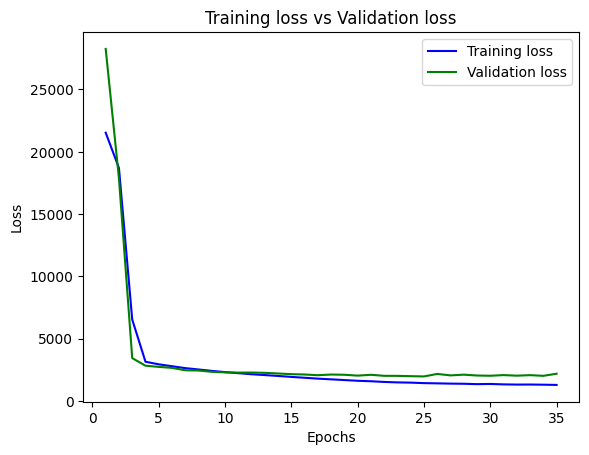

Mean Squared Error: 2193.016845703125


In [61]:
merged_dflag6= merged_dflag6.dropna()

train_set = merged_dflag6['2011':'2019']
test_set = merged_dflag6['2020':'2023']

# shape

y_train = train_set['Close']
X_train = train_set.drop(columns=['Close','Adj Close'])
y_test = test_set['Close']
X_test = test_set.drop(columns=['Close','Adj Close'])




from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint (se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint = ModelCheckpoint(filepath='/tmp/checkpoints', monitor='val_loss', mode='min', save_best_only=True)

# RNN model
model = Sequential()
model.add(Dense(16, activation=LeakyReLU(alpha=0.1), input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(64, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(128, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(256, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(512, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(1024, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(1, activation='linear'))  # Activacion lineal
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')  #usar error para lineal

# entrenar
history = model.fit(X_train, y_train, epochs=50, batch_size=34, validation_data=(X_test, y_test),
                    callbacks=[callback_early, callback_checkpoint])

# imprimir loss train y test
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(f"Mean Squared Error: {history.history['val_loss'][-1]}")

17/17 [==============================] - 1s 5ms/step


<ipython-input-62-843517547d84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Predictions'] = predictions_test


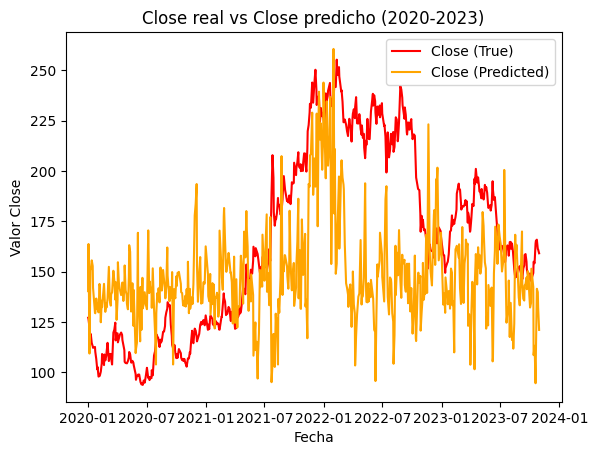

In [62]:
# Predicciones de 2021 a 2023
predictions_test = model.predict(X_test)
test_set['Predictions'] = predictions_test

# imprimir test set solo el y_test
plt.plot(test_set.index, y_test, 'r', label='Close (True)')

# imprimir los valores predichos
plt.plot(test_set.index, predictions_test, 'orange', label='Close (Predicted)')

plt.title('Close real vs Close predicho (2020-2023)')
plt.xlabel('Fecha')
plt.ylabel('Valor Close')
plt.legend()
plt.show()

In [63]:
model.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
